In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('train_1.csv')

In [47]:
exog = pd.read_csv('Exog_Campaign_eng')
exog

Exog
0       0
1       0
2       0
3       0
4       0
..    ...
545     1
546     1
547     1
548     0
549     0

[550 rows x 1 columns]

In [48]:
df

Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
4       52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN   
...                                                   ...         ...   
145058  Underworld_(serie_de_películas)_es.wikipedia.o...         NaN   
145059  Resident_Evil:_Capítulo_Final_es.wikipedia.org...         NaN   
145060  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...         NaN   
145061  Hasta_el_último_hombre_es.wikipedia.org_all-ac...         NaN   
145062  Francisco_el_matemático_(serie_de_televisión_d...         NaN   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0             11.0         5.0        13.0        14.0         9.0   
1             14.0        15.0        18.0        11.0        13.0   
2              0.0         1.0         1.0         0.0         4.0   
3             13.0        10.0        94.0         4.0        26.0   
4              NaN         NaN         NaN         NaN         NaN   
...            ...         ...         ...         ...         ...   
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-07  2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  \
0              9.0        22.0        26.0  ...        32.0        63.0   
1             22.0        11.0        10.0  ...        17.0        42.0   
2              0.0         3.0         4.0  ...         3.0         1.0   
3             14.0         9.0        11.0  ...        32.0        10.0   
4              NaN         NaN         NaN  ...        48.0         9.0   
...            ...         ...         ...  ...         ...         ...   
145058         NaN         NaN         NaN  ...         NaN         NaN   
145059         NaN         NaN         NaN  ...         NaN         NaN   
145060         NaN         NaN         NaN  ...         NaN         NaN   
145061         NaN         NaN         NaN  ...         NaN         NaN   
145062         NaN         NaN         NaN  ...         NaN         NaN   

        2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
0             15.0        26.0        14.0        20.0        22.0   
1             28.0        15.0         9.0        30.0        52.0   
2              1.0         7.0         4.0         4.0         6.0   
3             26.0        27.0        16.0        11.0        17.0   
4             25.0        13.0         3.0        11.0        27.0   
...            ...         ...         ...         ...         ...   
145058         NaN         NaN        13.0        12.0        13.0   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2016-12-29  2016-12-30  2016-12-31  
0             19.0        18.0        20.0  
1             45.0        26.0        20.0  
2              3.0         4.0        17.0  
3             19.0        10.0        11.0  
4             13.0        36.0        10.0  
...            ...         ...         ...  
145058         3.0         5.0        10.0  
145059         NaN         NaN         NaN  
145060         NaN         NaN         NaN  
145061         NaN         NaN         NaN  
145062         NaN         NaN         NaN  

[145063 rows x 551 columns]

# Problem Statement: To come up with a TimeSeries forecast model that is able to predict the future viewership based on language, region for client's page and optimise the placement of Ads.

## EDA - Estimatory Data Analysis.

In [49]:
exog['Exog'].value_counts()

Exog
0    496
1     54
Name: count, dtype: int64

In [50]:
df.info

<bound method DataFrame.info of                                                      Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
4       52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN   
...                                                   ...         ...   
145058  Underworld_(serie_de_películas)_es.wikipedia.o...         NaN   
145059  Resident_Evil:_Capítulo_Final_es.wikipedia.org...         NaN   
145060  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...         NaN   
145061  Hasta_el_último_hombre_es.wikipedia.org_all-ac...         NaN   
145062  Francisco_el_matemático_(serie_de_televisión_d...         NaN   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0             11.0   

In [51]:
df.shape

(145063, 551)

In [52]:
df.describe()

2015-07-01    2015-07-02    2015-07-03    2015-07-04    2015-07-05  \
count  1.243230e+05  1.242470e+05  1.245190e+05  1.244090e+05  1.244040e+05   
mean   1.195857e+03  1.204004e+03  1.133676e+03  1.170437e+03  1.217769e+03   
std    7.275352e+04  7.421515e+04  6.961022e+04  7.257351e+04  7.379612e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.300000e+01  1.300000e+01  1.200000e+01  1.300000e+01  1.400000e+01   
50%    1.090000e+02  1.080000e+02  1.050000e+02  1.050000e+02  1.130000e+02   
75%    5.240000e+02  5.190000e+02  5.040000e+02  4.870000e+02  5.400000e+02   
max    2.038124e+07  2.075219e+07  1.957397e+07  2.043964e+07  2.077211e+07   

         2015-07-06    2015-07-07    2015-07-08    2015-07-09    2015-07-10  \
count  1.245800e+05  1.243990e+05  1.247690e+05  1.248190e+05  1.247210e+05   
mean   1.290273e+03  1.239137e+03  1.193092e+03  1.197992e+03  1.189651e+03   
std    8.054448e+04  7.576288e+04  6.820002e+04  7.149717e+04  7.214536e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.100000e+01  1.300000e+01  1.300000e+01  1.400000e+01  1.400000e+01   
50%    1.130000e+02  1.150000e+02  1.170000e+02  1.150000e+02  1.130000e+02   
75%    5.550000e+02  5.510000e+02  5.540000e+02  5.490000e+02  5.450000e+02   
max    2.254467e+07  2.121089e+07  1.910791e+07  1.999385e+07  2.020182e+07   

       ...    2016-12-22    2016-12-23    2016-12-24    2016-12-25  \
count  ...  1.412100e+05  1.414790e+05  1.418740e+05  1.413190e+05   
mean   ...  1.394096e+03  1.377482e+03  1.393099e+03  1.523740e+03   
std    ...  8.574880e+04  7.732794e+04  8.478533e+04  8.752210e+04   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  2.200000e+01  2.200000e+01  2.000000e+01  2.100000e+01   
50%    ...  1.490000e+02  1.430000e+02  1.320000e+02  1.450000e+02   
75%    ...  6.070000e+02  5.980000e+02  5.690000e+02  6.280000e+02   
max    ...  2.420108e+07  2.253925e+07  2.505662e+07  2.586575e+07   

         2016-12-26    2016-12-27    2016-12-28    2016-12-29    2016-12-30  \
count  1.411450e+05  1.413620e+05  1.412410e+05  1.412370e+05  1.414280e+05   
mean   1.679607e+03  1.678302e+03  1.633966e+03  1.684308e+03  1.467943e+03   
std    9.794534e+04  9.232482e+04  9.185831e+04  9.014266e+04  8.155481e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.200000e+01  2.300000e+01  2.400000e+01  2.300000e+01  2.300000e+01   
50%    1.600000e+02  1.620000e+02  1.630000e+02  1.600000e+02  1.540000e+02   
75%    6.590000e+02  6.680000e+02  6.540000e+02  6.490000e+02  6.350000e+02   
max    2.834288e+07  2.691699e+07  2.702505e+07  2.607382e+07  2.436397e+07   

         2016-12-31  
count  1.415980e+05  
mean   1.478282e+03  
std    8.873567e+04  
min    0.000000e+00  
25%    2.100000e+01  
50%    1.360000e+02  
75%    5.610000e+02  
max    2.614954e+07  

[8 rows x 550 columns]

In [53]:
df.iloc[5:15,:]

Page  2015-07-01  2015-07-02  \
5             5566_zh.wikipedia.org_all-access_spider        12.0         7.0   
6           91Days_zh.wikipedia.org_all-access_spider         NaN         NaN   
7            A'N'D_zh.wikipedia.org_all-access_spider       118.0        26.0   
8            AKB48_zh.wikipedia.org_all-access_spider         5.0        23.0   
9            ASCII_zh.wikipedia.org_all-access_spider         6.0         3.0   
10           ASTRO_zh.wikipedia.org_all-access_spider         NaN         NaN   
11  Ahq_e-Sports_Club_zh.wikipedia.org_all-access_...         2.0         1.0   
12  All_your_base_are_belong_to_us_zh.wikipedia.or...         2.0         5.0   
13         AlphaGo_zh.wikipedia.org_all-access_spider         NaN         NaN   
14         Android_zh.wikipedia.org_all-access_spider         8.0        27.0   

    2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
5          4.0         5.0        20.0         8.0         5.0        17.0   
6          NaN         NaN         NaN         NaN         NaN         NaN   
7         30.0        24.0        29.0       127.0        53.0        37.0   
8         14.0        12.0         9.0         9.0        35.0        15.0   
9          5.0        12.0         6.0         5.0         4.0        13.0   
10         NaN         NaN         NaN         1.0         1.0         NaN   
11         4.0         4.0         2.0         6.0         3.0         6.0   
12         5.0         1.0         3.0         3.0         5.0         3.0   
13         NaN         NaN         NaN         NaN         NaN         NaN   
14         9.0        25.0        25.0        10.0        34.0        22.0   

    2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
5         24.0  ...        16.0        27.0         8.0        17.0   
6          NaN  ...         2.0         7.0        33.0         8.0   
7         20.0  ...        64.0        35.0        35.0        28.0   
8         14.0  ...        34.0       105.0        72.0        36.0   
9          9.0  ...        25.0        17.0        22.0        29.0   
10         NaN  ...        11.0        38.0        85.0        79.0   
11         9.0  ...         8.0        17.0        18.0        48.0   
12        17.0  ...         5.0         4.0         4.0         5.0   
13         NaN  ...        14.0        13.0        14.0        17.0   
14        17.0  ...        36.0        36.0        46.0        42.0   

    2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
5         32.0        19.0        23.0        17.0        17.0        50.0  
6         11.0         4.0        15.0         6.0         8.0         6.0  
7         20.0        23.0        32.0        39.0        32.0        17.0  
8         33.0        30.0        36.0        38.0        31.0        97.0  
9         30.0        29.0        35.0        44.0        26.0        41.0  
10        30.0        14.0        10.0        38.0        12.0        51.0  
11        19.0        14.0         9.0        23.0        11.0         7.0  
12         2.0         9.0         7.0         4.0         5.0         0.0  
13        19.0        56.0        21.0        13.0        21.0        11.0  
14        40.0        40.0        66.0        43.0        38.0        74.0  

[10 rows x 551 columns]

In [54]:
df.isna().sum(axis = 0)

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [55]:
df.isna().sum(axis = 1)

0           0
1           0
2           0
3           0
4         291
         ... 
145058    544
145059    550
145060    550
145061    550
145062    550
Length: 145063, dtype: int64

In [56]:
dates = df.columns[1:]
dates.min(), dates.max()

('2015-07-01', '2016-12-31')

In [57]:
pd.to_datetime(dates.max()) - pd.to_datetime(dates.min())

Timedelta('549 days 00:00:00')

In [58]:
df['Page'].str.contains('wikipedia.org').sum()

127208

In [59]:
df[~df['Page'].str.contains('wikipedia.org')]

Page  2015-07-01  \
13332    Accueil_commons.wikimedia.org_all-access_spider        55.0   
13333  Atlas_of_Asia_commons.wikimedia.org_all-access...         5.0   
13334  Atlas_of_Europe_commons.wikimedia.org_all-acce...         4.0   
13335  Atlas_of_World_War_II_commons.wikimedia.org_al...         5.0   
13336  Atlas_of_colonialism_commons.wikimedia.org_all...         8.0   
...                                                  ...         ...   
84730  help:contents_www.mediawiki.org_all-access_spider         NaN   
84731  how_to_contribute_www.mediawiki.org_all-access...         0.0   
84732      mediawiki_www.mediawiki.org_all-access_spider         0.0   
84733   special:book_www.mediawiki.org_all-access_spider         0.0   
84734  special:translate_www.mediawiki.org_all-access...         0.0   

       2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  \
13332        48.0        44.0        35.0        46.0        41.0        32.0   
13333         3.0         4.0         6.0         3.0         1.0         5.0   
13334         6.0         9.0         7.0         6.0         4.0         5.0   
13335         2.0         6.0         6.0         8.0        11.0         5.0   
13336         6.0        15.0         5.0         5.0         9.0        10.0   
...           ...         ...         ...         ...         ...         ...   
84730         0.0         NaN         NaN         0.0         0.0         NaN   
84731         0.0         0.0         0.0         0.0         0.0         0.0   
84732         0.0         0.0         0.0         0.0         0.0         0.0   
84733         0.0         0.0         0.0         0.0         NaN         0.0   
84734         0.0         0.0         0.0         0.0         1.0         NaN   

       2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  \
13332        43.0        40.0  ...        69.0        74.0        34.0   
13333         6.0         6.0  ...        49.0        43.0        44.0   
13334         6.0        13.0  ...        34.0        44.0        47.0   
13335         5.0         6.0  ...        12.0        18.0        13.0   
13336         3.0         9.0  ...        46.0        32.0        40.0   
...           ...         ...  ...         ...         ...         ...   
84730         NaN         0.0  ...        17.0         7.0         8.0   
84731         0.0         0.0  ...       183.0        37.0         4.0   
84732         0.0         0.0  ...        30.0        48.0        13.0   
84733         0.0         0.0  ...       180.0        40.0         3.0   
84734         NaN         0.0  ...       333.0        26.0         1.0   

       2016-12-25  2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  \
13332        62.0        88.0        57.0        74.0        61.0        51.0   
13333        38.0        31.0        29.0        37.0        32.0        29.0   
13334        46.0        35.0        31.0        31.0        34.0        28.0   
13335        11.0         8.0         8.0        13.0         5.0        11.0   
13336        38.0        29.0        19.0        30.0        29.0        26.0   
...           ...         ...         ...         ...         ...         ...   
84730        15.0         7.0        18.0        17.0        15.0         3.0   
84731        18.0         2.0       172.0        19.0        29.0         2.0   
84732        24.0        11.0        12.0        51.0        23.0         3.0   
84733        53.0       300.0         3.0        44.0         6.0         0.0   
84734        39.0       346.0         2.0        28.0         4.0       163.0   

       2016-12-31  
13332        60.0  
13333        34.0  
13334        27.0  
13335         6.0  
13336        26.0  
...           ...  
84730        11.0  
84731       178.0  
84732        48.0  
84733       154.0  
84734         1.0  

[17855 rows x 551 columns]

In [60]:
df_other = df[~df['Page'].str.contains('wikipedia.org')]
df_other.head(50).tail(20)

Page  2015-07-01  \
13362  Category:All_media_needing_categories_as_of_20...        12.0   
13363  Category:All_media_needing_categories_as_of_20...         NaN   
13364  Category:Alt_porn_commons.wikimedia.org_all-ac...         0.0   
13365  Category:Anal_and_vaginal_sex_in_threesome_in_...         0.0   
13366  Category:Anal_balls_commons.wikimedia.org_all-...         3.0   
13367  Category:Anal_beads_commons.wikimedia.org_all-...         NaN   
13368  Category:Anal_fisting_commons.wikimedia.org_al...         NaN   
13369  Category:Anal_sex_commons.wikimedia.org_all-ac...         9.0   
13370  Category:Anal_sex_(gay)_in_art_commons.wikimed...         6.0   
13371  Category:Anal_sex_in_art_commons.wikimedia.org...         0.0   
13372  Category:Anal_use_of_dildos_commons.wikimedia....         2.0   
13373  Category:Anatomy_of_human_vaginas_commons.wiki...         1.0   
13374  Category:Andy_San_Dimas_commons.wikimedia.org_...         1.0   
13375  Category:Animalia_commons.wikimedia.org_all-ac...        25.0   
13376  Category:Animations_commons.wikimedia.org_all-...         9.0   
13377  Category:Animations_of_machinery_commons.wikim...         1.0   
13378  Category:Anus_commons.wikimedia.org_all-access...         7.0   
13379  Category:Apple_Inc._employees_commons.wikimedi...         5.0   
13380  Category:Art_commons.wikimedia.org_all-access_...        32.0   
13381  Category:Ashlynn_Brooke_commons.wikimedia.org_...         3.0   

       2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  \
13362         2.0         9.0         2.0         5.0         3.0         2.0   
13363         NaN         NaN         NaN         NaN         NaN         NaN   
13364         0.0         2.0         0.0         1.0         2.0         0.0   
13365         0.0         1.0         2.0         2.0         1.0         1.0   
13366         2.0         2.0         3.0         2.0         1.0         2.0   
13367         NaN         NaN         NaN         NaN         NaN         NaN   
13368         NaN         NaN         NaN         NaN         NaN         NaN   
13369        10.0        10.0         3.0         4.0         5.0         3.0   
13370         1.0         1.0         6.0         1.0         1.0         2.0   
13371         0.0         1.0         0.0         3.0         2.0         3.0   
13372         0.0         0.0         0.0         0.0         1.0         2.0   
13373         2.0         1.0         2.0         1.0         2.0         3.0   
13374         1.0         1.0         2.0         0.0         1.0         1.0   
13375        23.0        14.0        17.0        15.0        29.0        12.0   
13376        17.0         8.0        10.0         8.0        13.0        12.0   
13377         0.0         1.0         1.0         1.0         1.0         0.0   
13378         6.0         3.0         7.0         4.0         2.0         4.0   
13379         0.0         NaN         1.0         2.0         2.0         1.0   
13380        32.0        16.0        20.0        10.0        25.0        20.0   
13381         5.0         2.0         0.0         3.0         2.0         2.0   

       2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  \
13362         6.0         2.0  ...         3.0         1.0         3.0   
13363         NaN         NaN  ...        40.0        31.0        35.0   
13364         1.0         0.0  ...         2.0         3.0         1.0   
13365         3.0         2.0  ...         3.0         4.0         4.0   
13366        58.0        49.0  ...         0.0         0.0         4.0   
13367         NaN         NaN  ...         4.0         4.0         1.0   
13368         NaN         NaN  ...         2.0         0.0         0.0   
13369         8.0         8.0  ...         8.0         9.0         7.0   
13370         5.0         2.0  ...         2.0         5.0         3.0   
13371         0.0         2.0  ...         4.0         3.0         2.0   
13372         3.0      

## Feature Engineering: Creation of new columns using the Page Name column by splitting the string

### Here we find that there are two sets of data in our data:
### One whose domain name is wikipedia.org and the other whose domain is either wikimedia and mediawiki. So let's split the data for domain wikipedia.org

In [61]:
df_wiki = df[df['Page'].str.contains('wikipedia.org_')]
df_wiki

Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
4       52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN   
...                                                   ...         ...   
145058  Underworld_(serie_de_películas)_es.wikipedia.o...         NaN   
145059  Resident_Evil:_Capítulo_Final_es.wikipedia.org...         NaN   
145060  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...         NaN   
145061  Hasta_el_último_hombre_es.wikipedia.org_all-ac...         NaN   
145062  Francisco_el_matemático_(serie_de_televisión_d...         NaN   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0             11.0         5.0        13.0        14.0         9.0   
1             14.0        15.0        18.0        11.0        13.0   
2              0.0         1.0         1.0         0.0         4.0   
3             13.0        10.0        94.0         4.0        26.0   
4              NaN         NaN         NaN         NaN         NaN   
...            ...         ...         ...         ...         ...   
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-07  2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  \
0              9.0        22.0        26.0  ...        32.0        63.0   
1             22.0        11.0        10.0  ...        17.0        42.0   
2              0.0         3.0         4.0  ...         3.0         1.0   
3             14.0         9.0        11.0  ...        32.0        10.0   
4              NaN         NaN         NaN  ...        48.0         9.0   
...            ...         ...         ...  ...         ...         ...   
145058         NaN         NaN         NaN  ...         NaN         NaN   
145059         NaN         NaN         NaN  ...         NaN         NaN   
145060         NaN         NaN         NaN  ...         NaN         NaN   
145061         NaN         NaN         NaN  ...         NaN         NaN   
145062         NaN         NaN         NaN  ...         NaN         NaN   

        2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
0             15.0        26.0        14.0        20.0        22.0   
1             28.0        15.0         9.0        30.0        52.0   
2              1.0         7.0         4.0         4.0         6.0   
3             26.0        27.0        16.0        11.0        17.0   
4             25.0        13.0         3.0        11.0        27.0   
...            ...         ...         ...         ...         ...   
145058         NaN         NaN        13.0        12.0        13.0   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2016-12-29  2016-12-30  2016-12-31  
0             19.0        18.0        20.0  
1             45.0        26.0        20.0  
2              3.0         4.0        17.0  
3             19.0        10.0        11.0  
4             13.0        36.0        10.0  
...            ...         ...         ...  
145058         3.0         5.0        10.0  
145059         NaN         NaN         NaN  
145060         NaN         NaN         NaN  
145061         NaN         NaN         NaN  
145062         NaN         NaN         NaN  

[127208 rows x 551 columns]

In [62]:
df_wiki[['pre', 'suf']] = df_wiki['Page'].str.split('.wikipedia.org_', expand = True)

/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_5931/965921108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wiki[['pre', 'suf']] = df_wiki['Page'].str.split('.wikipedia.org_', expand = True)
/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_5931/965921108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wiki[['pre', 'suf']] = df_wiki['Page'].str.split('.wikipedia.org_', expand = True)


In [63]:
df_wiki

Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
4       52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN   
...                                                   ...         ...   
145058  Underworld_(serie_de_películas)_es.wikipedia.o...         NaN   
145059  Resident_Evil:_Capítulo_Final_es.wikipedia.org...         NaN   
145060  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...         NaN   
145061  Hasta_el_último_hombre_es.wikipedia.org_all-ac...         NaN   
145062  Francisco_el_matemático_(serie_de_televisión_d...         NaN   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0             11.0         5.0        13.0        14.0         9.0   
1             14.0        15.0        18.0        11.0        13.0   
2              0.0         1.0         1.0         0.0         4.0   
3             13.0        10.0        94.0         4.0        26.0   
4              NaN         NaN         NaN         NaN         NaN   
...            ...         ...         ...         ...         ...   
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-07  2015-07-08  2015-07-09  ...  2016-12-24  2016-12-25  \
0              9.0        22.0        26.0  ...        15.0        26.0   
1             22.0        11.0        10.0  ...        28.0        15.0   
2              0.0         3.0         4.0  ...         1.0         7.0   
3             14.0         9.0        11.0  ...        26.0        27.0   
4              NaN         NaN         NaN  ...        25.0        13.0   
...            ...         ...         ...  ...         ...         ...   
145058         NaN         NaN         NaN  ...         NaN         NaN   
145059         NaN         NaN         NaN  ...         NaN         NaN   
145060         NaN         NaN         NaN  ...         NaN         NaN   
145061         NaN         NaN         NaN  ...         NaN         NaN   
145062         NaN         NaN         NaN  ...         NaN         NaN   

        2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  \
0             14.0        20.0        22.0        19.0        18.0   
1              9.0        30.0        52.0        45.0        26.0   
2              4.0         4.0         6.0         3.0         4.0   
3             16.0        11.0        17.0        19.0        10.0   
4              3.0        11.0        27.0        13.0        36.0   
...            ...         ...         ...         ...         ...   
145058        13.0        12.0        13.0         3.0         5.0   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2016-12-31                                                pre  \
0             20.0                                            2NE1_zh   
1             20.0                                             2PM_zh   
2             17.0                                              3C_zh   
3             11.0                                         4minute_zh   
4             10.0                                52_Hz_I_Love_You_zh   
...            ...                                                ...   
145058        10.0                 Underworld_(serie_de_películas)_es   
145059   

In [64]:
df_wiki['suf'].value_counts()

suf
all-access_all-agents    35099
mobile-web_all-agents    30923
all-access_spider        30614
desktop_all-agents       30572
Name: count, dtype: int64

In [65]:
df_wiki[['access_type', 'access_origin']] = df_wiki['suf'].str.split('_', expand = True)

/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_5931/1254405575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wiki[['access_type', 'access_origin']] = df_wiki['suf'].str.split('_', expand = True)
/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_5931/1254405575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wiki[['access_type', 'access_origin']] = df_wiki['suf'].str.split('_', expand = True)


In [66]:
df_wiki[['access_type', 'access_origin']]

access_type access_origin
0       all-access        spider
1       all-access        spider
2       all-access        spider
3       all-access        spider
4       all-access        spider
...            ...           ...
145058  all-access        spider
145059  all-access        spider
145060  all-access        spider
145061  all-access        spider
145062  all-access        spider

[127208 rows x 2 columns]

In [67]:
df_wiki['name'] = df_wiki['pre'].str[:-3]

/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_5931/18284883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wiki['name'] = df_wiki['pre'].str[:-3]


In [68]:
df_wiki['name']

0                                                      2NE1
1                                                       2PM
2                                                        3C
3                                                   4minute
4                                          52_Hz_I_Love_You
                                ...                        
145058                      Underworld_(serie_de_películas)
145059                        Resident_Evil:_Capítulo_Final
145060                                Enamorándome_de_Ramón
145061                               Hasta_el_último_hombre
145062    Francisco_el_matemático_(serie_de_televisión_d...
Name: name, Length: 127208, dtype: object

In [69]:
df_wiki['lang'] = df_wiki['pre'].str[-2:]
df_wiki['lang']

/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_5931/1874729731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wiki['lang'] = df_wiki['pre'].str[-2:]


0         zh
1         zh
2         zh
3         zh
4         zh
          ..
145058    es
145059    es
145060    es
145061    es
145062    es
Name: lang, Length: 127208, dtype: object

In [70]:
df_wiki.drop(columns = ['Page', 'pre', 'suf'], inplace = True)

/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_5931/914478054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wiki.drop(columns = ['Page', 'pre', 'suf'], inplace = True)


In [71]:
df_wiki

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
0             18.0        11.0         5.0        13.0        14.0   
1             11.0        14.0        15.0        18.0        11.0   
2              1.0         0.0         1.0         1.0         0.0   
3             35.0        13.0        10.0        94.0         4.0   
4              NaN         NaN         NaN         NaN         NaN   
...            ...         ...         ...         ...         ...   
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-06  2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  \
0              9.0         9.0        22.0        26.0        24.0  ...   
1             13.0        22.0        11.0        10.0         4.0  ...   
2              4.0         0.0         3.0         4.0         4.0  ...   
3             26.0        14.0         9.0        11.0        16.0  ...   
4              NaN         NaN         NaN         NaN         NaN  ...   
...            ...         ...         ...         ...         ...  ...   
145058         NaN         NaN         NaN         NaN         NaN  ...   
145059         NaN         NaN         NaN         NaN         NaN  ...   
145060         NaN         NaN         NaN         NaN         NaN  ...   
145061         NaN         NaN         NaN         NaN         NaN  ...   
145062         NaN         NaN         NaN         NaN         NaN  ...   

        2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  \
0             14.0        20.0        22.0        19.0        18.0   
1              9.0        30.0        52.0        45.0        26.0   
2              4.0         4.0         6.0         3.0         4.0   
3             16.0        11.0        17.0        19.0        10.0   
4              3.0        11.0        27.0        13.0        36.0   
...            ...         ...         ...         ...         ...   
145058        13.0        12.0        13.0         3.0         5.0   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2016-12-31  access_type  access_origin  \
0             20.0   all-access         spider   
1             20.0   all-access         spider   
2             17.0   all-access         spider   
3             11.0   all-access         spider   
4             10.0   all-access         spider   
...            ...          ...            ...   
145058        10.0   all-access         spider   
145059         NaN   all-access         spider   
145060         NaN   all-access         spider   
145061         NaN   all-access         spider   
145062         NaN   all-access         spider   

                                                     name  lang  
0                                                    2NE1    zh  
1                                                     2PM    zh  
2                                                      3C    zh  
3                                                 4minute    zh  
4                                        52_Hz_I_Love_You    zh  
...                                                   ...   ...  
145058                    Underworld_(serie_de_películas)    es  
145059                      Resident_Evil:_Capítulo_Final    es  
145060                              Enamorándome_de_Ramón    es  
145061                             Hasta_el_último_hombre    es  
145062  Francisco_el_matemático_(serie_de_televisión_d...    es  

[127208 rows x 554 columns]

In [72]:
df_wiki['lang'].value_counts()

lang
en    24108
ja    20431
de    18547
fr    17802
zh    17229
ru    15022
es    14069
Name: count, dtype: int64

### Let's do the same with the other set of rows which have a different domain name.

In [73]:
df_other.tail(20)

Page  2015-07-01  \
84715  Wikimedia_Engineering/2016-17_Q2_Goals_www.med...         NaN   
84716  Wikimedia_Engineering/2016-17_Q3_Goals_www.med...         NaN   
84717  Wikimedia_Engineering/Introducing_Victoria_Col...         NaN   
84718  Wikimedia_Hackathon_2016/Showcase_www.mediawik...         NaN   
84719  Wikimedia_Hackathon_2017/Participants_www.medi...         NaN   
84720  Wikimedia_Hackathon_2017/Register_and_Attend_w...         NaN   
84721  Wikimedia_Hackathon_Amrita_University_www.medi...         NaN   
84722  Wikimedia_Hackathon_BPHC_www.mediawiki.org_all...         NaN   
84723  Wikimedia_Language_engineering_www.mediawiki.o...        29.0   
84724  Wikimedia_Product_www.mediawiki.org_all-access...         NaN   
84725  Wikimedia_Research_www.mediawiki.org_all-acces...         1.0   
84726  Wikimedia_Research/Showcase_www.mediawiki.org_...         NaN   
84727  Wikipedia_Zero_www.mediawiki.org_all-access_sp...        11.0   
84728     Wikispeech_www.mediawiki.org_all-access_spider         NaN   
84729  Zürich_Hackathon_2014_www.mediawiki.org_all-ac...         3.0   
84730  help:contents_www.mediawiki.org_all-access_spider         NaN   
84731  how_to_contribute_www.mediawiki.org_all-access...         0.0   
84732      mediawiki_www.mediawiki.org_all-access_spider         0.0   
84733   special:book_www.mediawiki.org_all-access_spider         0.0   
84734  special:translate_www.mediawiki.org_all-access...         0.0   

       2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  \
84715         NaN         NaN         NaN         NaN         NaN         NaN   
84716         NaN         NaN         NaN         NaN         NaN         NaN   
84717         NaN         NaN         NaN         NaN         NaN         NaN   
84718         NaN         NaN         NaN         NaN         NaN         NaN   
84719         NaN         NaN         NaN         NaN         NaN         NaN   
84720         NaN         NaN         NaN         NaN         NaN         NaN   
84721         NaN         NaN         NaN         NaN         NaN         NaN   
84722         NaN         NaN         NaN         NaN         NaN         NaN   
84723        73.0        32.0        44.0        54.0        33.0        38.0   
84724         NaN         NaN         NaN         NaN         NaN         NaN   
84725         1.0         0.0         1.0         0.0         3.0         1.0   
84726         NaN         NaN         NaN         NaN         NaN         NaN   
84727        12.0        14.0         7.0         9.0        13.0         9.0   
84728         NaN         NaN         NaN         NaN         NaN         NaN   
84729        19.0        19.0        30.0        21.0        24.0        17.0   
84730         0.0         NaN         NaN         0.0         0.0         NaN   
84731         0.0         0.0         0.0         0.0         0.0         0.0   
84732         0.0         0.0         0.0         0.0         0.0         0.0   
84733         0.0         0.0         0.0         0.0         NaN         0.0   
84734         0.0         0.0         0.0         0.0         1.0         NaN   

       2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  \
84715         NaN         NaN  ...         4.0         4.0         7.0   
84716         NaN         NaN  ...         1.0         1.0         3.0   
84717         NaN         NaN  ...        12.0         8.0         9.0   
84718         NaN         NaN  ...         NaN         NaN         1.0   
84719         NaN         NaN  ...         NaN         4.0         1.0   
84720         NaN         NaN  ...         NaN         5.0         2.0   
84721         NaN         NaN  ...         2.0         3.0         7.0   
84722         NaN         NaN  ...         3.0         1.0         2.0   
84723        12.0        10.0  ...         4.0        13.0         6.0   
84724         NaN         NaN  ...         3.0        13.0        23.0   
84725         1.0      

In [74]:
df_other.head(20)

Page  2015-07-01  \
13332    Accueil_commons.wikimedia.org_all-access_spider        55.0   
13333  Atlas_of_Asia_commons.wikimedia.org_all-access...         5.0   
13334  Atlas_of_Europe_commons.wikimedia.org_all-acce...         4.0   
13335  Atlas_of_World_War_II_commons.wikimedia.org_al...         5.0   
13336  Atlas_of_colonialism_commons.wikimedia.org_all...         8.0   
13337  Atlas_of_the_United_Kingdom_commons.wikimedia....         5.0   
13338  Atlas_of_the_United_States_commons.wikimedia.o...        10.0   
13339     Bikini_commons.wikimedia.org_all-access_spider         4.0   
13340  Campaign:OFBA2016_commons.wikimedia.org_all-ac...         NaN   
13341  Catalogue_of_Wilhelm_von_Gloeden's_pictures_co...         3.0   
13342  Category:1920s_videos_of_ejaculation_commons.w...         0.0   
13343  Category:1920s_videos_of_male_masturbation_com...         0.0   
13344  Category:1930s_videos_of_ejaculation_commons.w...         1.0   
13345  Category:2000s_ejaculation_(animated)_commons....         1.0   
13346  Category:2000s_male_masturbation_(animated)_co...         3.0   
13347  Category:2010s_male_masturbation_(animated)_co...         3.0   
13348  Category:2010s_videos_of_ejaculation_commons.w...         4.0   
13349  Category:2010s_videos_of_male_masturbation_com...         7.0   
13350  Category:2013_commons.wikimedia.org_all-access...         8.0   
13351  Category:2016_Berlin_Christmas_market_truck_at...         NaN   

       2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  \
13332        48.0        44.0        35.0        46.0        41.0        32.0   
13333         3.0         4.0         6.0         3.0         1.0         5.0   
13334         6.0         9.0         7.0         6.0         4.0         5.0   
13335         2.0         6.0         6.0         8.0        11.0         5.0   
13336         6.0        15.0         5.0         5.0         9.0        10.0   
13337         7.0         6.0        10.0         7.0         8.0         6.0   
13338        14.0        13.0        20.0         9.0        18.0        10.0   
13339         5.0         2.0         2.0         2.0         1.0         5.0   
13340         NaN         NaN         NaN         NaN         NaN         NaN   
13341         4.0         5.0         2.0         3.0         5.0         1.0   
13342         0.0         0.0         0.0         0.0         1.0         2.0   
13343         2.0         0.0         1.0         2.0         0.0         1.0   
13344         0.0         0.0         1.0         0.0         0.0         4.0   
13345         1.0         1.0         1.0         1.0         1.0         1.0   
13346         1.0         1.0         0.0         0.0         1.0         0.0   
13347         0.0         3.0         2.0         2.0         0.0         2.0   
13348         1.0         3.0         6.0         4.0         2.0         7.0   
13349         2.0         4.0         4.0         2.0         2.0         4.0   
13350         4.0         7.0         8.0         2.0         4.0         2.0   
13351         NaN         NaN         NaN         NaN         NaN         NaN   

       2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  \
13332        43.0        40.0  ...        69.0        74.0        34.0   
13333         6.0         6.0  ...        49.0        43.0        44.0   
13334         6.0        13.0  ...        34.0        44.0        47.0   
13335         5.0         6.0  ...        12.0        18.0        13.0   
13336         3.0         9.0  ...        46.0        32.0        40.0   
13337         3.0         8.0  ...        16.0        12.0        18.0   
13338         9.0        19.0  ...        11.0        22.0        18.0   
13339         5.0         5.0  ...         4.0         9.0         5.0   
13340         NaN         NaN  ...         4.0         7.0         1.0   
13341         1.0         0.0  ...         7.0         6.0         5.0   
13342         0.0      

In [75]:
df_other['Page'].str.split('.').str[-1].value_counts()

Page
org_mobile-web_all-agents    5016
org_all-access_all-agents    4303
org_all-access_spider        4299
org_desktop_all-agents       4237
Name: count, dtype: int64

In [76]:
df_other['Page'].str.contains('mediawiki').sum() + df_other['Page'].str.contains('wikimedia').sum()

17855

In [77]:
df_other.shape

(17855, 551)

### Let's again split the data into two parts, one which has mediawiki and the other which has wikimedia.

In [78]:
df_other1 = df_other.loc[df_other['Page'].str.contains('_www.mediawiki.org_')]
df_other1

Page  2015-07-01  \
19611  "Keep_me_logged_in"_extended_to_one_year_www.m...         NaN   
19612  2017_wikitext_editor_www.mediawiki.org_all-acc...         NaN   
19613  2017_wikitext_editor/Feedback_www.mediawiki.or...         NaN   
19614        API_www.mediawiki.org_all-access_all-agents       528.0   
19615  API:Account_creation_www.mediawiki.org_all-acc...        37.0   
...                                                  ...         ...   
84730  help:contents_www.mediawiki.org_all-access_spider         NaN   
84731  how_to_contribute_www.mediawiki.org_all-access...         0.0   
84732      mediawiki_www.mediawiki.org_all-access_spider         0.0   
84733   special:book_www.mediawiki.org_all-access_spider         0.0   
84734  special:translate_www.mediawiki.org_all-access...         0.0   

       2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  \
19611         NaN         NaN         NaN         NaN         NaN         NaN   
19612         NaN         NaN         NaN         NaN         NaN         NaN   
19613         NaN         NaN         NaN         NaN         NaN         NaN   
19614       587.0       634.0       483.0       510.0       559.0       625.0   
19615        38.0        46.0        41.0        79.0        91.0       100.0   
...           ...         ...         ...         ...         ...         ...   
84730         0.0         NaN         NaN         0.0         0.0         NaN   
84731         0.0         0.0         0.0         0.0         0.0         0.0   
84732         0.0         0.0         0.0         0.0         0.0         0.0   
84733         0.0         0.0         0.0         0.0         NaN         0.0   
84734         0.0         0.0         0.0         0.0         1.0         NaN   

       2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  \
19611         NaN         NaN  ...        17.0        18.0        11.0   
19612         NaN         NaN  ...        91.0        50.0        47.0   
19613         NaN         NaN  ...        32.0        45.0        41.0   
19614       594.0       565.0  ...       479.0       317.0       234.0   
19615        54.0        43.0  ...        55.0        37.0        23.0   
...           ...         ...  ...         ...         ...         ...   
84730         NaN         0.0  ...        17.0         7.0         8.0   
84731         0.0         0.0  ...       183.0        37.0         4.0   
84732         0.0         0.0  ...        30.0        48.0        13.0   
84733         0.0         0.0  ...       180.0        40.0         3.0   
84734         NaN         0.0  ...       333.0        26.0         1.0   

       2016-12-25  2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  \
19611        15.0        11.0        15.0        10.0        14.0         7.0   
19612        40.0        31.0        61.0        52.0        43.0       100.0   
19613        17.0        21.0        52.0        48.0        32.0        41.0   
19614       598.0       283.0       399.0       334.0       351.0       358.0   
19615       387.0        35.0        38.0        38.0        28.0        45.0   
...           ...         ...         ...         ...         ...         ...   
84730        15.0         7.0        18.0        17.0        15.0         3.0   
84731        18.0         2.0       172.0        19.0        29.0         2.0   
84732        24.0        11.0        12.0        51.0        23.0         3.0   
84733        53.0       300.0         3.0        44.0         6.0         0.0   
84734        39.0       346.0         2.0        28.0         4.0       163.0   

       2016-12-31  
19611        12.0  
19612        73.0  
19613        19.0  
19614       275.0  
19615        41.0  
...           ...  
84730        11.0  
84731       178.0  
84732        48.0  
84733       154.0  
84734         1.0  

[7300 rows x 551 columns]

In [79]:
df_other1[['name','suf']] = df_other1['Page'].str.split('_www.mediawiki.org_', expand = True)
df_other1[['access_type','access_origin']] = df_other1['suf'].str.split('_', expand = True)
df_other1.drop(columns = ['suf', 'Page'], inplace = True)
df_other1

/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_5931/423571554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other1[['name','suf']] = df_other1['Page'].str.split('_www.mediawiki.org_', expand = True)
/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_5931/423571554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other1[['name','suf']] = df_other1['Page'].str.split('_www.mediawiki.org_', expand = True)
/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_5931/42357155

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
19611         NaN         NaN         NaN         NaN         NaN         NaN   
19612         NaN         NaN         NaN         NaN         NaN         NaN   
19613         NaN         NaN         NaN         NaN         NaN         NaN   
19614       528.0       587.0       634.0       483.0       510.0       559.0   
19615        37.0        38.0        46.0        41.0        79.0        91.0   
...           ...         ...         ...         ...         ...         ...   
84730         NaN         0.0         NaN         NaN         0.0         0.0   
84731         0.0         0.0         0.0         0.0         0.0         0.0   
84732         0.0         0.0         0.0         0.0         0.0         0.0   
84733         0.0         0.0         0.0         0.0         0.0         NaN   
84734         0.0         0.0         0.0         0.0         0.0         1.0   

       2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2016-12-25  \
19611         NaN         NaN         NaN         NaN  ...        15.0   
19612         NaN         NaN         NaN         NaN  ...        40.0   
19613         NaN         NaN         NaN         NaN  ...        17.0   
19614       625.0       594.0       565.0       700.0  ...       598.0   
19615       100.0        54.0        43.0        60.0  ...       387.0   
...           ...         ...         ...         ...  ...         ...   
84730         NaN         NaN         0.0         NaN  ...        15.0   
84731         0.0         0.0         0.0         0.0  ...        18.0   
84732         0.0         0.0         0.0         0.0  ...        24.0   
84733         0.0         0.0         0.0         0.0  ...        53.0   
84734         NaN         NaN         0.0         0.0  ...        39.0   

       2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
19611        11.0        15.0        10.0        14.0         7.0        12.0   
19612        31.0        61.0        52.0        43.0       100.0        73.0   
19613        21.0        52.0        48.0        32.0        41.0        19.0   
19614       283.0       399.0       334.0       351.0       358.0       275.0   
19615        35.0        38.0        38.0        28.0        45.0        41.0   
...           ...         ...         ...         ...         ...         ...   
84730         7.0        18.0        17.0        15.0         3.0        11.0   
84731         2.0       172.0        19.0        29.0         2.0       178.0   
84732        11.0        12.0        51.0        23.0         3.0        48.0   
84733       300.0         3.0        44.0         6.0         0.0       154.0   
84734       346.0         2.0        28.0         4.0       163.0         1.0   

                                           name  access_type  access_origin  
19611  "Keep_me_logged_in"_extended_to_one_year   all-access     all-agents  
19612                      2017_wikitext_editor   all-access     all-agents  
19613             2017_wikitext_editor/Feedback   all-access     all-agents  
19614                                       API   all-access     all-agents  
19615                      API:Account_creation   all-access     all-agents  
...                                         ...          ...            ...  
84730                             help:contents   all-access         spider  
84731                         how_to_contribute   all-access         spider  
84732                                 mediawiki   all-access         spider  
84733                              special:book   all-access         spider  
84734                         special:translate   all-access         spider  

[7300 rows x 553 columns]

In [80]:
df_other2 = df_other.loc[df_other['Page'].str.contains('_commons.wikimedia.org_')]
df_other2[['name','suf']] = df_other2['Page'].str.split('_commons.wikimedia.org_', expand = True)
df_other2[['access_type','access_origin']] = df_other2['suf'].str.split('_', expand = True)
df_other2.drop(columns = ['suf', 'Page'], inplace = True)
df_other2

/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_5931/1812978925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other2[['name','suf']] = df_other2['Page'].str.split('_commons.wikimedia.org_', expand = True)
/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_5931/1812978925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other2[['name','suf']] = df_other2['Page'].str.split('_commons.wikimedia.org_', expand = True)
/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_593

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
13332        55.0        48.0        44.0        35.0        46.0        41.0   
13333         5.0         3.0         4.0         6.0         3.0         1.0   
13334         4.0         6.0         9.0         7.0         6.0         4.0   
13335         5.0         2.0         6.0         6.0         8.0        11.0   
13336         8.0         6.0        15.0         5.0         5.0         9.0   
...           ...         ...         ...         ...         ...         ...   
82981         NaN         NaN         NaN         NaN         NaN         NaN   
82982         NaN         NaN         NaN         NaN         NaN         NaN   
82983         NaN         NaN         NaN         NaN         NaN         NaN   
82984         NaN         NaN         NaN         NaN         NaN         NaN   
82985         NaN         NaN         NaN         NaN         NaN         NaN   

       2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2016-12-25  \
13332        32.0        43.0        40.0        38.0  ...        62.0   
13333         5.0         6.0         6.0        11.0  ...        38.0   
13334         5.0         6.0        13.0        10.0  ...        46.0   
13335         5.0         5.0         6.0        13.0  ...        11.0   
13336        10.0         3.0         9.0         6.0  ...        38.0   
...           ...         ...         ...         ...  ...         ...   
82981         NaN         NaN         NaN         NaN  ...         1.0   
82982         NaN         NaN         NaN         NaN  ...        51.0   
82983         NaN         NaN         NaN         NaN  ...         NaN   
82984         NaN         NaN         NaN         NaN  ...         NaN   
82985         NaN         NaN         NaN         NaN  ...         NaN   

       2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
13332        88.0        57.0        74.0        61.0        51.0        60.0   
13333        31.0        29.0        37.0        32.0        29.0        34.0   
13334        35.0        31.0        31.0        34.0        28.0        27.0   
13335         8.0         8.0        13.0         5.0        11.0         6.0   
13336        29.0        19.0        30.0        29.0        26.0        26.0   
...           ...         ...         ...         ...         ...         ...   
82981         2.0         3.0         3.0         4.0         1.0         1.0   
82982        45.0        31.0        27.0        31.0        26.0        27.0   
82983         NaN         NaN         NaN         NaN         NaN         NaN   
82984         NaN         NaN         NaN         NaN         NaN         NaN   
82985         NaN         NaN         NaN         NaN         NaN         NaN   

                                                    name  access_type  \
13332                                            Accueil   all-access   
13333                                      Atlas_of_Asia   all-access   
13334                                    Atlas_of_Europe   all-access   
13335                              Atlas_of_World_War_II   all-access   
13336                               Atlas_of_colonialism   all-access   
...                                                  ...          ...   
82981       Commons:Уики_обича_паметниците_2016_България      desktop   
82982  File:Landgericht_Berlin,_Littenstraße,_Eingang...      desktop   
82983               File:Battle_of_Mosul_(2016–2017).svg      desktop   
82984                                      File:Ура!.ogv      desktop   
82985                      File:関東地方居住者の自治体別四年制大学卒業率.png      desktop   

       access_origin  
13332         spider  
13333         spider  
13334         spider  
13335         spider  
13336         spider  
...              ...  
82981     all-agents  
82982     all-agents  
82983     all-agents  
82984     all-agents  
82985     all-agents  

[10555 rows x 553 

### Joining both the data and also imputing the language column with 'Other' so that this table can again be joined with the 'wiki' table.

In [81]:
df_other = pd.concat([df_other1, df_other2], axis = 0)
df_other['lang'] = 'other'

In [82]:
df_other

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
19611         NaN         NaN         NaN         NaN         NaN         NaN   
19612         NaN         NaN         NaN         NaN         NaN         NaN   
19613         NaN         NaN         NaN         NaN         NaN         NaN   
19614       528.0       587.0       634.0       483.0       510.0       559.0   
19615        37.0        38.0        46.0        41.0        79.0        91.0   
...           ...         ...         ...         ...         ...         ...   
82981         NaN         NaN         NaN         NaN         NaN         NaN   
82982         NaN         NaN         NaN         NaN         NaN         NaN   
82983         NaN         NaN         NaN         NaN         NaN         NaN   
82984         NaN         NaN         NaN         NaN         NaN         NaN   
82985         NaN         NaN         NaN         NaN         NaN         NaN   

       2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2016-12-26  \
19611         NaN         NaN         NaN         NaN  ...        11.0   
19612         NaN         NaN         NaN         NaN  ...        31.0   
19613         NaN         NaN         NaN         NaN  ...        21.0   
19614       625.0       594.0       565.0       700.0  ...       283.0   
19615       100.0        54.0        43.0        60.0  ...        35.0   
...           ...         ...         ...         ...  ...         ...   
82981         NaN         NaN         NaN         NaN  ...         2.0   
82982         NaN         NaN         NaN         NaN  ...        45.0   
82983         NaN         NaN         NaN         NaN  ...         NaN   
82984         NaN         NaN         NaN         NaN  ...         NaN   
82985         NaN         NaN         NaN         NaN  ...         NaN   

       2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
19611        15.0        10.0        14.0         7.0        12.0   
19612        61.0        52.0        43.0       100.0        73.0   
19613        52.0        48.0        32.0        41.0        19.0   
19614       399.0       334.0       351.0       358.0       275.0   
19615        38.0        38.0        28.0        45.0        41.0   
...           ...         ...         ...         ...         ...   
82981         3.0         3.0         4.0         1.0         1.0   
82982        31.0        27.0        31.0        26.0        27.0   
82983         NaN         NaN         NaN         NaN         NaN   
82984         NaN         NaN         NaN         NaN         NaN   
82985         NaN         NaN         NaN         NaN         NaN   

                                                    name  access_type  \
19611           "Keep_me_logged_in"_extended_to_one_year   all-access   
19612                               2017_wikitext_editor   all-access   
19613                      2017_wikitext_editor/Feedback   all-access   
19614                                                API   all-access   
19615                               API:Account_creation   all-access   
...                                                  ...          ...   
82981       Commons:Уики_обича_паметниците_2016_България      desktop   
82982  File:Landgericht_Berlin,_Littenstraße,_Eingang...      desktop   
82983               File:Battle_of_Mosul_(2016–2017).svg      desktop   
82984                                      File:Ура!.ogv      desktop   
82985                      File:関東地方居住者の自治体別四年制大学卒業率.png      desktop   

       access_origin   lang  
19611     all-agents  other  
19612     all-agents  other  
19613     all-agents  other  
19614     all-agents  other  
19615     all-agents  other  
...              ...    ...  
82981     all-agents  other  
82982     all-agents  other  
82983     all-agents  other  
82984     all-agents  other  
82985     all-agents  other  

[17855 rows x 554 columns]

In [83]:
## Performing a union operation on the entire data set.
df = pd.concat([df_wiki, df_other], axis = 0)

In [84]:
df

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0            18.0        11.0         5.0        13.0        14.0         9.0   
1            11.0        14.0        15.0        18.0        11.0        13.0   
2             1.0         0.0         1.0         1.0         0.0         4.0   
3            35.0        13.0        10.0        94.0         4.0        26.0   
4             NaN         NaN         NaN         NaN         NaN         NaN   
...           ...         ...         ...         ...         ...         ...   
82981         NaN         NaN         NaN         NaN         NaN         NaN   
82982         NaN         NaN         NaN         NaN         NaN         NaN   
82983         NaN         NaN         NaN         NaN         NaN         NaN   
82984         NaN         NaN         NaN         NaN         NaN         NaN   
82985         NaN         NaN         NaN         NaN         NaN         NaN   

       2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2016-12-26  \
0             9.0        22.0        26.0        24.0  ...        14.0   
1            22.0        11.0        10.0         4.0  ...         9.0   
2             0.0         3.0         4.0         4.0  ...         4.0   
3            14.0         9.0        11.0        16.0  ...        16.0   
4             NaN         NaN         NaN         NaN  ...         3.0   
...           ...         ...         ...         ...  ...         ...   
82981         NaN         NaN         NaN         NaN  ...         2.0   
82982         NaN         NaN         NaN         NaN  ...        45.0   
82983         NaN         NaN         NaN         NaN  ...         NaN   
82984         NaN         NaN         NaN         NaN  ...         NaN   
82985         NaN         NaN         NaN         NaN  ...         NaN   

       2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
0            20.0        22.0        19.0        18.0        20.0   
1            30.0        52.0        45.0        26.0        20.0   
2             4.0         6.0         3.0         4.0        17.0   
3            11.0        17.0        19.0        10.0        11.0   
4            11.0        27.0        13.0        36.0        10.0   
...           ...         ...         ...         ...         ...   
82981         3.0         3.0         4.0         1.0         1.0   
82982        31.0        27.0        31.0        26.0        27.0   
82983         NaN         NaN         NaN         NaN         NaN   
82984         NaN         NaN         NaN         NaN         NaN   
82985         NaN         NaN         NaN         NaN         NaN   

       access_type  access_origin  \
0       all-access         spider   
1       all-access         spider   
2       all-access         spider   
3       all-access         spider   
4       all-access         spider   
...            ...            ...   
82981      desktop     all-agents   
82982      desktop     all-agents   
82983      desktop     all-agents   
82984      desktop     all-agents   
82985      desktop     all-agents   

                                                    name   lang  
0                                                   2NE1     zh  
1                                                    2PM     zh  
2                                                     3C     zh  
3                                                4minute     zh  
4                                       52_Hz_I_Love_You     zh  
...                                                  ...    ...  
82981       Commons:Уики_обича_паметниците_2016_България  other  
82982  File:Landgericht_Berlin,_Littenstraße,_Eingang...  other  
82983               File:Battle_of_Mosul_(2016–2017).svg  other  
82984                                      File:Ура!.ogv  other  
82985                      File:関東地方居住者の自治体別四年制大学卒業率.png  other  

[145063 rows x 554 columns]

In [85]:
# Dropping duplicate values
df.drop_duplicates(inplace = True)

In [86]:
df['null_count'] = df.isna().sum(axis = 1)

### Dropping rows whose count of null values are more than 50.

In [87]:
df = df.loc[df.isna().sum(axis = 1)<50]
df

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0            18.0        11.0         5.0        13.0        14.0         9.0   
1            11.0        14.0        15.0        18.0        11.0        13.0   
2             1.0         0.0         1.0         1.0         0.0         4.0   
3            35.0        13.0        10.0        94.0         4.0        26.0   
5            12.0         7.0         4.0         5.0        20.0         8.0   
...           ...         ...         ...         ...         ...         ...   
82911        71.0        61.0        60.0        56.0        50.0        60.0   
82912        12.0        12.0        17.0        17.0         8.0        16.0   
82914       140.0       137.0       131.0       115.0        83.0       132.0   
82917         NaN         1.0         2.0         NaN         1.0         NaN   
82925         NaN         6.0         8.0         4.0         1.0         1.0   

       2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2016-12-27  \
0             9.0        22.0        26.0        24.0  ...        20.0   
1            22.0        11.0        10.0         4.0  ...        30.0   
2             0.0         3.0         4.0         4.0  ...         4.0   
3            14.0         9.0        11.0        16.0  ...        11.0   
5             5.0        17.0        24.0         7.0  ...        19.0   
...           ...         ...         ...         ...  ...         ...   
82911        72.0        73.0        57.0        73.0  ...        47.0   
82912        21.0        15.0        12.0        11.0  ...        14.0   
82914       176.0       162.0       138.0       175.0  ...        91.0   
82917         3.0         1.0         3.0         1.0  ...         7.0   
82925         3.0         2.0         2.0         2.0  ...         0.0   

       2016-12-28  2016-12-29  2016-12-30  2016-12-31  access_type  \
0            22.0        19.0        18.0        20.0   all-access   
1            52.0        45.0        26.0        20.0   all-access   
2             6.0         3.0         4.0        17.0   all-access   
3            17.0        19.0        10.0        11.0   all-access   
5            23.0        17.0        17.0        50.0   all-access   
...           ...         ...         ...         ...          ...   
82911        62.0        68.0        52.0        55.0      desktop   
82912        16.0        17.0        22.0        18.0      desktop   
82914       122.0       155.0       133.0       114.0      desktop   
82917         1.0         4.0         5.0         2.0      desktop   
82925         2.0         3.0         7.0         2.0      desktop   

       access_origin                                               name  \
0             spider                                               2NE1   
1             spider                                                2PM   
2             spider                                                 3C   
3             spider                                            4minute   
5             spider                                               5566   
...              ...                                                ...   
82911     all-agents                           Commons:Portale_Comunità   
82912     all-agents                              Commons:Média_du_jour   
82914     all-agents                                   Pàgina_principal   
82917     all-agents       File:Le_pétomane_du_Moulin_Rouge_(1900).webm   
82925     all-agents  File:Louis_Jean_Francois_Lagrenée_-_Amor_and_P...   

        lang  null_count  
0         zh           0  
1         zh           0  
2         zh           0  
3         zh           0  
5         zh           0  
...      ...         ...  
82911  other           0  
82912  other           0  
82914  other           0  
82917  other          13  
82925  other          39  

[123525 rows x 555 columns]

In [88]:
df.drop(columns = 'null_count',inplace = True)
df

/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_5931/2624142291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = 'null_count',inplace = True)


2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0            18.0        11.0         5.0        13.0        14.0         9.0   
1            11.0        14.0        15.0        18.0        11.0        13.0   
2             1.0         0.0         1.0         1.0         0.0         4.0   
3            35.0        13.0        10.0        94.0         4.0        26.0   
5            12.0         7.0         4.0         5.0        20.0         8.0   
...           ...         ...         ...         ...         ...         ...   
82911        71.0        61.0        60.0        56.0        50.0        60.0   
82912        12.0        12.0        17.0        17.0         8.0        16.0   
82914       140.0       137.0       131.0       115.0        83.0       132.0   
82917         NaN         1.0         2.0         NaN         1.0         NaN   
82925         NaN         6.0         8.0         4.0         1.0         1.0   

       2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2016-12-26  \
0             9.0        22.0        26.0        24.0  ...        14.0   
1            22.0        11.0        10.0         4.0  ...         9.0   
2             0.0         3.0         4.0         4.0  ...         4.0   
3            14.0         9.0        11.0        16.0  ...        16.0   
5             5.0        17.0        24.0         7.0  ...        32.0   
...           ...         ...         ...         ...  ...         ...   
82911        72.0        73.0        57.0        73.0  ...        50.0   
82912        21.0        15.0        12.0        11.0  ...        21.0   
82914       176.0       162.0       138.0       175.0  ...       134.0   
82917         3.0         1.0         3.0         1.0  ...         5.0   
82925         3.0         2.0         2.0         2.0  ...         4.0   

       2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
0            20.0        22.0        19.0        18.0        20.0   
1            30.0        52.0        45.0        26.0        20.0   
2             4.0         6.0         3.0         4.0        17.0   
3            11.0        17.0        19.0        10.0        11.0   
5            19.0        23.0        17.0        17.0        50.0   
...           ...         ...         ...         ...         ...   
82911        47.0        62.0        68.0        52.0        55.0   
82912        14.0        16.0        17.0        22.0        18.0   
82914        91.0       122.0       155.0       133.0       114.0   
82917         7.0         1.0         4.0         5.0         2.0   
82925         0.0         2.0         3.0         7.0         2.0   

       access_type  access_origin  \
0       all-access         spider   
1       all-access         spider   
2       all-access         spider   
3       all-access         spider   
5       all-access         spider   
...            ...            ...   
82911      desktop     all-agents   
82912      desktop     all-agents   
82914      desktop     all-agents   
82917      desktop     all-agents   
82925      desktop     all-agents   

                                                    name   lang  
0                                                   2NE1     zh  
1                                                    2PM     zh  
2                                                     3C     zh  
3                                                4minute     zh  
5                                                   5566     zh  
...                                                  ...    ...  
82911                           Commons:Portale_Comunità  other  
82912                              Commons:Média_du_jour  other  
82914                                   Pàgina_principal  other  
82917       File:Le_pétomane_du_Moulin_Rouge_(1900).webm  other  
82925  File:Louis_Jean_Francois_Lagrenée_-_Amor_and_P...  other  

[123525 rows x 554 columns]

### Visualizing total views of each page across access_type, access_origin and language

In [89]:
df['total_views'] = df.iloc[:,:-4].fillna(0).sum(axis = 1)

/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_5931/2128004960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_views'] = df.iloc[:,:-4].fillna(0).sum(axis = 1)


<Axes: xlabel='lang', ylabel='total_views'>

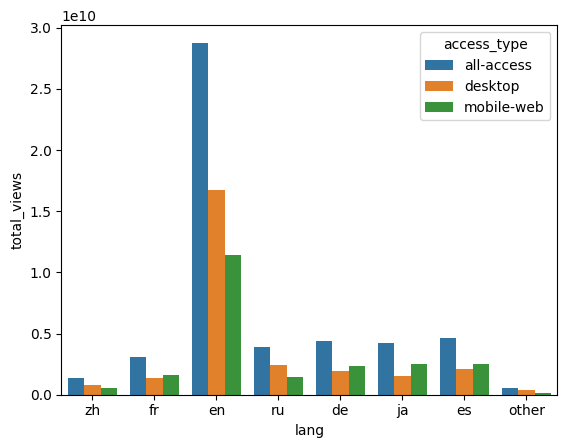

In [90]:
sns.barplot(df, x = 'lang', y ='total_views',estimator="sum",  hue= 'access_type', errorbar = None)

<Axes: xlabel='lang'>

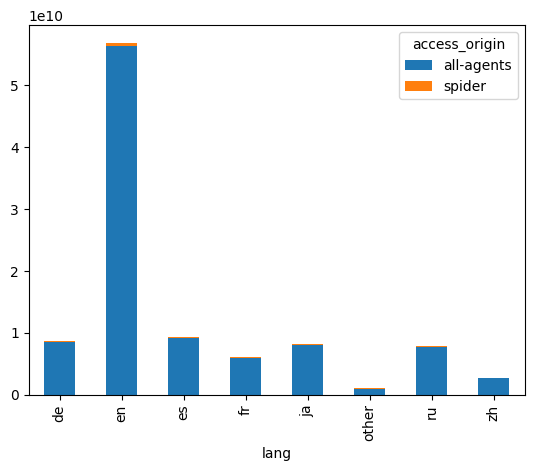

In [91]:
bar = df.groupby(['lang','access_origin'])['total_views'].sum().unstack('access_origin')
bar.plot(kind = 'bar', stacked = True)

<Axes: xlabel='access_type'>

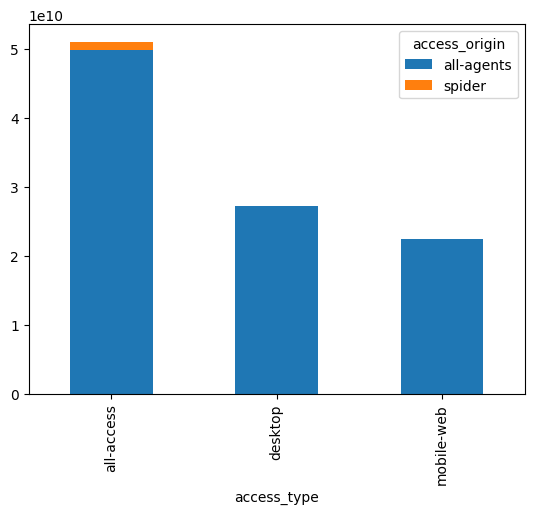

In [92]:
bar = df.groupby(['access_type','access_origin'])['total_views'].sum().unstack('access_origin').fillna(0)
bar.plot(kind = 'bar', stacked = True)

In [93]:
exog

Exog
0       0
1       0
2       0
3       0
4       0
..    ...
545     1
546     1
547     1
548     0
549     0

[550 rows x 1 columns]

In [94]:
df.drop(columns = 'total_views', inplace = True)

/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_5931/3382274676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = 'total_views', inplace = True)


In [95]:
df

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0            18.0        11.0         5.0        13.0        14.0         9.0   
1            11.0        14.0        15.0        18.0        11.0        13.0   
2             1.0         0.0         1.0         1.0         0.0         4.0   
3            35.0        13.0        10.0        94.0         4.0        26.0   
5            12.0         7.0         4.0         5.0        20.0         8.0   
...           ...         ...         ...         ...         ...         ...   
82911        71.0        61.0        60.0        56.0        50.0        60.0   
82912        12.0        12.0        17.0        17.0         8.0        16.0   
82914       140.0       137.0       131.0       115.0        83.0       132.0   
82917         NaN         1.0         2.0         NaN         1.0         NaN   
82925         NaN         6.0         8.0         4.0         1.0         1.0   

       2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2016-12-26  \
0             9.0        22.0        26.0        24.0  ...        14.0   
1            22.0        11.0        10.0         4.0  ...         9.0   
2             0.0         3.0         4.0         4.0  ...         4.0   
3            14.0         9.0        11.0        16.0  ...        16.0   
5             5.0        17.0        24.0         7.0  ...        32.0   
...           ...         ...         ...         ...  ...         ...   
82911        72.0        73.0        57.0        73.0  ...        50.0   
82912        21.0        15.0        12.0        11.0  ...        21.0   
82914       176.0       162.0       138.0       175.0  ...       134.0   
82917         3.0         1.0         3.0         1.0  ...         5.0   
82925         3.0         2.0         2.0         2.0  ...         4.0   

       2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
0            20.0        22.0        19.0        18.0        20.0   
1            30.0        52.0        45.0        26.0        20.0   
2             4.0         6.0         3.0         4.0        17.0   
3            11.0        17.0        19.0        10.0        11.0   
5            19.0        23.0        17.0        17.0        50.0   
...           ...         ...         ...         ...         ...   
82911        47.0        62.0        68.0        52.0        55.0   
82912        14.0        16.0        17.0        22.0        18.0   
82914        91.0       122.0       155.0       133.0       114.0   
82917         7.0         1.0         4.0         5.0         2.0   
82925         0.0         2.0         3.0         7.0         2.0   

       access_type  access_origin  \
0       all-access         spider   
1       all-access         spider   
2       all-access         spider   
3       all-access         spider   
5       all-access         spider   
...            ...            ...   
82911      desktop     all-agents   
82912      desktop     all-agents   
82914      desktop     all-agents   
82917      desktop     all-agents   
82925      desktop     all-agents   

                                                    name   lang  
0                                                   2NE1     zh  
1                                                    2PM     zh  
2                                                     3C     zh  
3                                                4minute     zh  
5                                                   5566     zh  
...                                                  ...    ...  
82911                           Commons:Portale_Comunità  other  
82912                              Commons:Média_du_jour  other  
82914                                   Pàgina_principal  other  
82917       File:Le_pétomane_du_Moulin_Rouge_(1900).webm  other  
82925  File:Louis_Jean_Francois_Lagrenée_-_Amor_and_P...  other  

[123525 rows x 554 columns]

In [96]:
df2 = df.copy()

## Imputing null values using linear interpolation.

In [97]:
df2

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0            18.0        11.0         5.0        13.0        14.0         9.0   
1            11.0        14.0        15.0        18.0        11.0        13.0   
2             1.0         0.0         1.0         1.0         0.0         4.0   
3            35.0        13.0        10.0        94.0         4.0        26.0   
5            12.0         7.0         4.0         5.0        20.0         8.0   
...           ...         ...         ...         ...         ...         ...   
82911        71.0        61.0        60.0        56.0        50.0        60.0   
82912        12.0        12.0        17.0        17.0         8.0        16.0   
82914       140.0       137.0       131.0       115.0        83.0       132.0   
82917         NaN         1.0         2.0         NaN         1.0         NaN   
82925         NaN         6.0         8.0         4.0         1.0         1.0   

       2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2016-12-26  \
0             9.0        22.0        26.0        24.0  ...        14.0   
1            22.0        11.0        10.0         4.0  ...         9.0   
2             0.0         3.0         4.0         4.0  ...         4.0   
3            14.0         9.0        11.0        16.0  ...        16.0   
5             5.0        17.0        24.0         7.0  ...        32.0   
...           ...         ...         ...         ...  ...         ...   
82911        72.0        73.0        57.0        73.0  ...        50.0   
82912        21.0        15.0        12.0        11.0  ...        21.0   
82914       176.0       162.0       138.0       175.0  ...       134.0   
82917         3.0         1.0         3.0         1.0  ...         5.0   
82925         3.0         2.0         2.0         2.0  ...         4.0   

       2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
0            20.0        22.0        19.0        18.0        20.0   
1            30.0        52.0        45.0        26.0        20.0   
2             4.0         6.0         3.0         4.0        17.0   
3            11.0        17.0        19.0        10.0        11.0   
5            19.0        23.0        17.0        17.0        50.0   
...           ...         ...         ...         ...         ...   
82911        47.0        62.0        68.0        52.0        55.0   
82912        14.0        16.0        17.0        22.0        18.0   
82914        91.0       122.0       155.0       133.0       114.0   
82917         7.0         1.0         4.0         5.0         2.0   
82925         0.0         2.0         3.0         7.0         2.0   

       access_type  access_origin  \
0       all-access         spider   
1       all-access         spider   
2       all-access         spider   
3       all-access         spider   
5       all-access         spider   
...            ...            ...   
82911      desktop     all-agents   
82912      desktop     all-agents   
82914      desktop     all-agents   
82917      desktop     all-agents   
82925      desktop     all-agents   

                                                    name   lang  
0                                                   2NE1     zh  
1                                                    2PM     zh  
2                                                     3C     zh  
3                                                4minute     zh  
5                                                   5566     zh  
...                                                  ...    ...  
82911                           Commons:Portale_Comunità  other  
82912                              Commons:Média_du_jour  other  
82914                                   Pàgina_principal  other  
82917       File:Le_pétomane_du_Moulin_Rouge_(1900).webm  other  
82925  File:Louis_Jean_Francois_Lagrenée_-_Amor_and_P...  other  

[123525 rows x 554 columns]

In [98]:
df2.iloc[:,:-4] = df2.iloc[:,:-4].interpolate(method = 'linear', axis = 1).fillna(0)

In [99]:
df2

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0            18.0        11.0         5.0        13.0        14.0         9.0   
1            11.0        14.0        15.0        18.0        11.0        13.0   
2             1.0         0.0         1.0         1.0         0.0         4.0   
3            35.0        13.0        10.0        94.0         4.0        26.0   
5            12.0         7.0         4.0         5.0        20.0         8.0   
...           ...         ...         ...         ...         ...         ...   
82911        71.0        61.0        60.0        56.0        50.0        60.0   
82912        12.0        12.0        17.0        17.0         8.0        16.0   
82914       140.0       137.0       131.0       115.0        83.0       132.0   
82917         0.0         1.0         2.0         1.5         1.0         2.0   
82925         0.0         6.0         8.0         4.0         1.0         1.0   

       2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2016-12-26  \
0             9.0        22.0        26.0        24.0  ...        14.0   
1            22.0        11.0        10.0         4.0  ...         9.0   
2             0.0         3.0         4.0         4.0  ...         4.0   
3            14.0         9.0        11.0        16.0  ...        16.0   
5             5.0        17.0        24.0         7.0  ...        32.0   
...           ...         ...         ...         ...  ...         ...   
82911        72.0        73.0        57.0        73.0  ...        50.0   
82912        21.0        15.0        12.0        11.0  ...        21.0   
82914       176.0       162.0       138.0       175.0  ...       134.0   
82917         3.0         1.0         3.0         1.0  ...         5.0   
82925         3.0         2.0         2.0         2.0  ...         4.0   

       2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
0            20.0        22.0        19.0        18.0        20.0   
1            30.0        52.0        45.0        26.0        20.0   
2             4.0         6.0         3.0         4.0        17.0   
3            11.0        17.0        19.0        10.0        11.0   
5            19.0        23.0        17.0        17.0        50.0   
...           ...         ...         ...         ...         ...   
82911        47.0        62.0        68.0        52.0        55.0   
82912        14.0        16.0        17.0        22.0        18.0   
82914        91.0       122.0       155.0       133.0       114.0   
82917         7.0         1.0         4.0         5.0         2.0   
82925         0.0         2.0         3.0         7.0         2.0   

       access_type  access_origin  \
0       all-access         spider   
1       all-access         spider   
2       all-access         spider   
3       all-access         spider   
5       all-access         spider   
...            ...            ...   
82911      desktop     all-agents   
82912      desktop     all-agents   
82914      desktop     all-agents   
82917      desktop     all-agents   
82925      desktop     all-agents   

                                                    name   lang  
0                                                   2NE1     zh  
1                                                    2PM     zh  
2                                                     3C     zh  
3                                                4minute     zh  
5                                                   5566     zh  
...                                                  ...    ...  
82911                           Commons:Portale_Comunità  other  
82912                              Commons:Média_du_jour  other  
82914                                   Pàgina_principal  other  
82917       File:Le_pétomane_du_Moulin_Rouge_(1900).webm  other  
82925  File:Louis_Jean_Francois_Lagrenée_-_Amor_and_P...  other  

[123525 rows x 554 columns]

In [100]:
df2.drop(columns = ['access_type', 'access_origin', 'name'], inplace = True)

In [101]:
df3 = df2.groupby('lang').mean().T
df3

lang                 de           en           es          fr           ja  \
2015-07-01   799.647328  4200.900811  1172.206002  521.973465   633.729585   
2015-07-02   788.763991  4188.774868  1120.260721  525.326916   727.754240   
2015-07-03   757.008443  3975.953755  1030.279301  505.128695   657.242768   
2015-07-04   694.663028  4147.187733   967.346374  539.936234   825.702545   
2015-07-05   807.571352  4284.875694  1051.982346  530.107138   792.187396   
...                 ...          ...          ...         ...          ...   
2016-12-27  1137.956061  6858.752143  1089.732597  852.198550   810.105040   
2016-12-28  1081.189712  6643.130524  1128.884642  780.368744   811.275919   
2016-12-29  1049.976794  7115.696049  1081.147901  764.657081   888.685015   
2016-12-30  1001.049729  5878.098277   822.373628  721.165597   982.269292   
2016-12-31   957.042938  5742.486097   793.234707  667.223882  1218.647606   

lang             other           ru          zh  
2015-07-01  129.850520   690.629757  300.854394  
2015-07-02  136.160375   702.591922  301.353872  
2015-07-03  128.716826   651.152326  299.338173  
2015-07-04  109.856529   612.445536  302.212779  
2015-07-05  121.784986   652.219098  322.364472  
...                ...          ...         ...  
2016-12-27  184.772165  1019.769264  366.570879  
2016-12-28  214.349310   962.418012  372.836093  
2016-12-29  178.955392   926.553429  343.531336  
2016-12-30  183.873276   828.873274  345.738780  
2016-12-31  159.885244   922.818567  354.046405  

[550 rows x 8 columns]

In [102]:
df3.iloc[:, -1] = exog['Exog']

In [103]:
df3

lang                 de           en           es          fr           ja  \
2015-07-01   799.647328  4200.900811  1172.206002  521.973465   633.729585   
2015-07-02   788.763991  4188.774868  1120.260721  525.326916   727.754240   
2015-07-03   757.008443  3975.953755  1030.279301  505.128695   657.242768   
2015-07-04   694.663028  4147.187733   967.346374  539.936234   825.702545   
2015-07-05   807.571352  4284.875694  1051.982346  530.107138   792.187396   
...                 ...          ...          ...         ...          ...   
2016-12-27  1137.956061  6858.752143  1089.732597  852.198550   810.105040   
2016-12-28  1081.189712  6643.130524  1128.884642  780.368744   811.275919   
2016-12-29  1049.976794  7115.696049  1081.147901  764.657081   888.685015   
2016-12-30  1001.049729  5878.098277   822.373628  721.165597   982.269292   
2016-12-31   957.042938  5742.486097   793.234707  667.223882  1218.647606   

lang             other           ru   zh  
2015-07-01  129.850520   690.629757  0.0  
2015-07-02  136.160375   702.591922  0.0  
2015-07-03  128.716826   651.152326  0.0  
2015-07-04  109.856529   612.445536  0.0  
2015-07-05  121.784986   652.219098  0.0  
...                ...          ...  ...  
2016-12-27  184.772165  1019.769264  1.0  
2016-12-28  214.349310   962.418012  1.0  
2016-12-29  178.955392   926.553429  1.0  
2016-12-30  183.873276   828.873274  0.0  
2016-12-31  159.885244   922.818567  0.0  

[550 rows x 8 columns]

In [104]:
exog

Exog
0       0
1       0
2       0
3       0
4       0
..    ...
545     1
546     1
547     1
548     0
549     0

[550 rows x 1 columns]

In [105]:
exog['Exog']

0      0
1      0
2      0
3      0
4      0
      ..
545    1
546    1
547    1
548    0
549    0
Name: Exog, Length: 550, dtype: int64

In [106]:
exog.shape

(550, 1)

<Axes: >

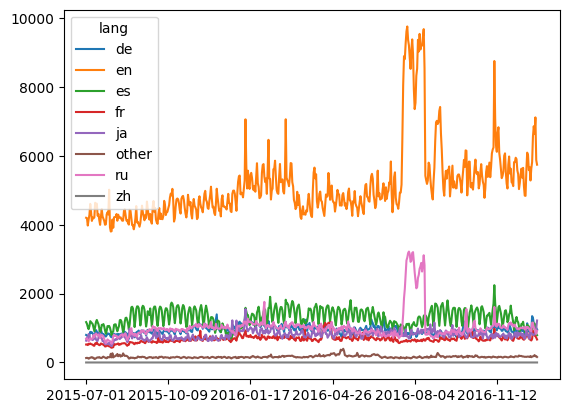

In [107]:
df3.plot()

In [108]:
eng = df3.loc[:,['en']]
eng

lang                 en
2015-07-01  4200.900811
2015-07-02  4188.774868
2015-07-03  3975.953755
2015-07-04  4147.187733
2015-07-05  4284.875694
...                 ...
2016-12-27  6858.752143
2016-12-28  6643.130524
2016-12-29  7115.696049
2016-12-30  5878.098277
2016-12-31  5742.486097

[550 rows x 1 columns]

<Axes: >

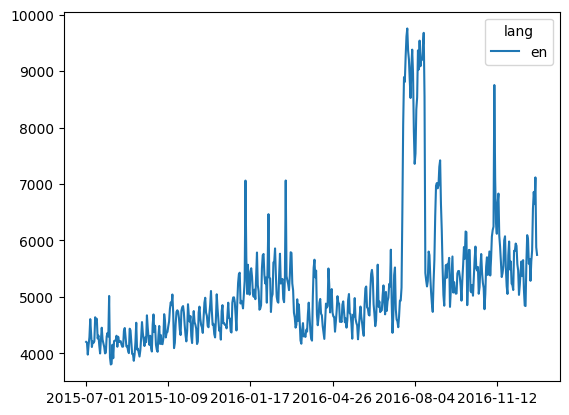

In [109]:
eng.plot()


In [110]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(eng, autolag='AIC') 
result[1]

0.12267004620365096

## Null Hypothesis (H0): The series has a unit root (non-stationary).
## Alternate Hypothesis (H1): The series has no unit root (stationary).
## since p>0.05, we can confidently say that the data is non-stationary.

<Axes: >

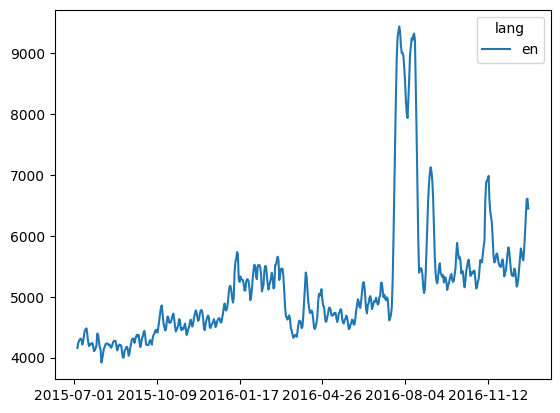

In [111]:
eng.rolling(window = 5, center = False).mean().plot()

In [112]:
eng_dif = eng[1:] - eng.shift(1)[1:]
eng_dif

lang                 en
2015-07-02   -12.125943
2015-07-03  -212.821113
2015-07-04   171.233978
2015-07-05   137.687961
2015-07-06   319.356004
...                 ...
2016-12-27   297.790164
2016-12-28  -215.621619
2016-12-29   472.565525
2016-12-30 -1237.597771
2016-12-31  -135.612181

[549 rows x 1 columns]

<Axes: >

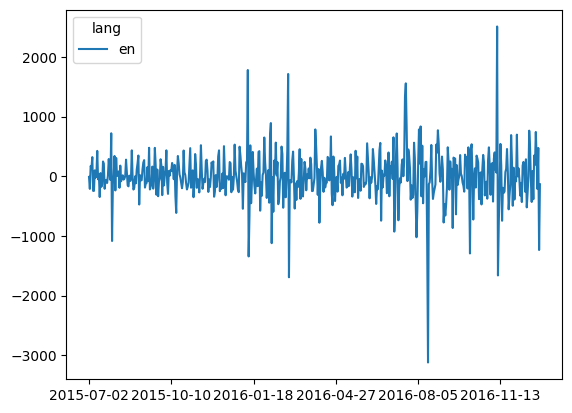

In [113]:
eng_dif.plot()

In [114]:
result = adfuller(eng_dif, autolag='AIC') 
result[1]

5.065700666316545e-13

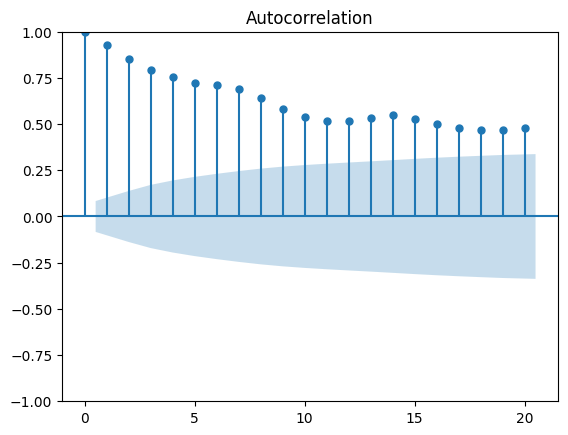

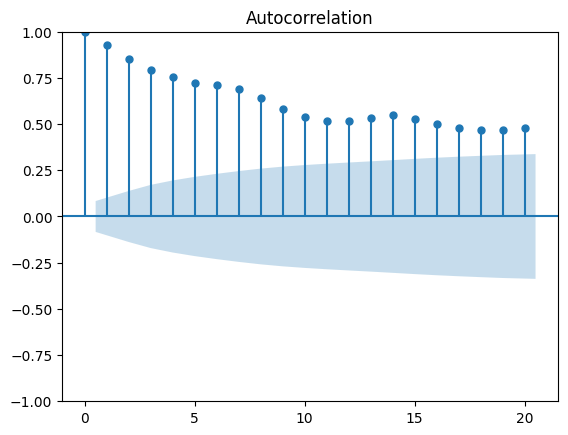

In [115]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(eng, lags = 20)

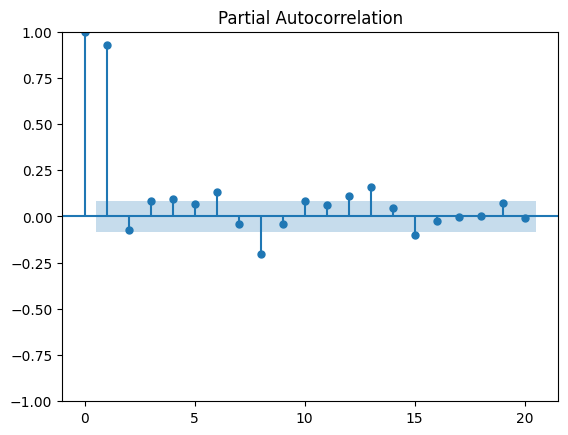

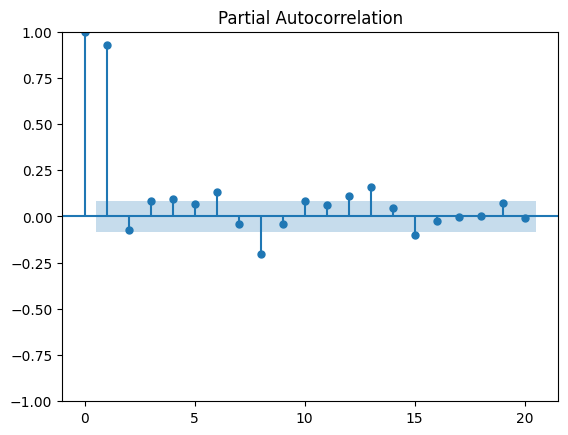

In [116]:
plot_pacf(eng, lags = 20)

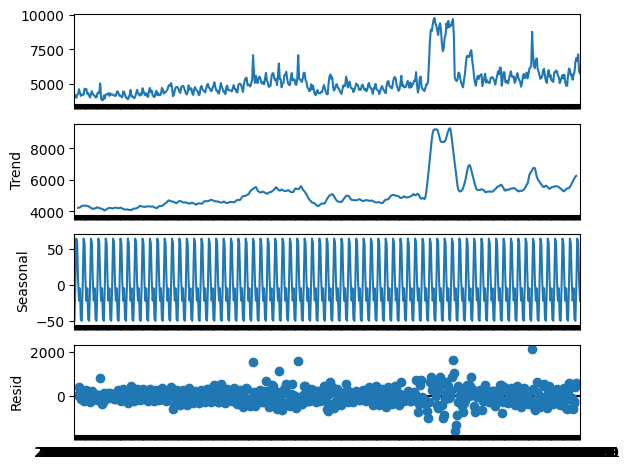

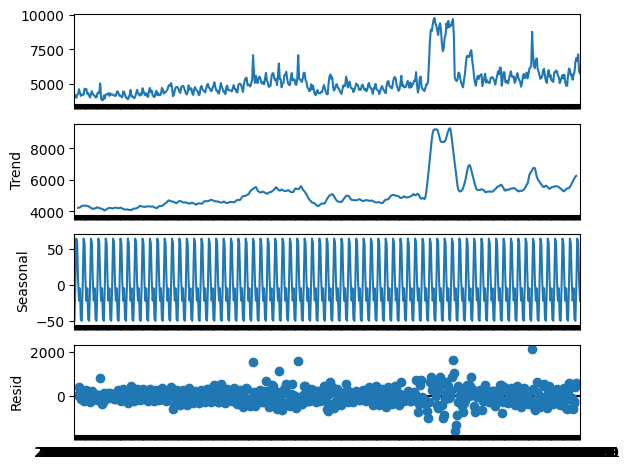

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(eng, period = 8, model='additive').plot()

In [118]:
type(eng)

pandas.core.frame.DataFrame

<Axes: >

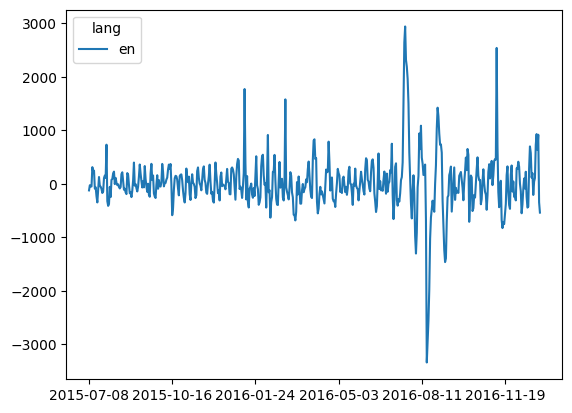

In [119]:
detrend = eng[7:] - eng.rolling(window = 8).mean()[7:]
detrend.plot()

<Axes: >

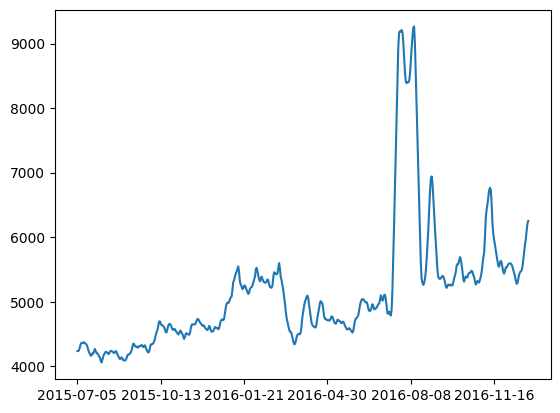

In [120]:
decompose = seasonal_decompose(eng, period = 8, model='additive')
decompose.trend[4:-4].plot()

In [121]:
eng.iloc[4:-4,:] - pd.DataFrame(decompose.trend[4:-4], index = eng.index[4:-4])

en  trend
2015-07-05 NaN    NaN
2015-07-06 NaN    NaN
2015-07-07 NaN    NaN
2015-07-08 NaN    NaN
2015-07-09 NaN    NaN
...         ..    ...
2016-12-23 NaN    NaN
2016-12-24 NaN    NaN
2016-12-25 NaN    NaN
2016-12-26 NaN    NaN
2016-12-27 NaN    NaN

[542 rows x 2 columns]

<Axes: >

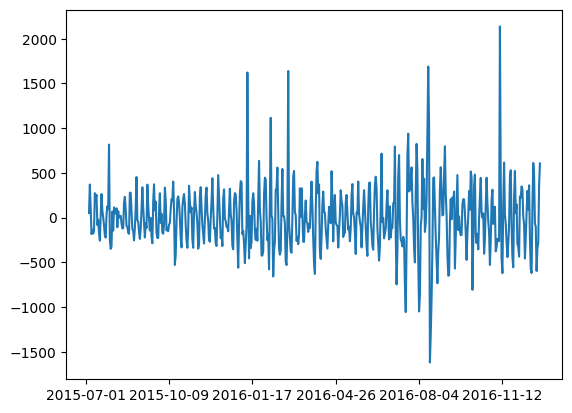

In [122]:
detrend = eng['en']-decompose.trend
detrend.plot()

In [123]:
detrend

2015-07-01           NaN
2015-07-02           NaN
2015-07-03           NaN
2015-07-04           NaN
2015-07-05     50.629794
                 ...    
2016-12-27    606.299365
2016-12-28           NaN
2016-12-29           NaN
2016-12-30           NaN
2016-12-31           NaN
Length: 550, dtype: float64

In [124]:
decompose.seasonal

2015-07-01   -50.404382
2015-07-02    -1.920385
2015-07-03    64.262228
2015-07-04    58.030591
2015-07-05     5.659501
                ...    
2016-12-27    -1.920385
2016-12-28    64.262228
2016-12-29    58.030591
2016-12-30     5.659501
2016-12-31   -22.294375
Name: seasonal, Length: 550, dtype: float64

In [125]:
noise = eng['en']-decompose.seasonal - decompose.trend

<Axes: xlabel='a', ylabel='b'>

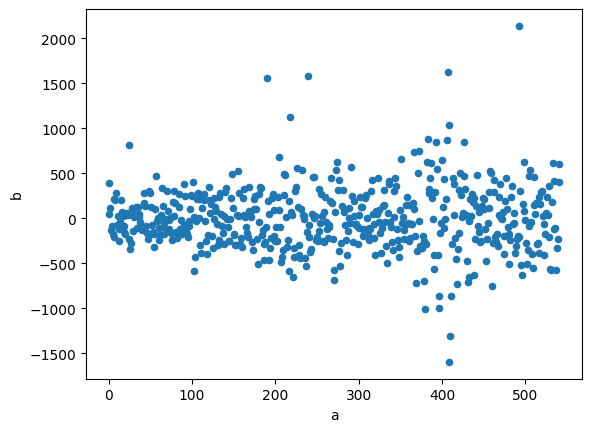

In [126]:
noise = pd.DataFrame(noise[4:-4]).reset_index().drop(columns = 'index').reset_index().rename(columns = {'index': 'a', 0:'b'})
noise.plot(x = 'a', y = 'b', kind = 'scatter')

In [127]:
from statsmodels.tsa.arima.model import ARIMA


In [128]:
model = ARIMA(eng[:-50], order = (1,1,20))
model_fit = model.fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [129]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     en   No. Observations:                  500
Model:                ARIMA(1, 1, 20)   Log Likelihood               -3658.183
Date:                Sun, 22 Sep 2024   AIC                           7360.365
Time:                        18:48:16   BIC                           7453.043
Sample:                    07-01-2015   HQIC                          7396.735
                         - 11-11-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4463      0.246      1.811      0.070      -0.037       0.929
ma.L1         -0.5153      0.250     -2.058      0.040      -1.006      -0.024
ma.L2         -0.1095      0.061     -1.805      0.071      -0.228       0.009
ma.L3          0.0525      0.078      0.677      0.499      -0.100       0.205
ma.L4          0.0182      0.061      0.297      0.767      -0.102       0.138
ma.L5         -0.1118      0.060     -1.849      0.064      -0.230       0.007
ma.L6          0.1715      0.068      2.525      0.012       0.038       0.305
ma.L7          0.1060      0.080      1.318      0.187      -0.052       0.264
ma.L8         -0.1265      0.074     -1.711      0.087      -0.271       0.018
ma.L9         -0.1197      0.060     -2.006      0.045      -0.237      -0.003
ma.L10         0.0348      0.066      0.527      0.599      -0.095       0.165
ma.L11        -0.1174      0.063     -1.863      0.063      -0.241       0.006
ma.L12        -0.1037      0.079     -1.313      0.189      -0.259       0.051
ma.L13         0.0761      0.074      1.025      0.305      -0.069       0.222
ma.L14         0.0908      0.059      1.531      0.126      -0.025       0.207
ma.L15        -0.1753      0.062     -2.829      0.005      -0.297      -0.054
ma.L16         0.0572      0.067      0.859      0.390      -0.073       0.188
ma.L17        -0.0306      0.062     -0.492      0.623      -0.153       0.091
ma.L18        -0.1372      0.065     -2.126      0.033      -0.264      -0.011
ma.L19         0.1413      0.065      2.158      0.031       0.013       0.270
ma.L20         0.1160      0.069      1.685      0.092      -0.019       0.251
sigma2      1.355e+05   4635.499     29.225      0.000    1.26e+05    1.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3435.91
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               6.05   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

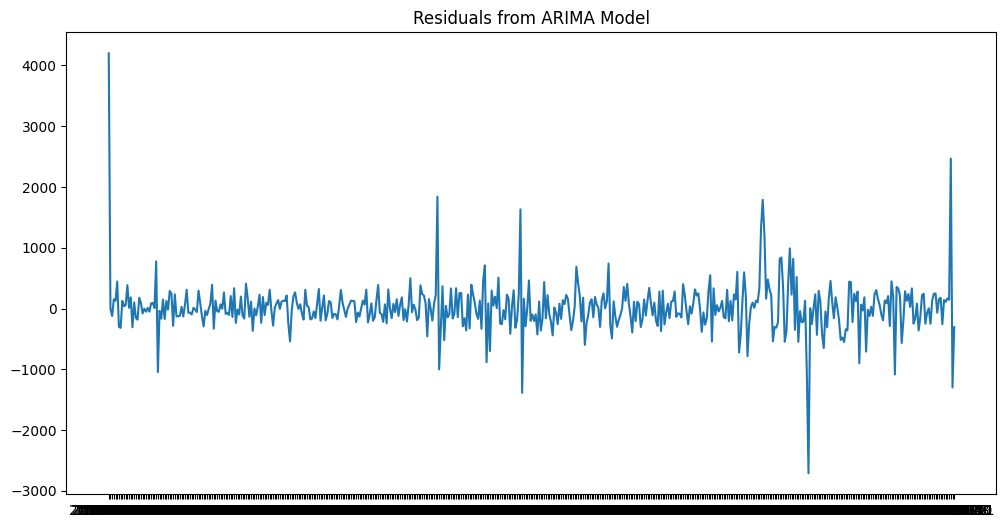

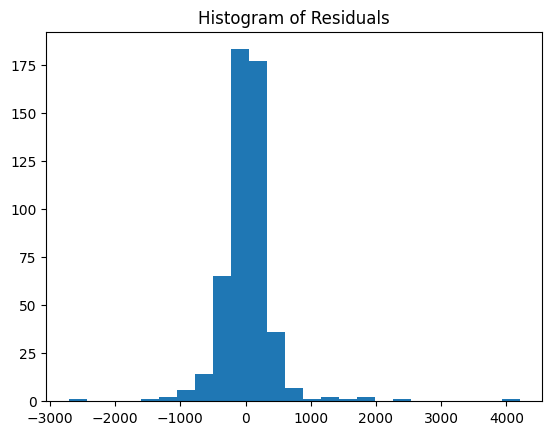

In [130]:
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.show()

# Additionally, you can plot the histogram of the residuals
plt.hist(residuals, bins=25)
plt.title('Histogram of Residuals')
plt.show()

[]

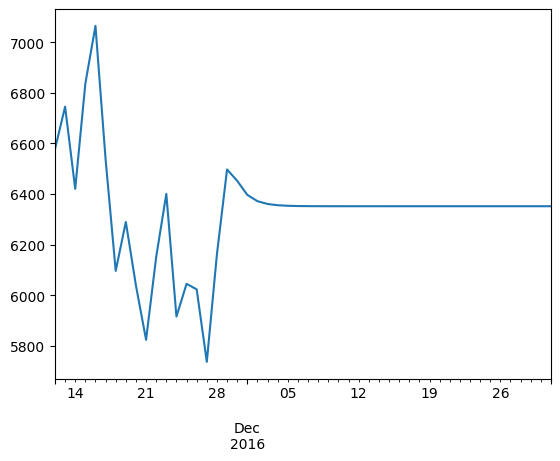

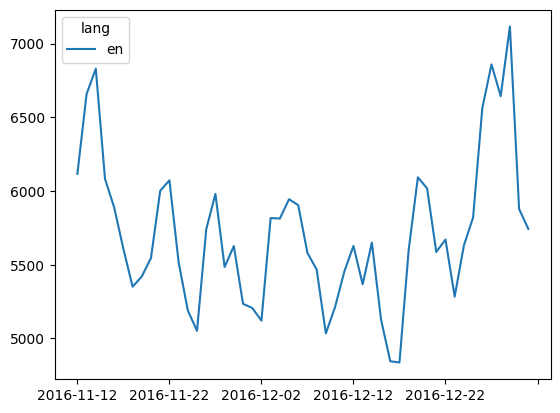

In [131]:
model_fit.forecast(steps = 50).plot()
eng[-50:].plot()
plt.plot()

TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x12bcd1970>.

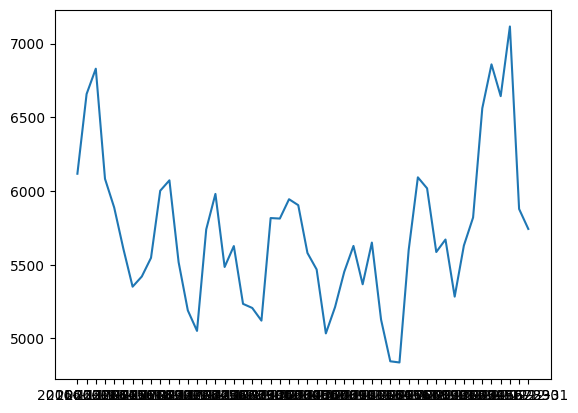

In [132]:
plt.plot(eng[-50:]['en'])
plt.plot(model_fit.forecast(steps = 50))

In [133]:
result = pd.DataFrame({'forecast':model_fit.forecast(steps = 50).values, 'test_data': eng[-50:]['en'].values}, index = eng[-50:]['en'].index)
result

forecast    test_data
2016-11-12  6576.928907  6116.910660
2016-11-13  6745.161559  6657.517676
2016-11-14  6420.520468  6829.377274
2016-11-15  6836.053313  6082.436394
2016-11-16  7064.360814  5887.411804
2016-11-17  6537.765921  5606.946011
2016-11-18  6096.264727  5350.859814
2016-11-19  6289.690352  5419.887853
2016-11-20  6038.102638  5546.449398
2016-11-21  5823.930148  6001.560364
2016-11-22  6151.531263  6072.268430
2016-11-23  6400.453339  5516.919017
2016-11-24  5915.751393  5189.955247
2016-11-25  6045.128217  5050.970676
2016-11-26  6023.262427  5739.386269
2016-11-27  5736.731890  5980.170758
2016-11-28  6162.163260  5484.593394
2016-11-29  6496.952941  5626.363491
2016-11-30  6452.213665  5234.401947
2016-12-01  6396.578995  5206.698793
2016-12-02  6371.750338  5120.669867
2016-12-03  6360.669798  5816.332720
2016-12-04  6355.724771  5812.945149
2016-12-05  6353.517903  5944.109262
2016-12-06  6352.533021  5903.722993
2016-12-07  6352.093487  5579.527442
2016-12-08  6351.897332  5467.509567
2016-12-09  6351.809792  5033.982474
2016-12-10  6351.770725  5212.522584
2016-12-11  6351.753290  5452.008473
2016-12-12  6351.745509  5627.218467
2016-12-13  6351.742036  5367.159064
2016-12-14  6351.740487  5649.926802
2016-12-15  6351.739795  5127.462004
2016-12-16  6351.739486  4844.878526
2016-12-17  6351.739349  4836.821445
2016-12-18  6351.739287  5599.354649
2016-12-19  6351.739260  6092.571183
2016-12-20  6351.739248  6017.943988
2016-12-21  6351.739242  5586.057504
2016-12-22  6351.739240  5670.727760
2016-12-23  6351.739239  5283.516507
2016-12-24  6351.739238  5629.874161
2016-12-25  6351.739238  5820.107795
2016-12-26  6351.739238  6560.961979
2016-12-27  6351.739238  6858.752143
2016-12-28  6351.739238  6643.130524
2016-12-29  6351.739238  7115.696049
2016-12-30  6351.739238  5878.098277
2016-12-31  6351.739238  5742.486097

<Axes: >

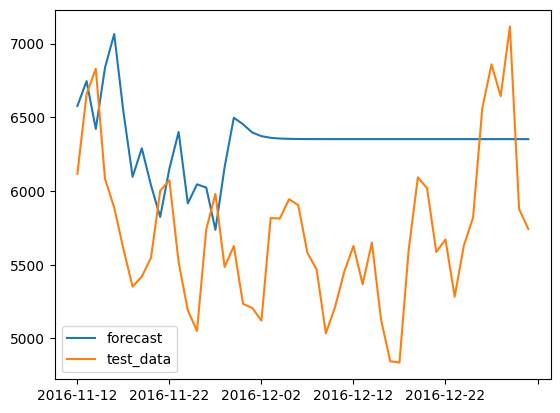

In [134]:
result.plot()

In [135]:
from sklearn.metrics import mean_absolute_percentage_error

In [136]:
mean_absolute_percentage_error(result['test_data'], result['forecast'])

0.13143532871553995

In [137]:
def arima_(p,d,q):
    model = ARIMA(eng[:-50], order = (p,d,q))
    model_fit = model.fit()
    result = pd.DataFrame({'forecast':model_fit.forecast(steps = 50).values, 'test_data': eng[-50:]['en'].values}, index = eng[-50:]['en'].index)
    result.plot()
    mean_absolute_percentage_error(result['test_data'], result['forecast'])

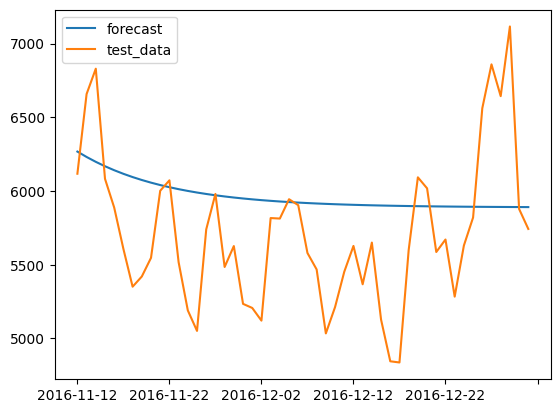

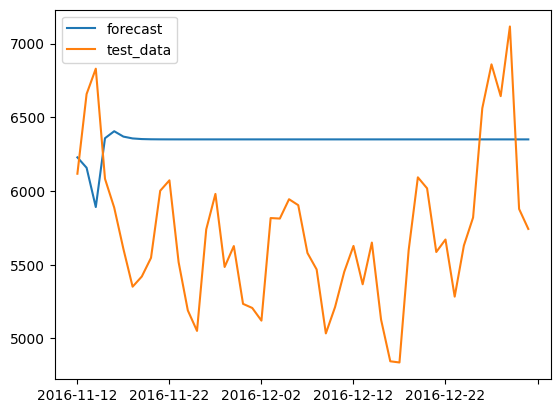

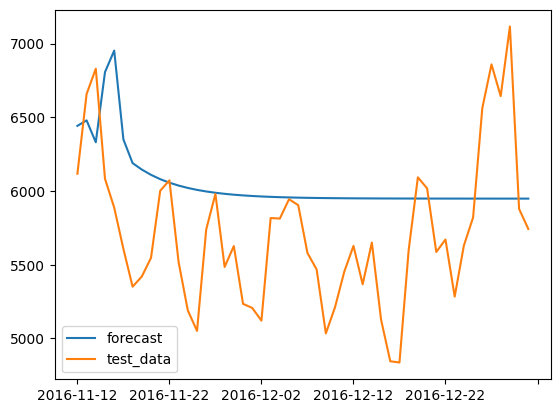

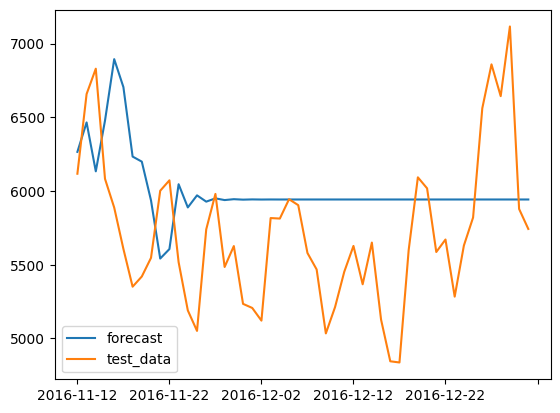

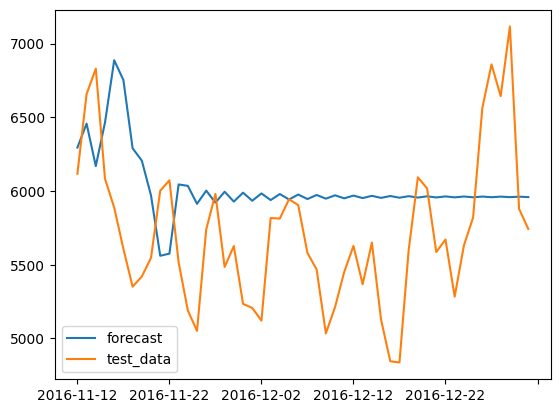

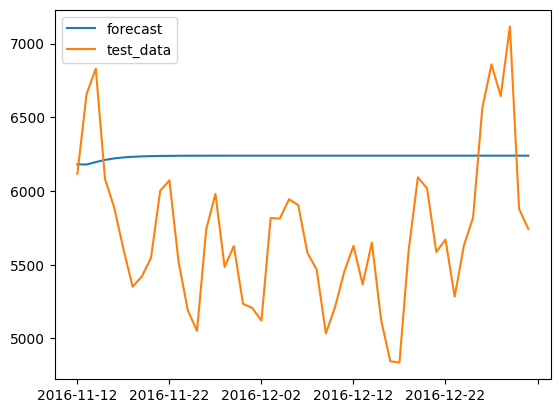

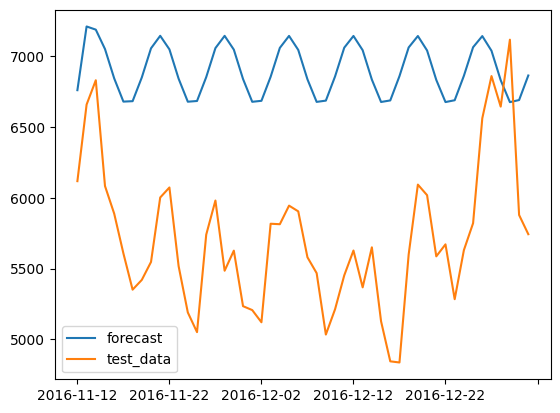

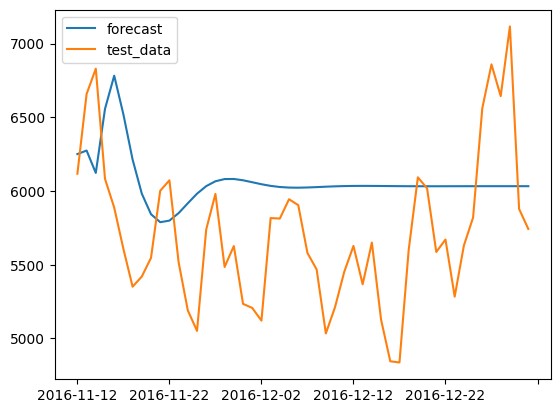

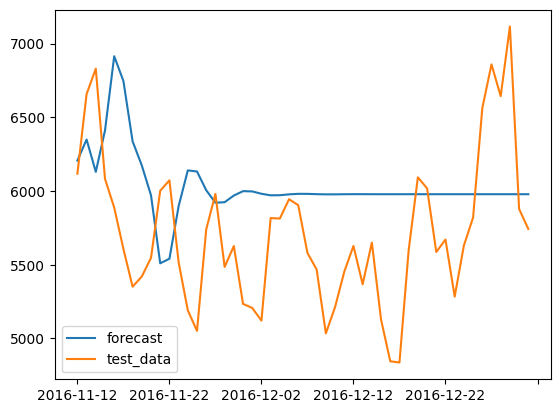

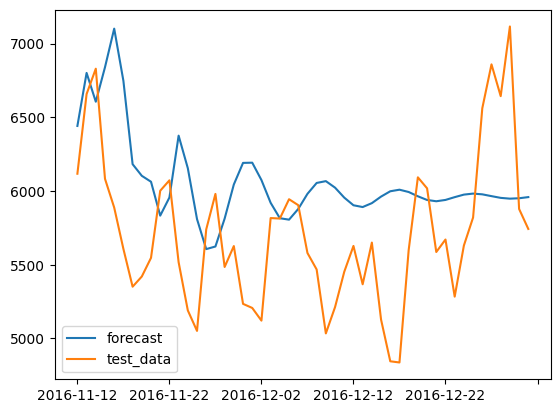

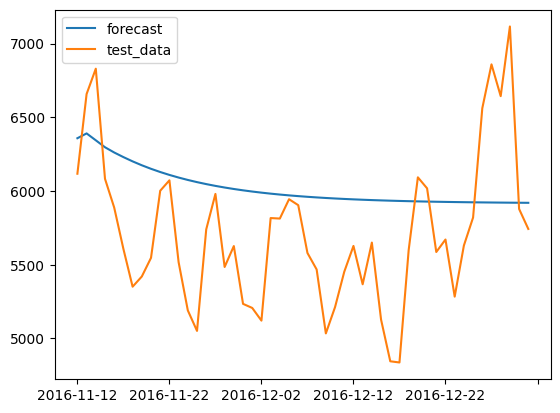

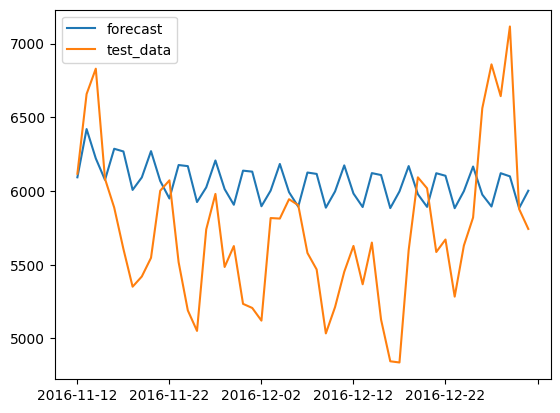

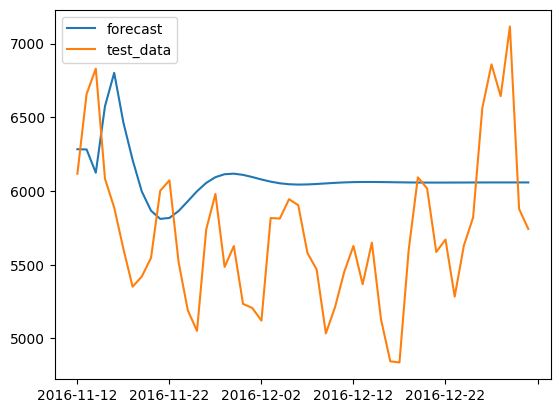

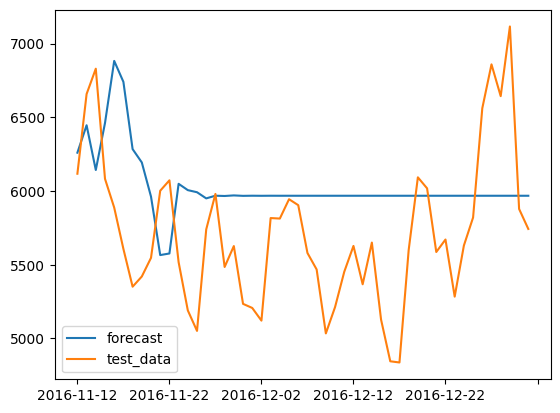

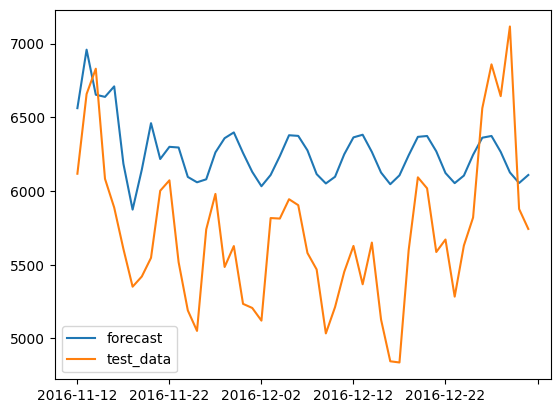

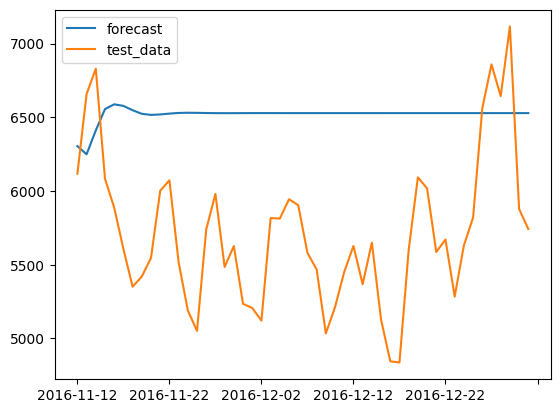

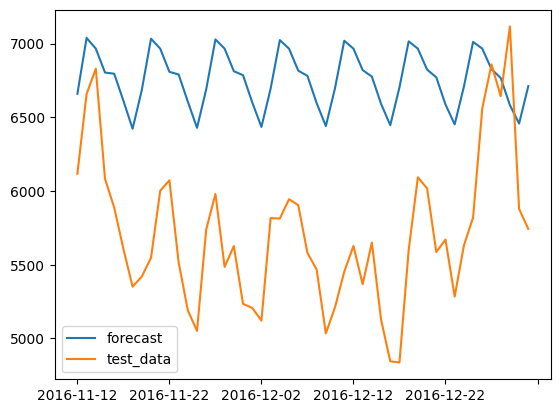

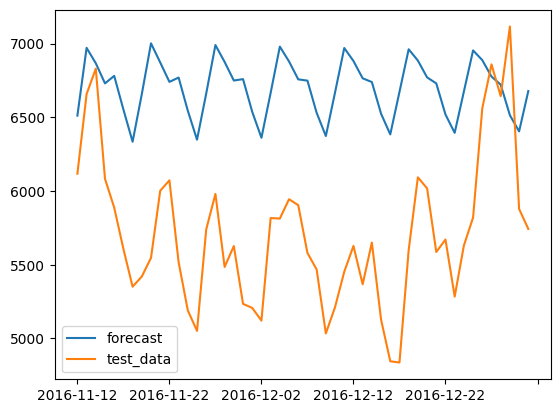

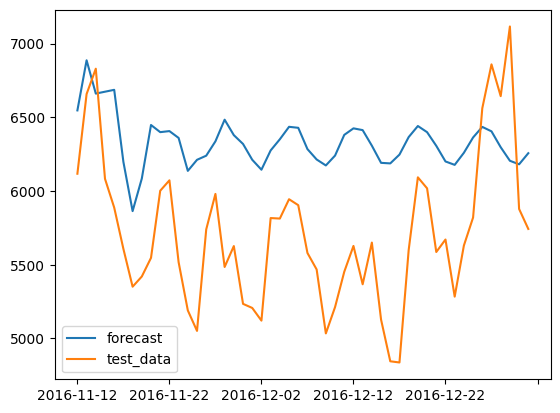

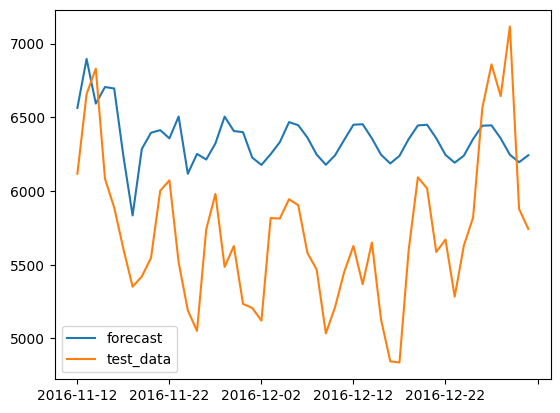

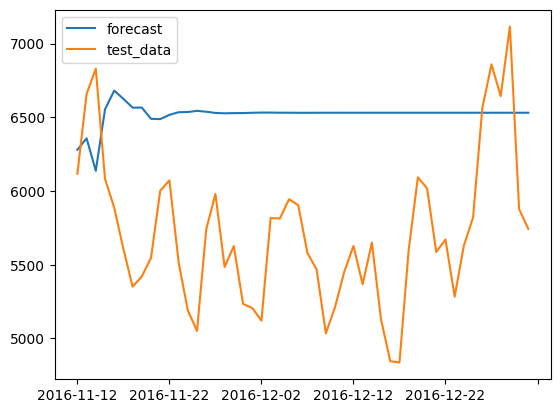

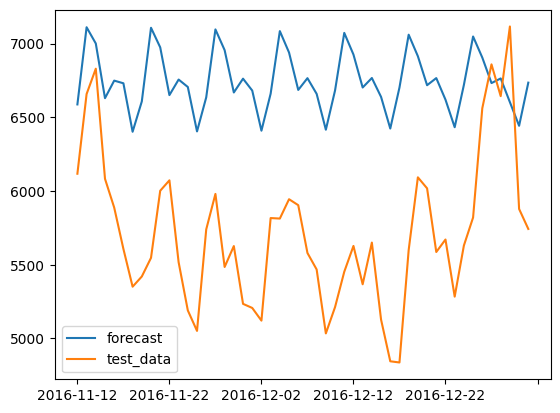

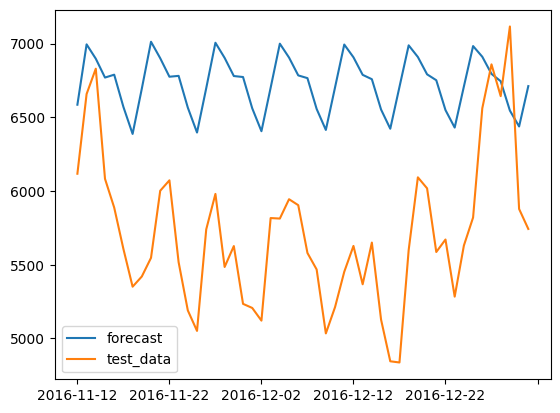

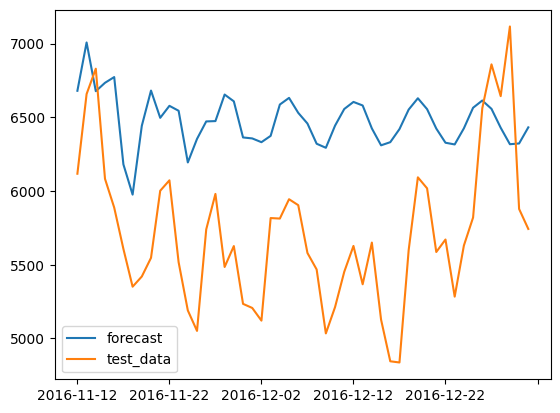

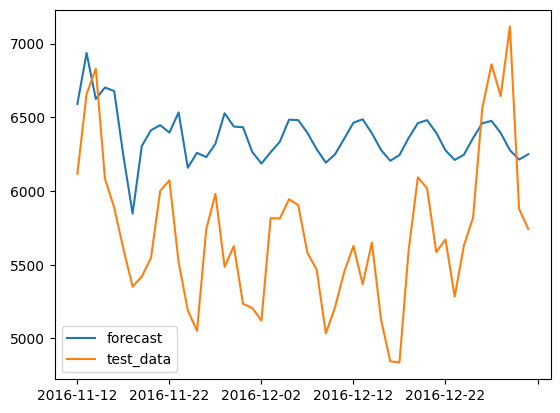

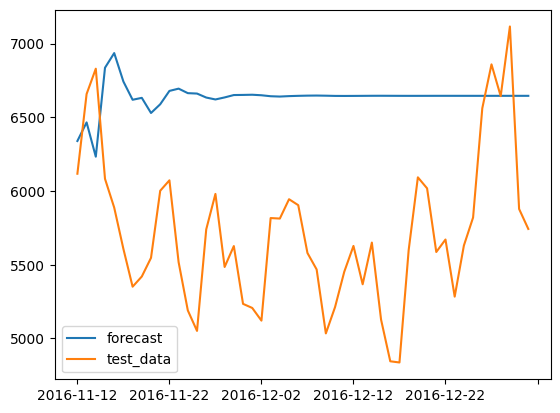

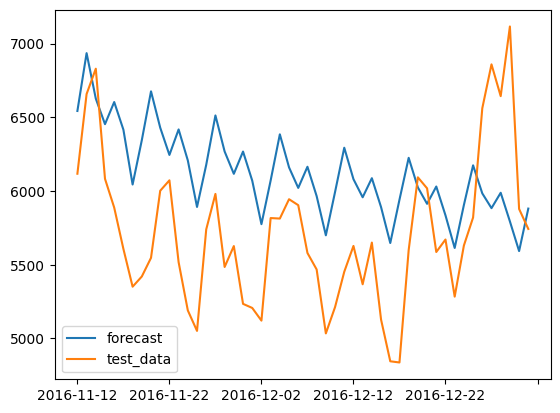

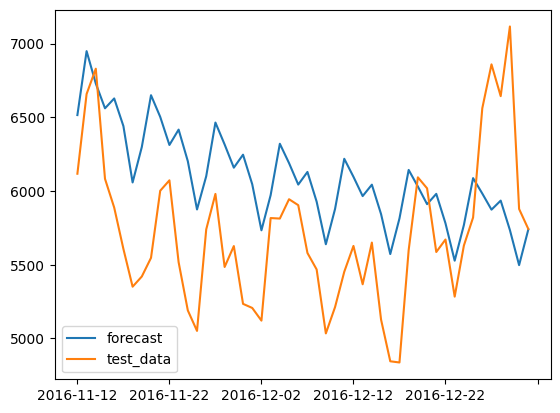

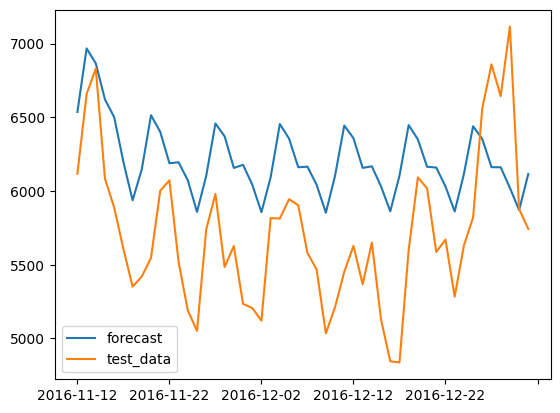

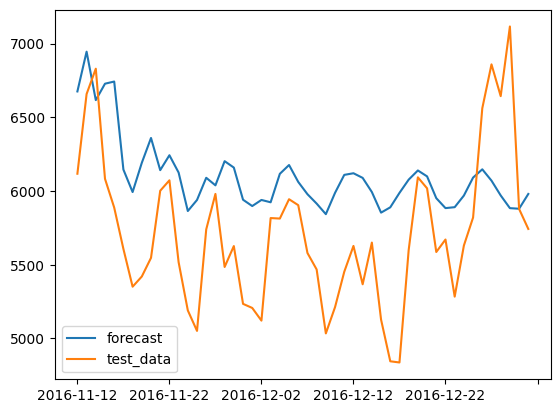

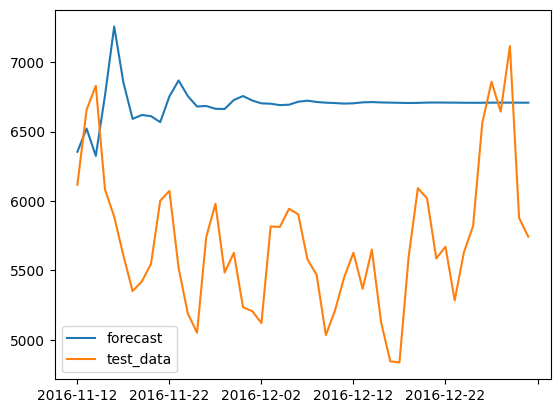

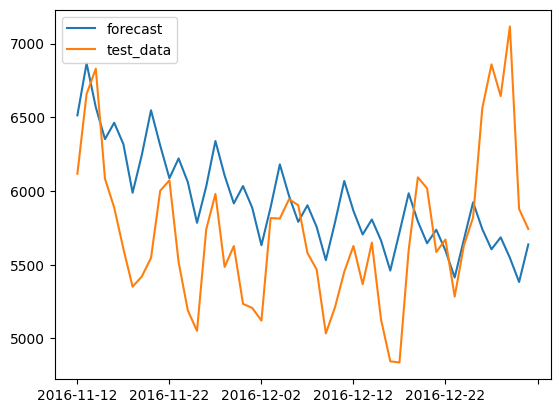

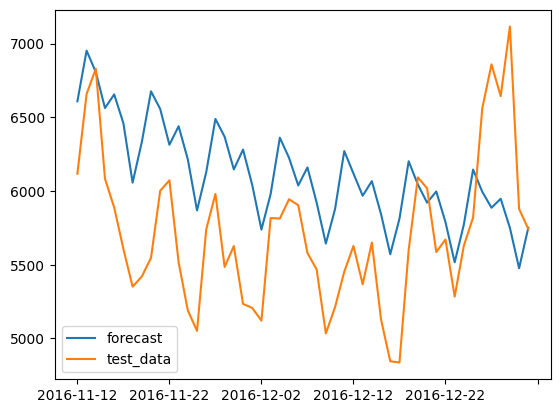

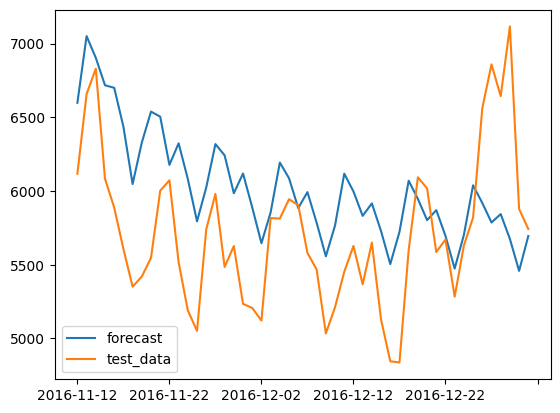

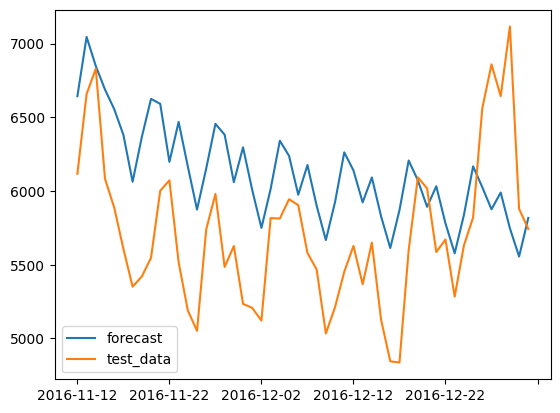

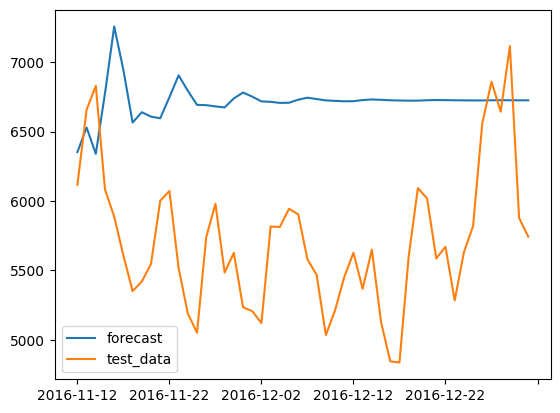

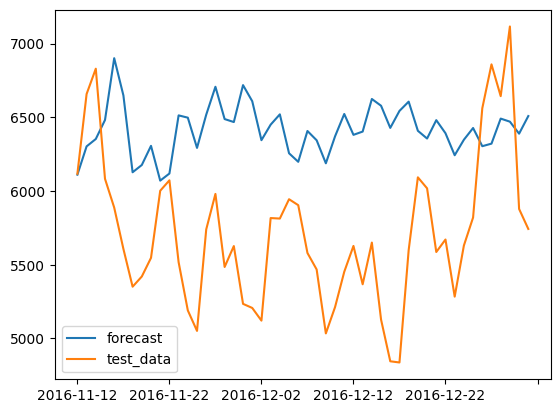

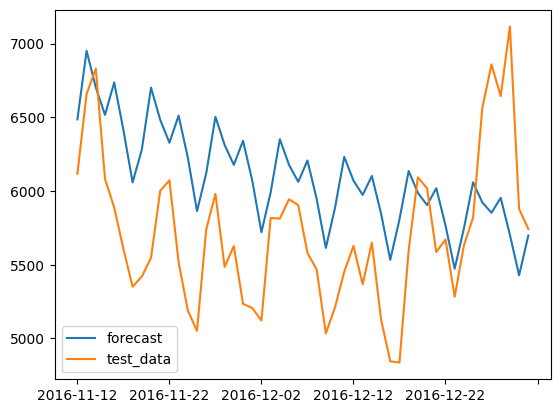

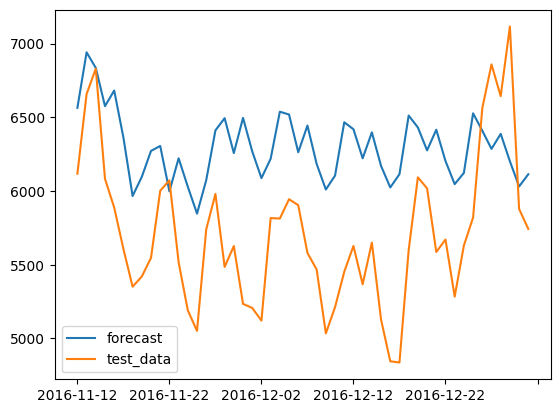

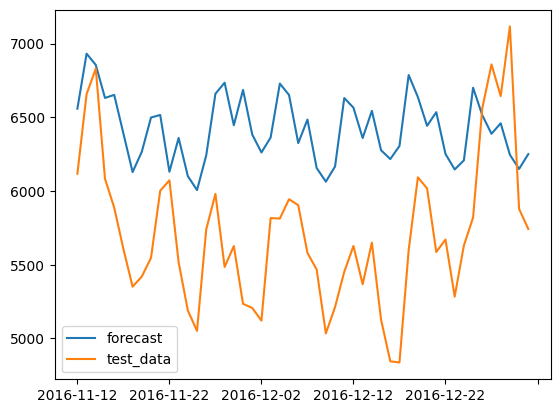

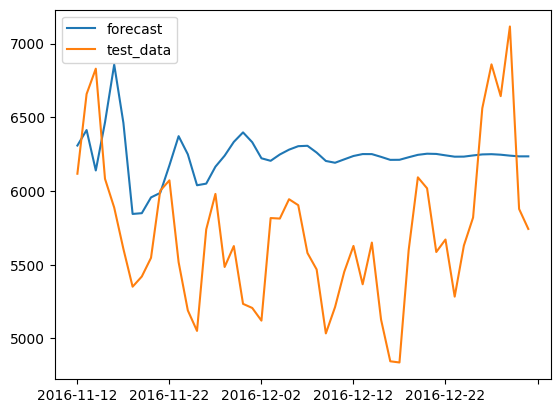

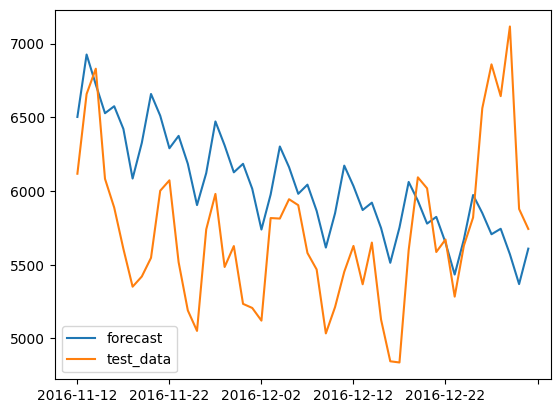

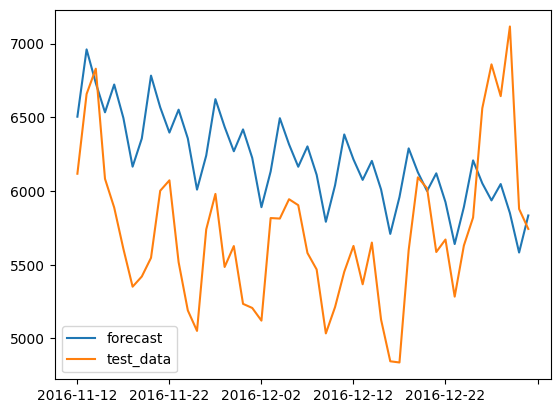

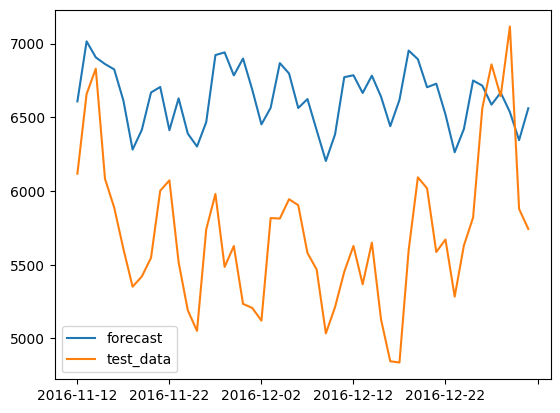

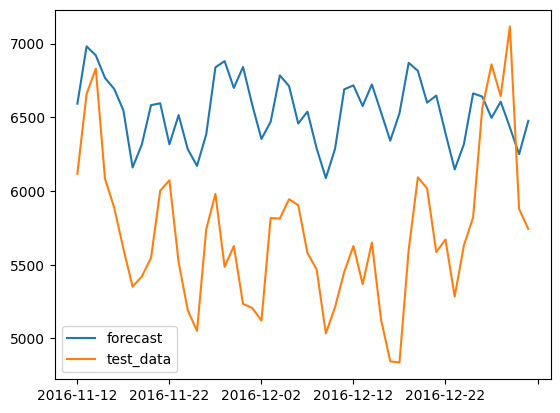

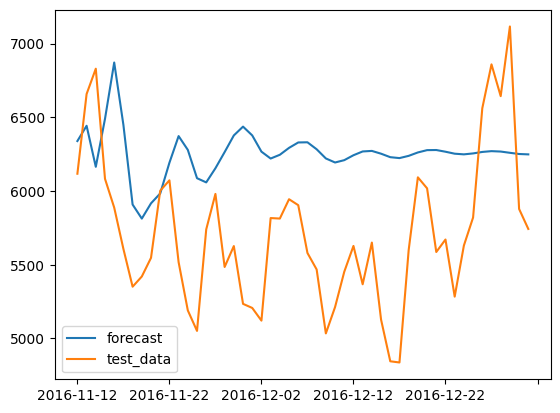

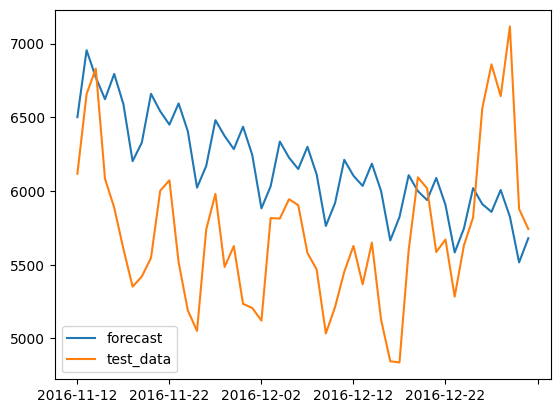

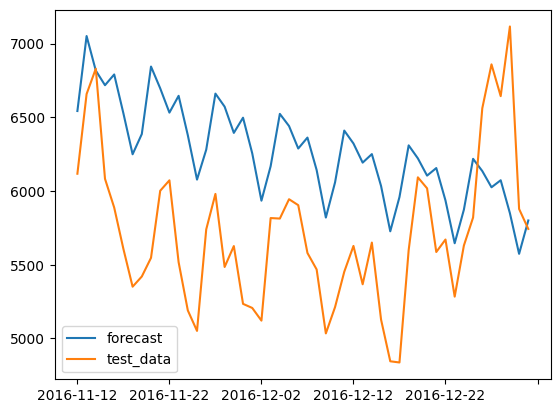

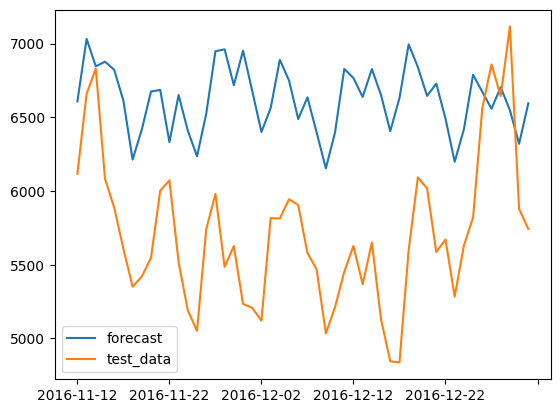

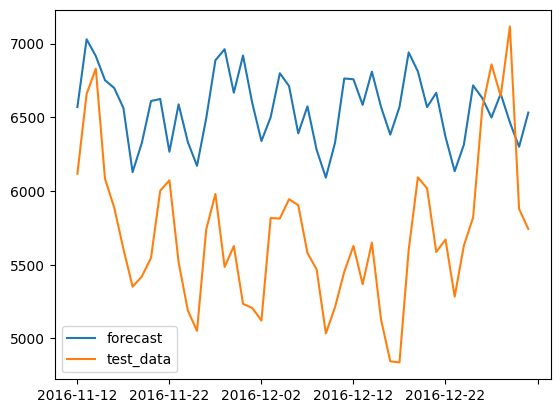

In [138]:
import warnings
warnings.filterwarnings('ignore')

for p in np.arange(1,11):
    for q in [1,6,8,13,15]:
        model = ARIMA(eng[:-50], order = (p,1,q))
        model_fit = model.fit()
        result = pd.DataFrame({'forecast':model_fit.forecast(steps = 50).values, 'test_data': eng[-50:]['en'].values}, index = eng[-50:]['en'].index)
        mape = mean_absolute_percentage_error(result['test_data'], result['forecast'])
        result.plot(legend = mape)

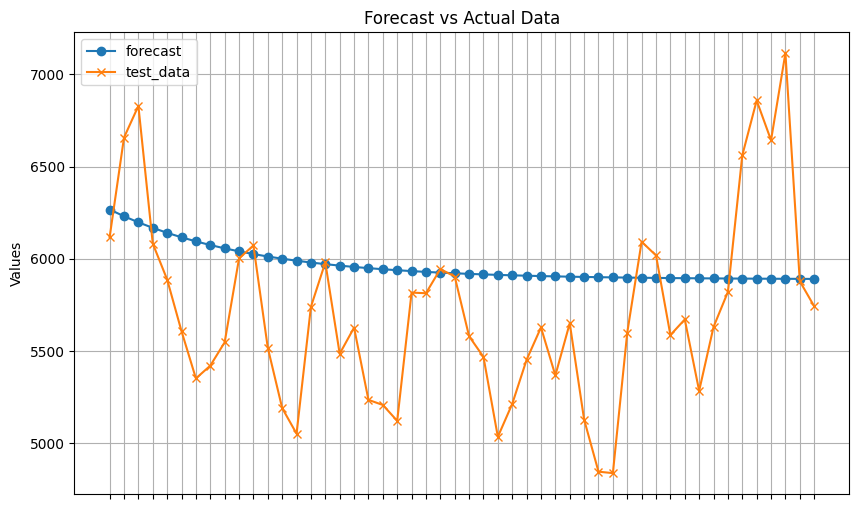

MAPE: 8.10%
p: 1  q: 1


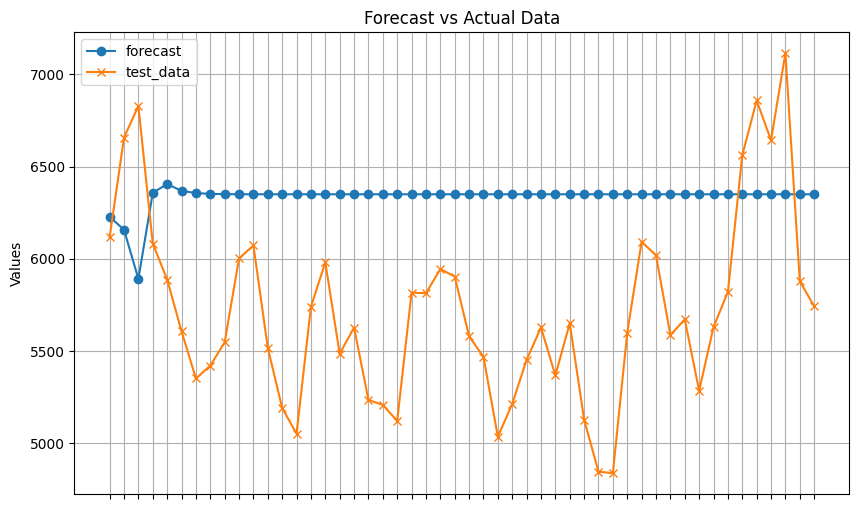

MAPE: 13.58%
p: 1  q: 6


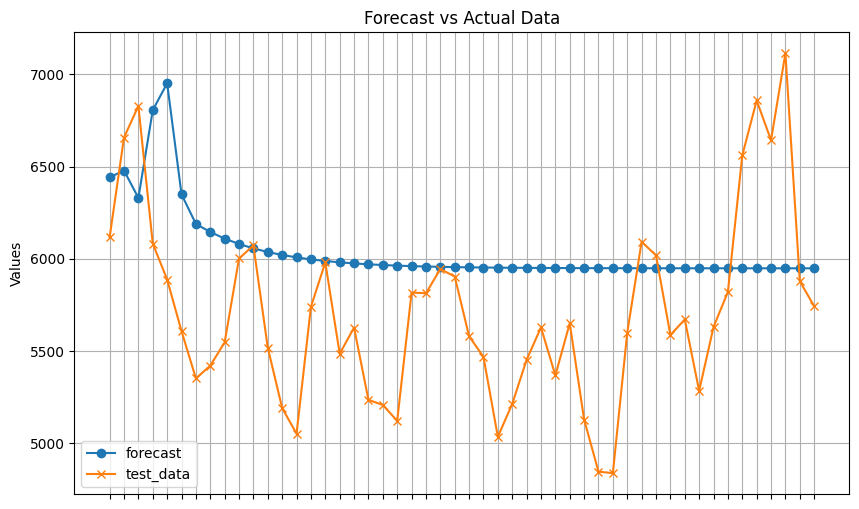

MAPE: 9.03%
p: 1  q: 8


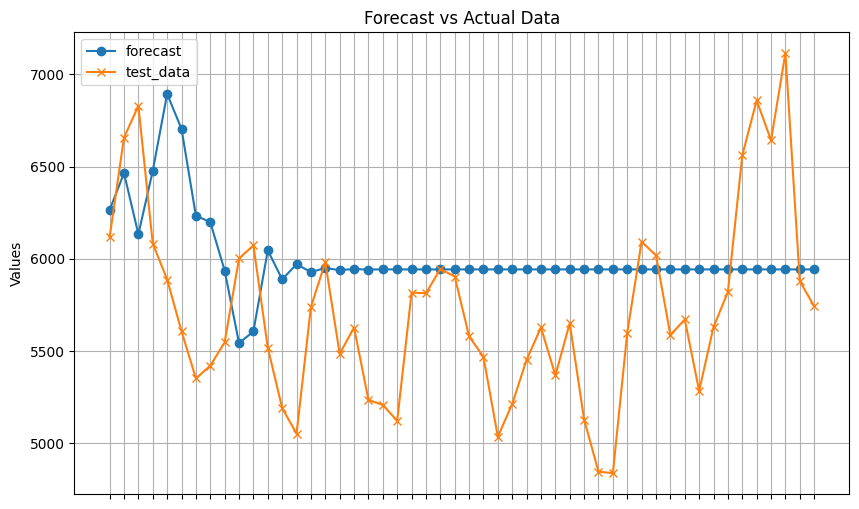

MAPE: 9.09%
p: 1  q: 13


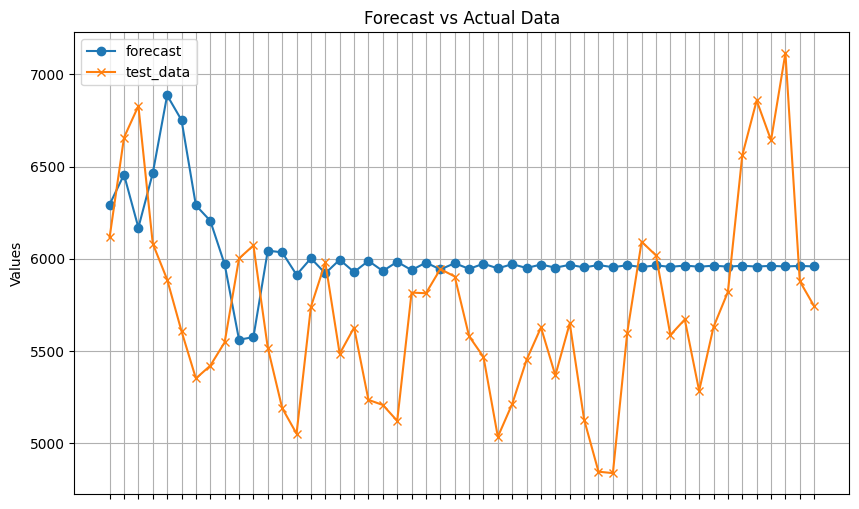

MAPE: 9.36%
p: 1  q: 15


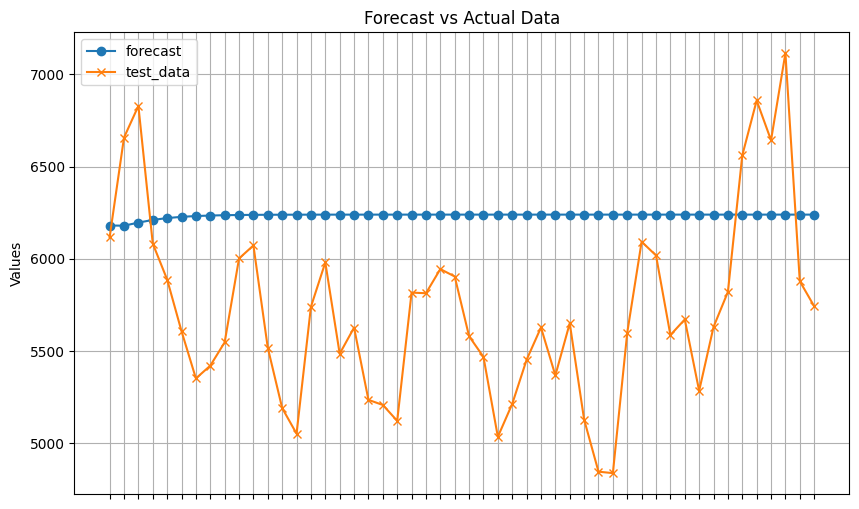

MAPE: 11.82%
p: 2  q: 1


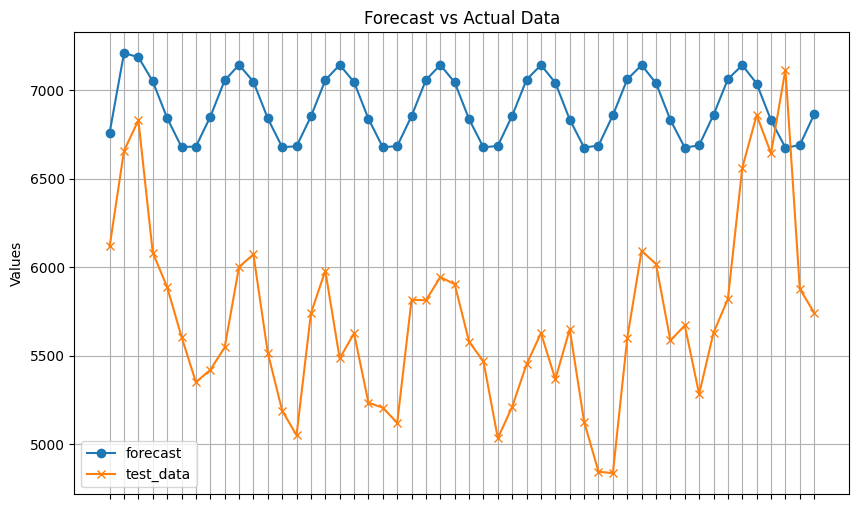

MAPE: 21.72%
p: 2  q: 6


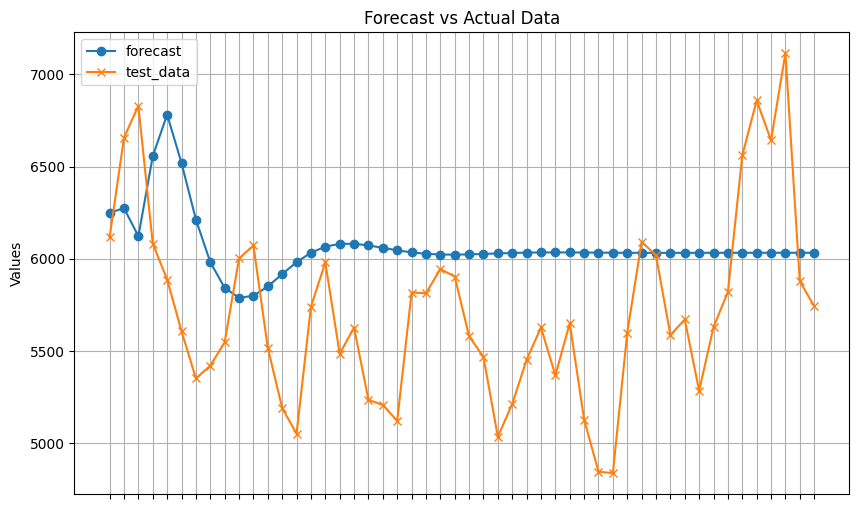

MAPE: 9.62%
p: 2  q: 8


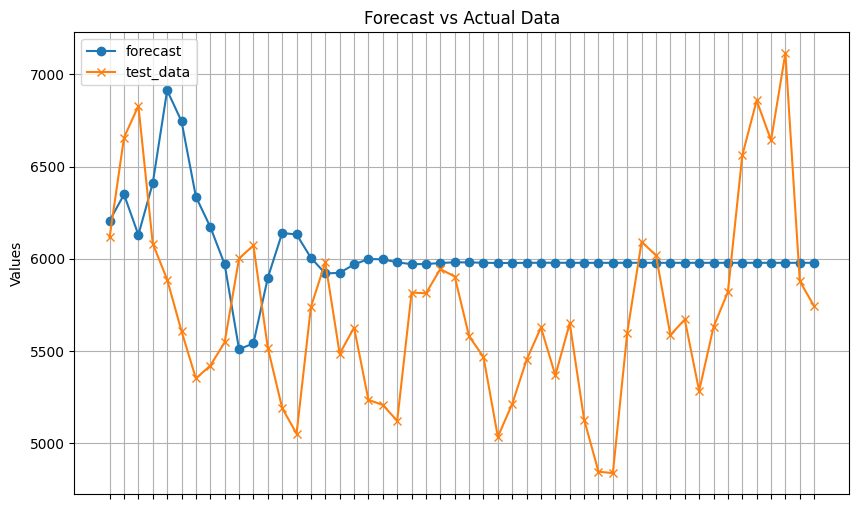

MAPE: 9.61%
p: 2  q: 13


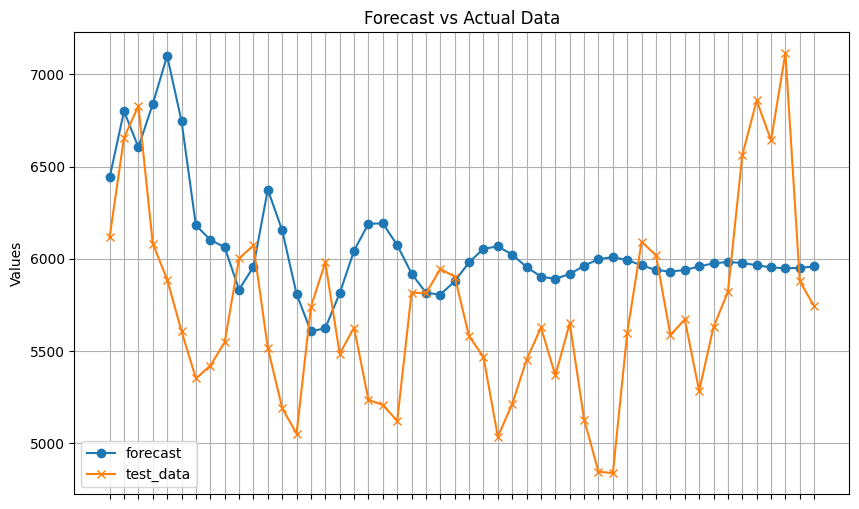

MAPE: 9.62%
p: 2  q: 15


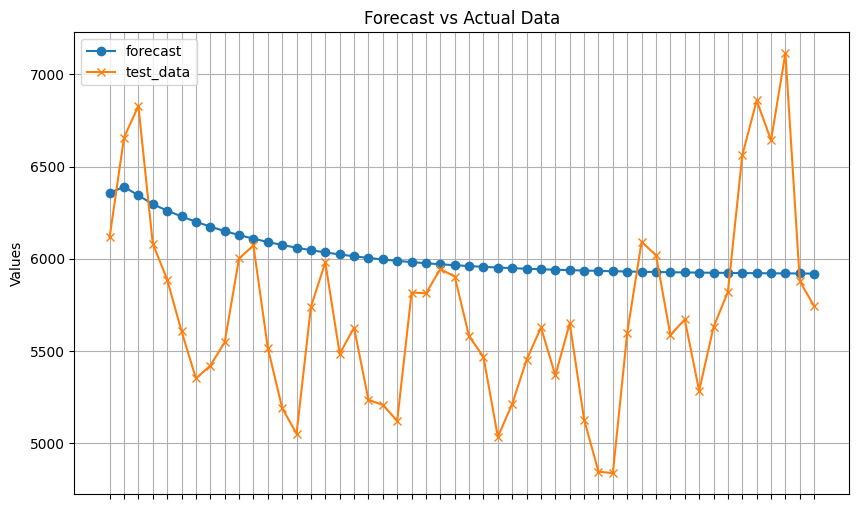

MAPE: 8.76%
p: 3  q: 1


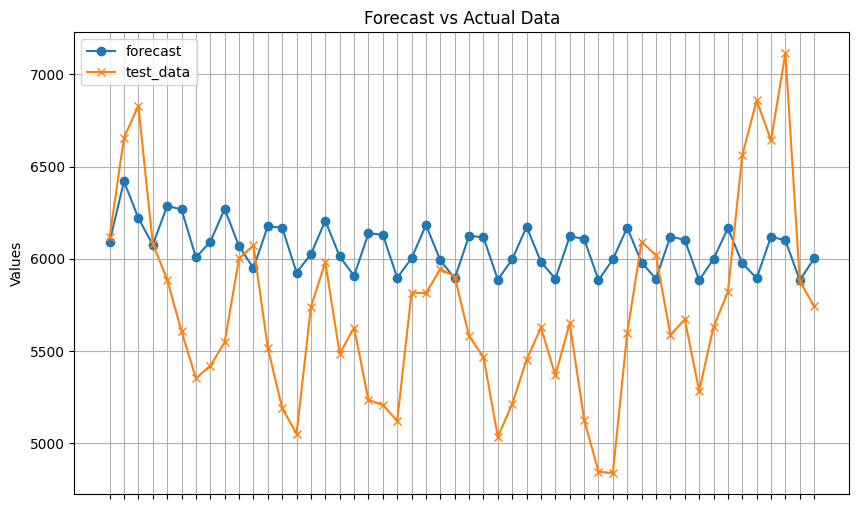

MAPE: 9.31%
p: 3  q: 6


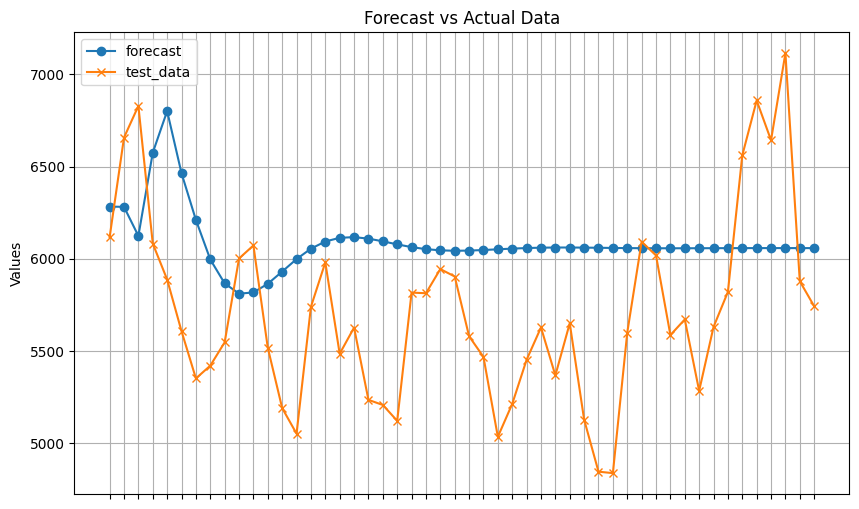

MAPE: 9.89%
p: 3  q: 8


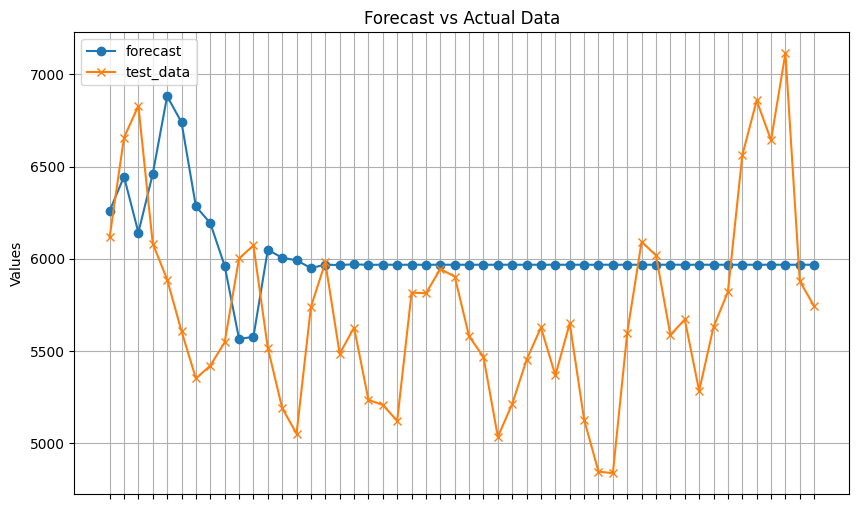

MAPE: 9.39%
p: 3  q: 13


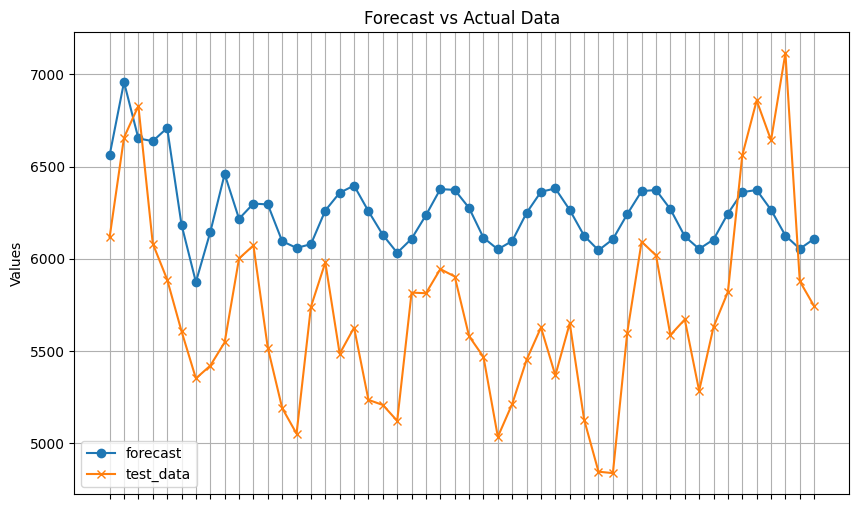

MAPE: 11.40%
p: 3  q: 15


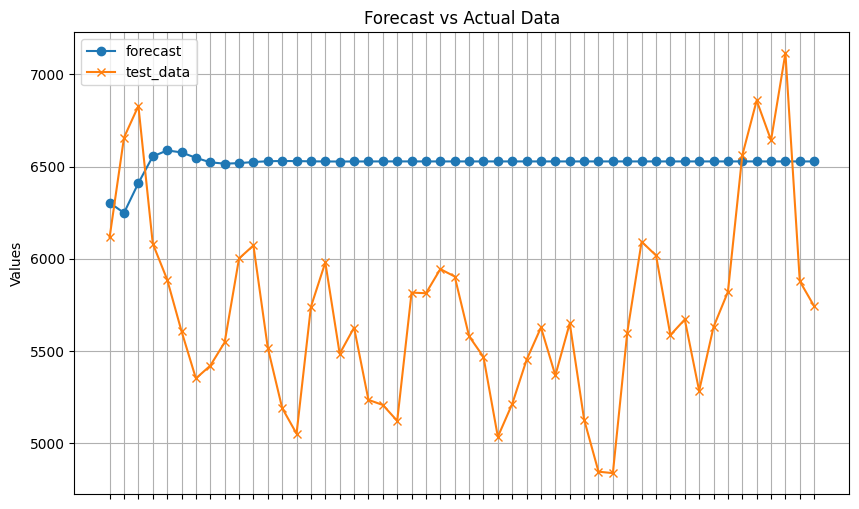

MAPE: 15.99%
p: 4  q: 1


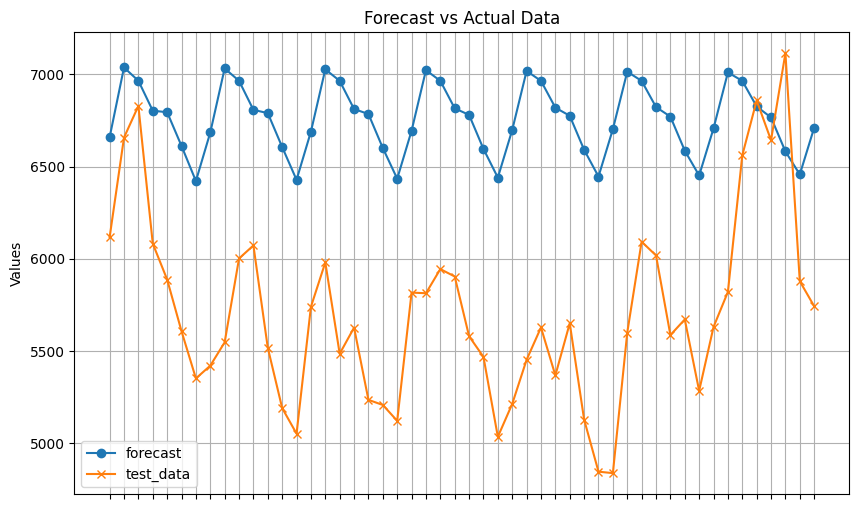

MAPE: 19.27%
p: 4  q: 6


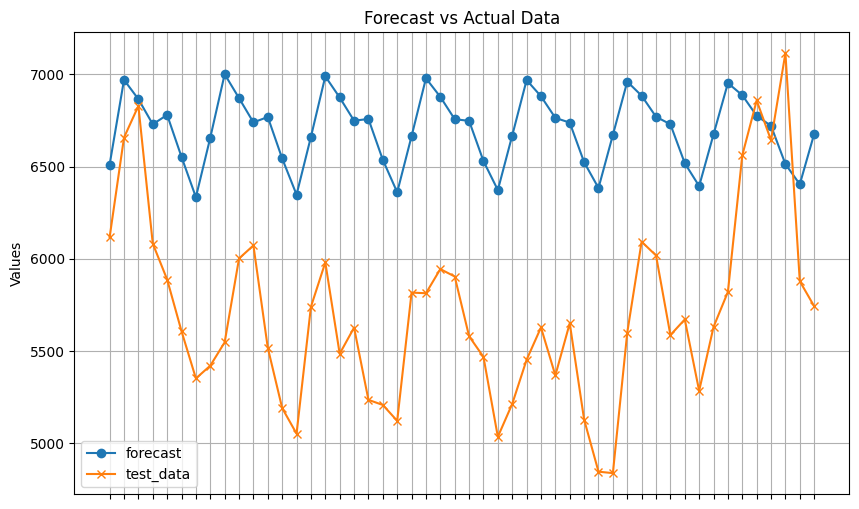

MAPE: 18.33%
p: 4  q: 8


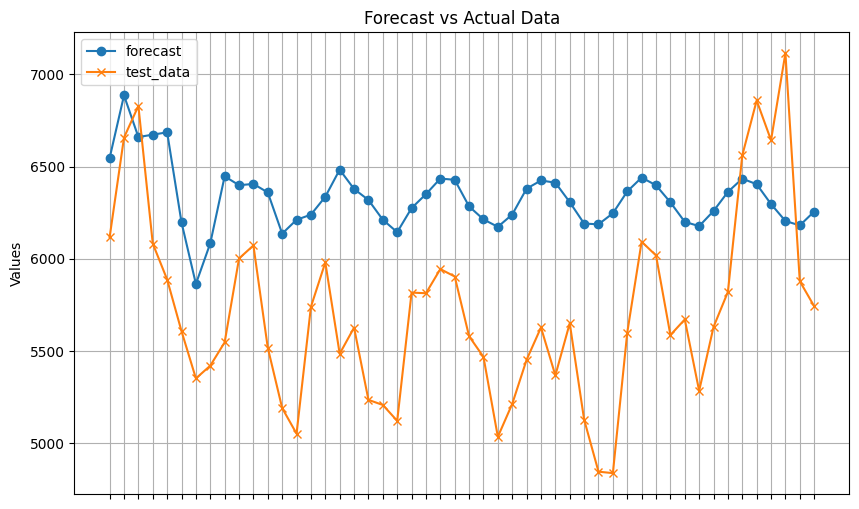

MAPE: 12.57%
p: 4  q: 13


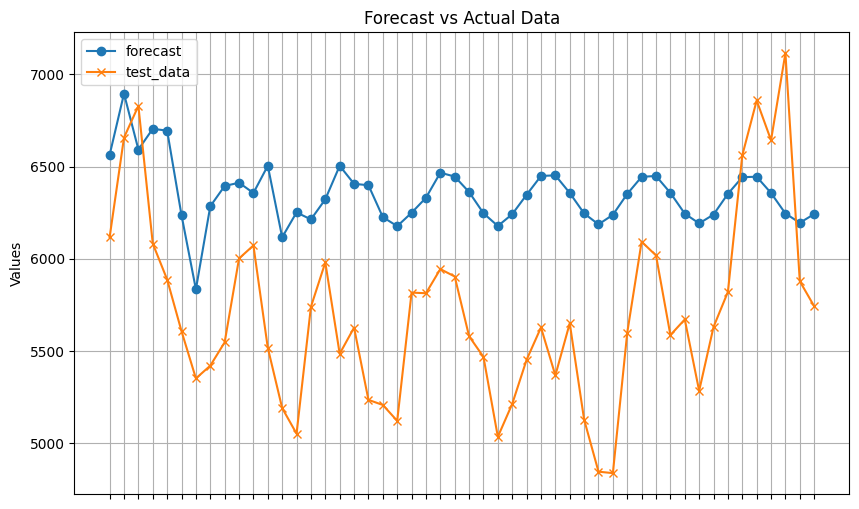

MAPE: 12.86%
p: 4  q: 15


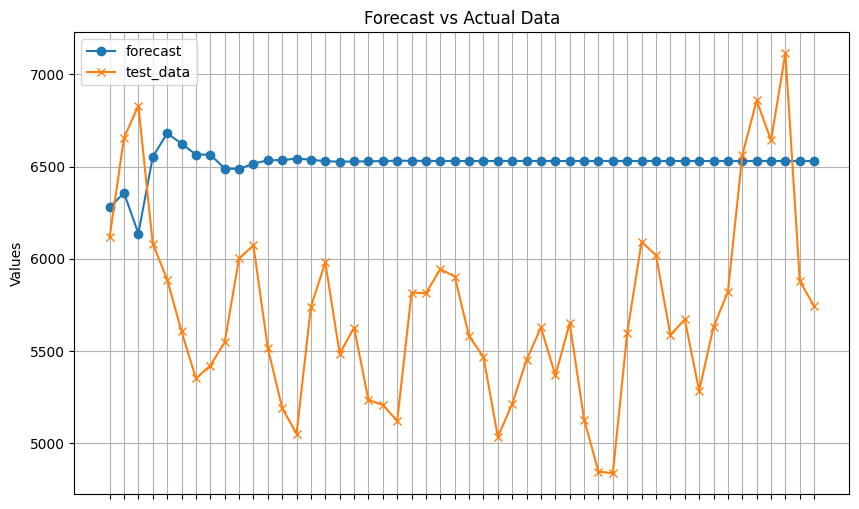

MAPE: 16.12%
p: 5  q: 1


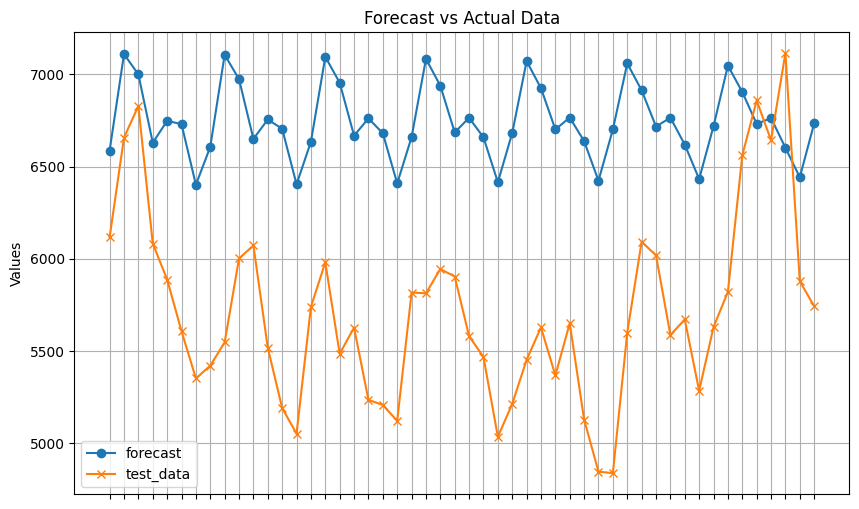

MAPE: 19.08%
p: 5  q: 6


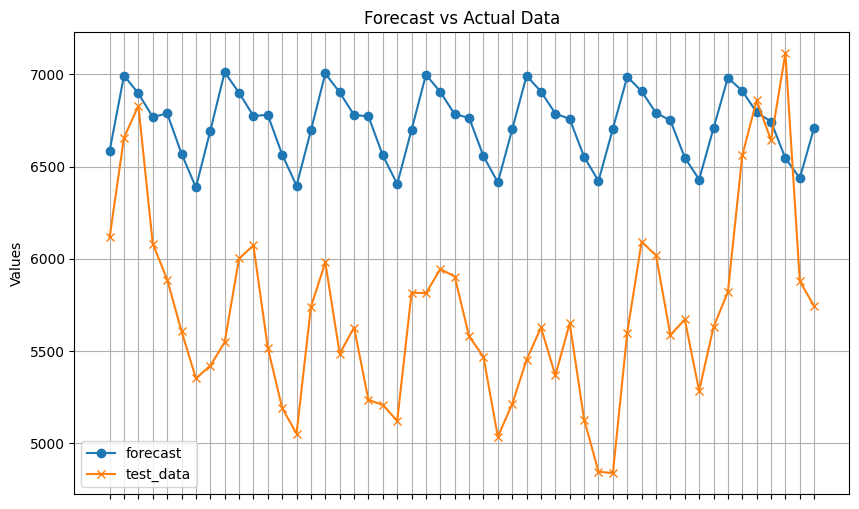

MAPE: 18.81%
p: 5  q: 8


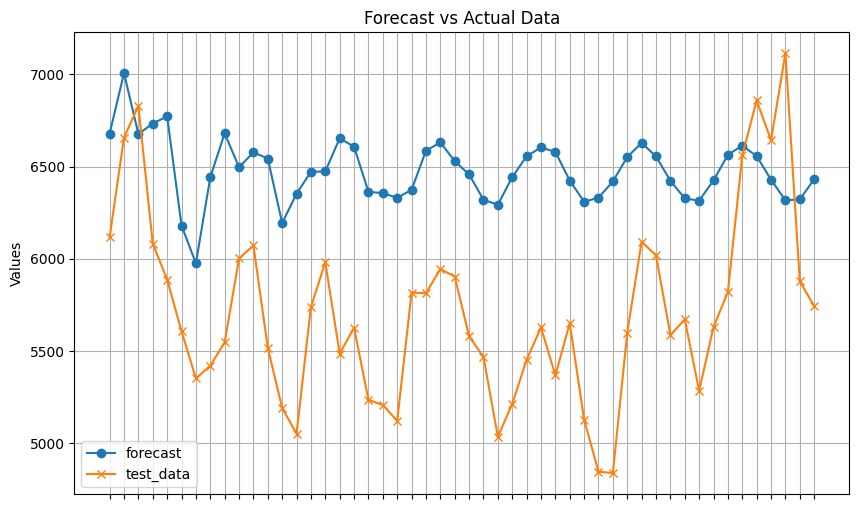

MAPE: 14.87%
p: 5  q: 13


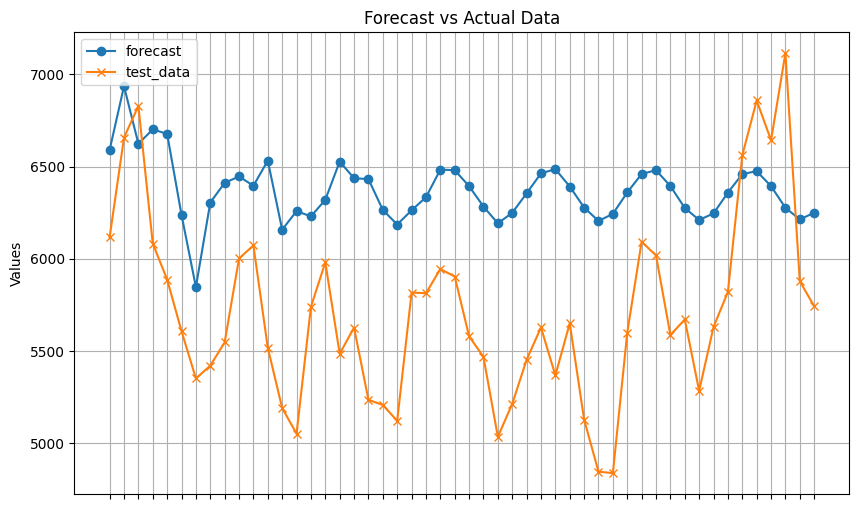

MAPE: 13.13%
p: 5  q: 15


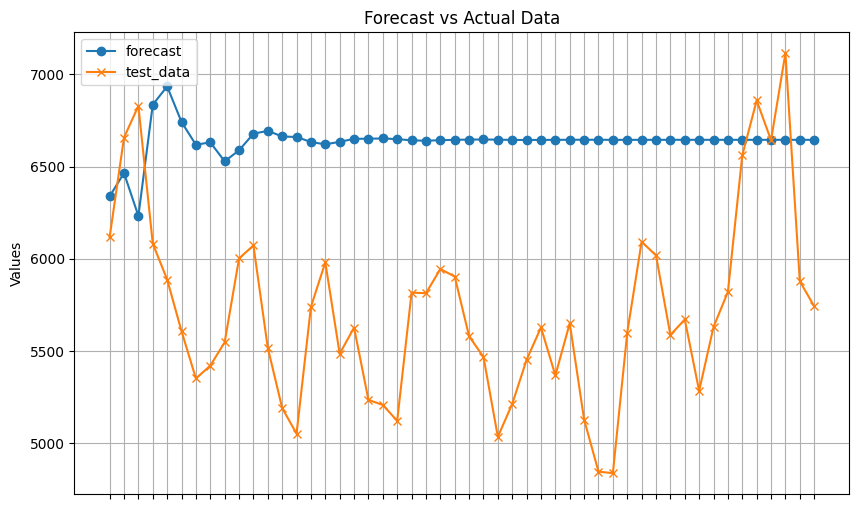

MAPE: 17.83%
p: 6  q: 1


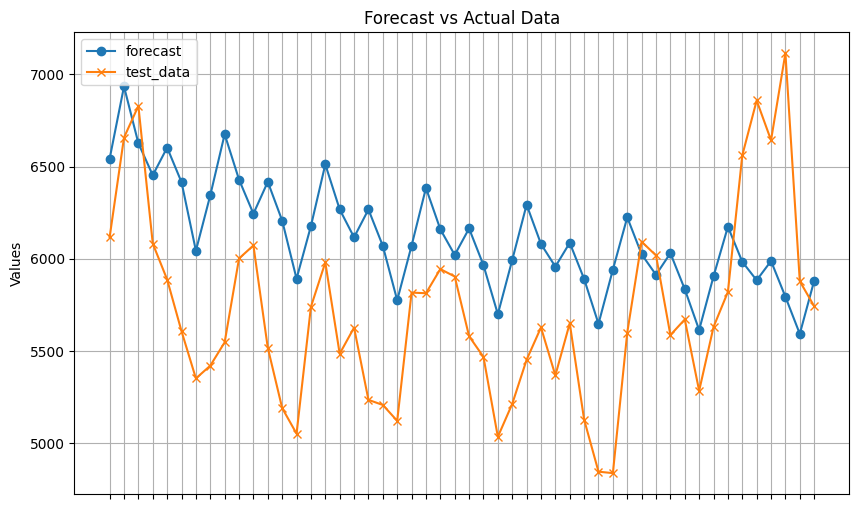

MAPE: 10.26%
p: 6  q: 6


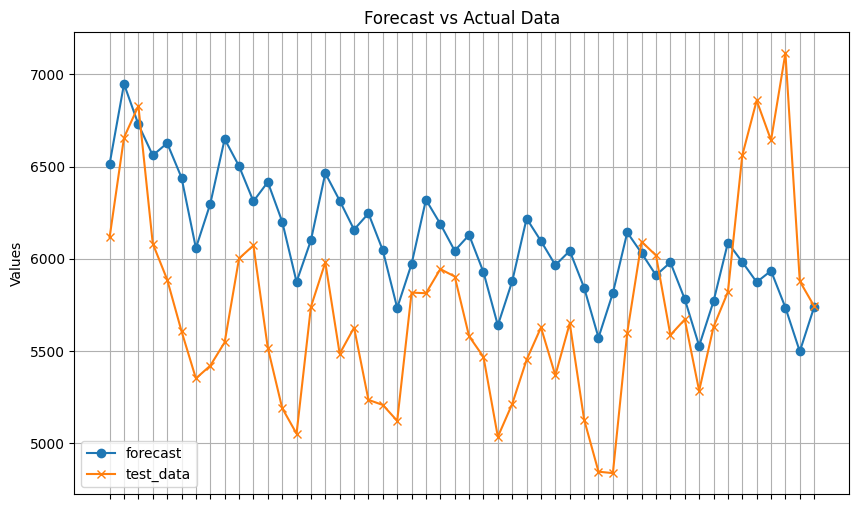

MAPE: 9.83%
p: 6  q: 8


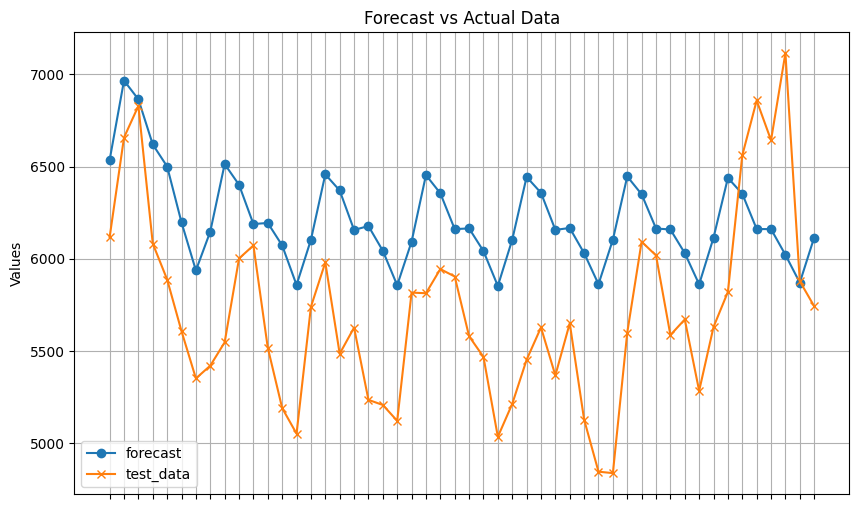

MAPE: 10.76%
p: 6  q: 13


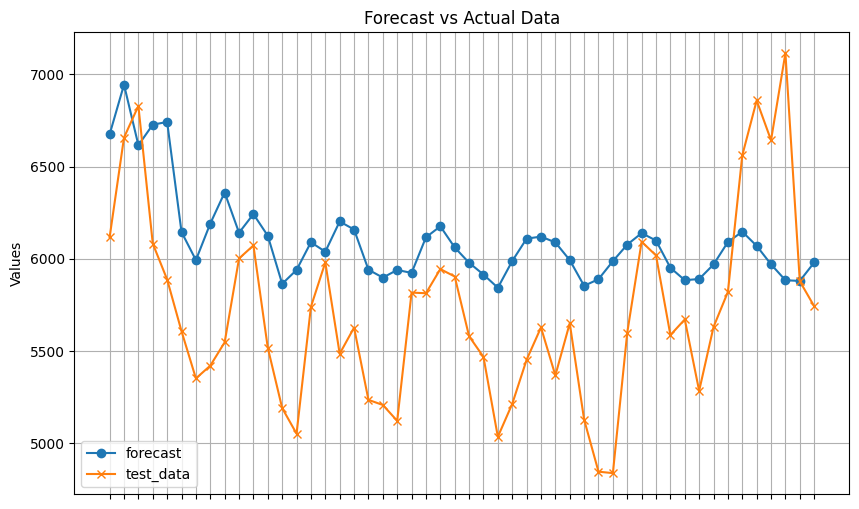

MAPE: 9.27%
p: 6  q: 15


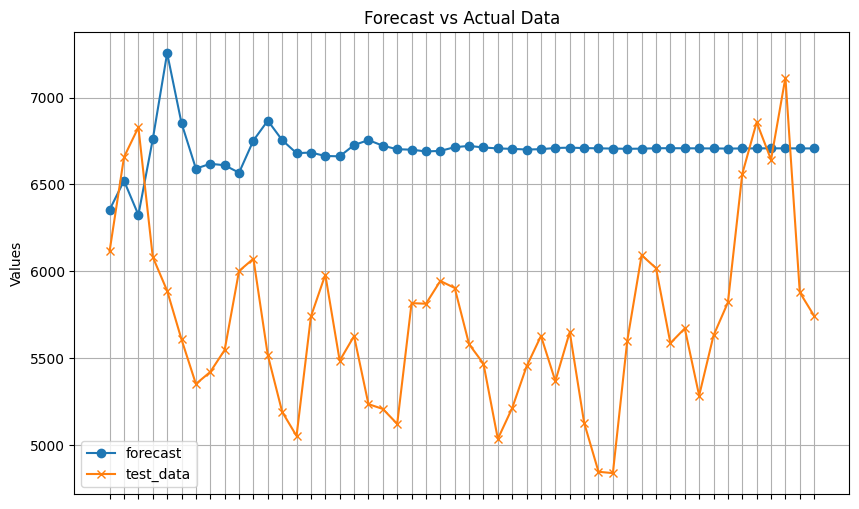

MAPE: 18.78%
p: 7  q: 1


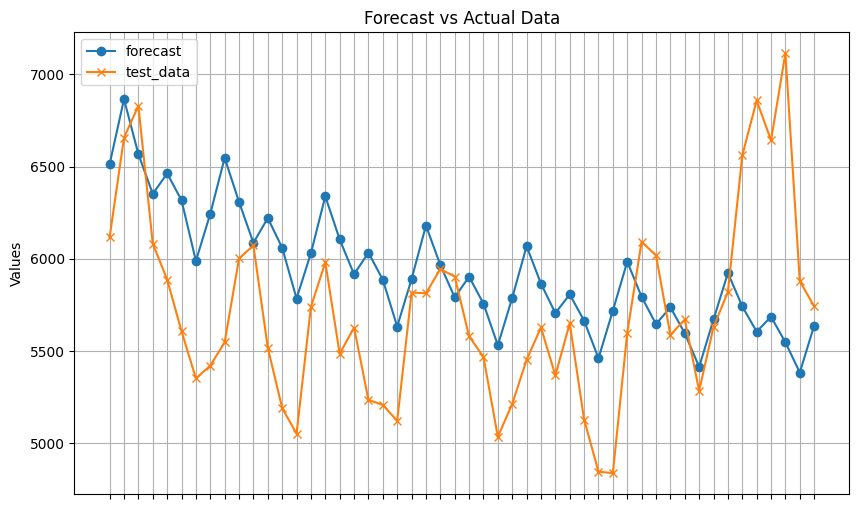

MAPE: 8.26%
p: 7  q: 6


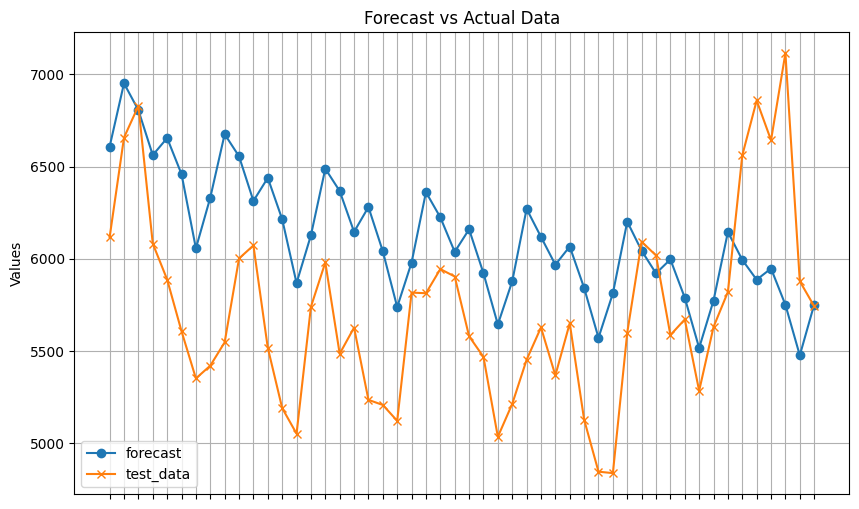

MAPE: 10.05%
p: 7  q: 8


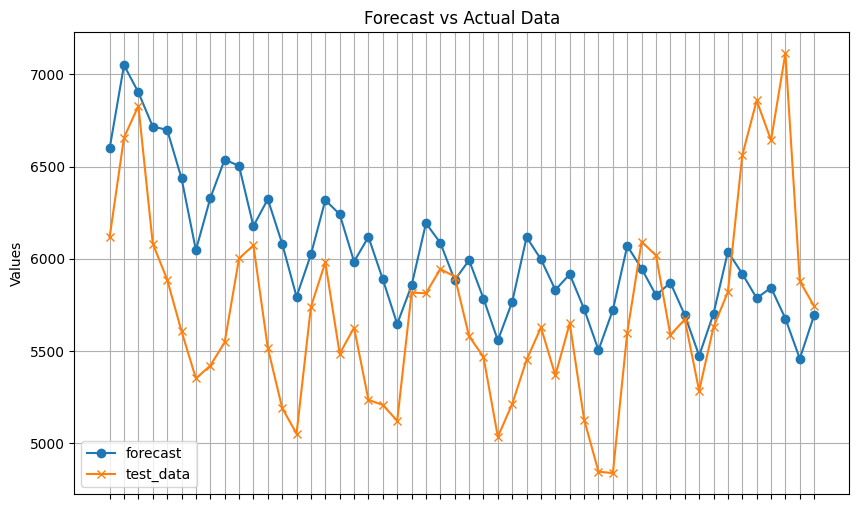

MAPE: 8.86%
p: 7  q: 13


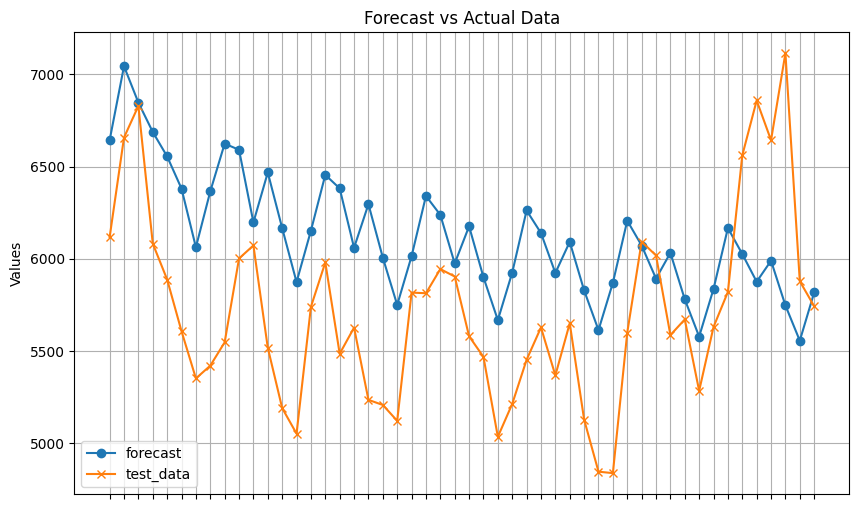

MAPE: 10.09%
p: 7  q: 15


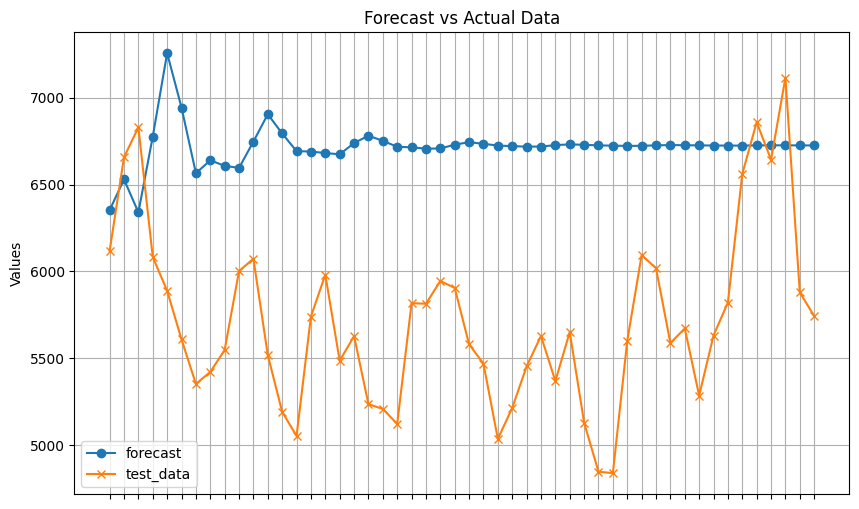

MAPE: 19.04%
p: 8  q: 1


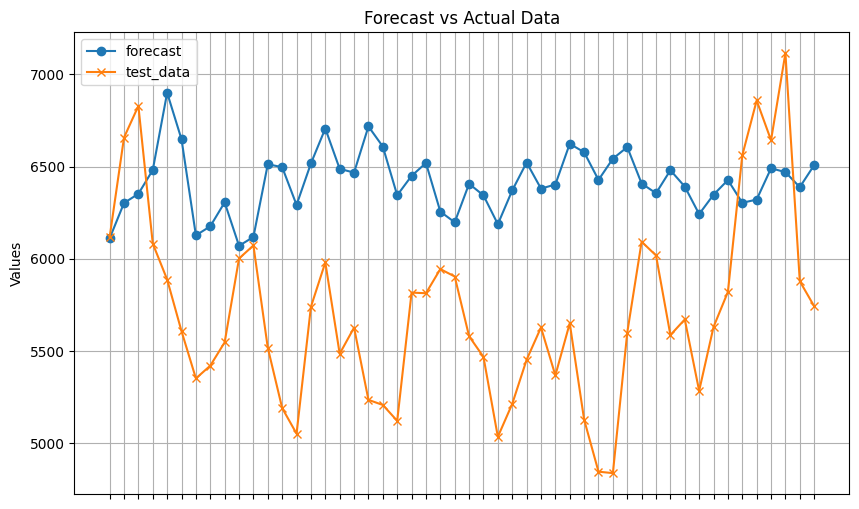

MAPE: 14.48%
p: 8  q: 6


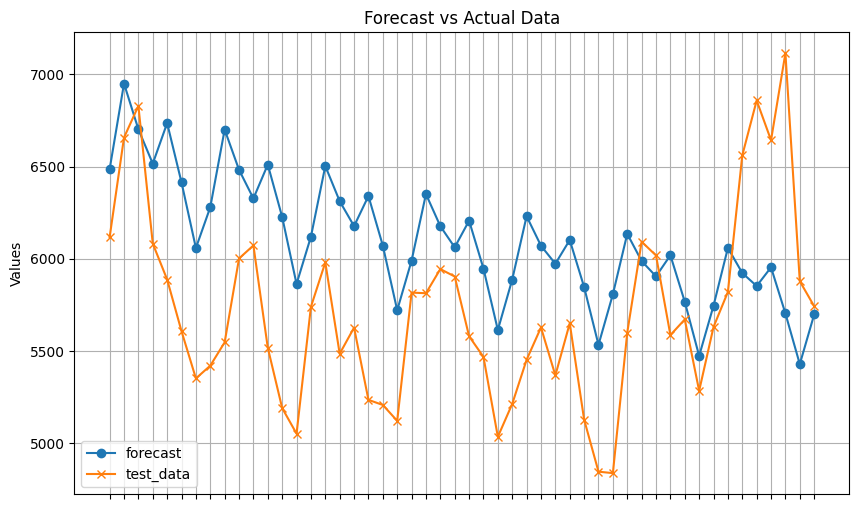

MAPE: 10.05%
p: 8  q: 8


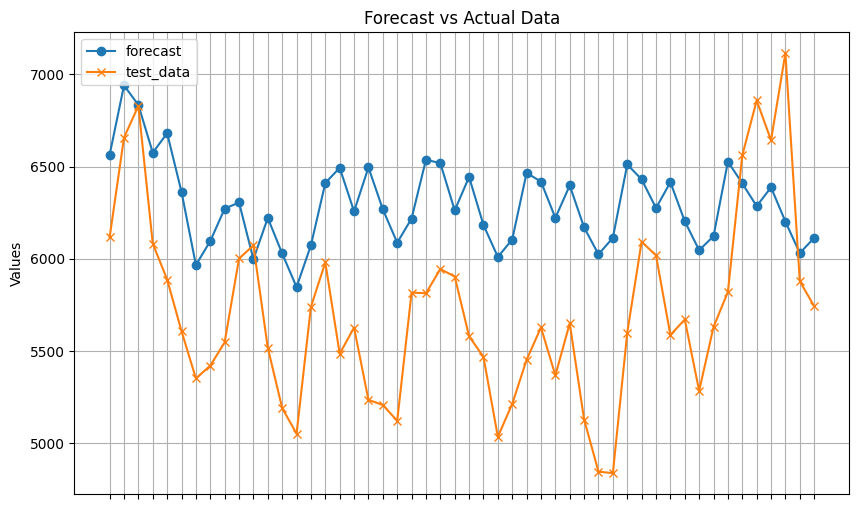

MAPE: 11.92%
p: 8  q: 13


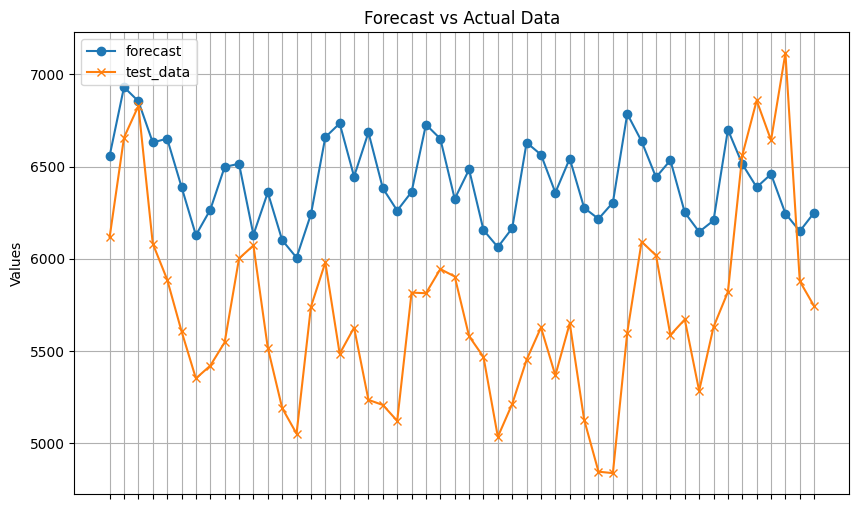

MAPE: 13.88%
p: 8  q: 15


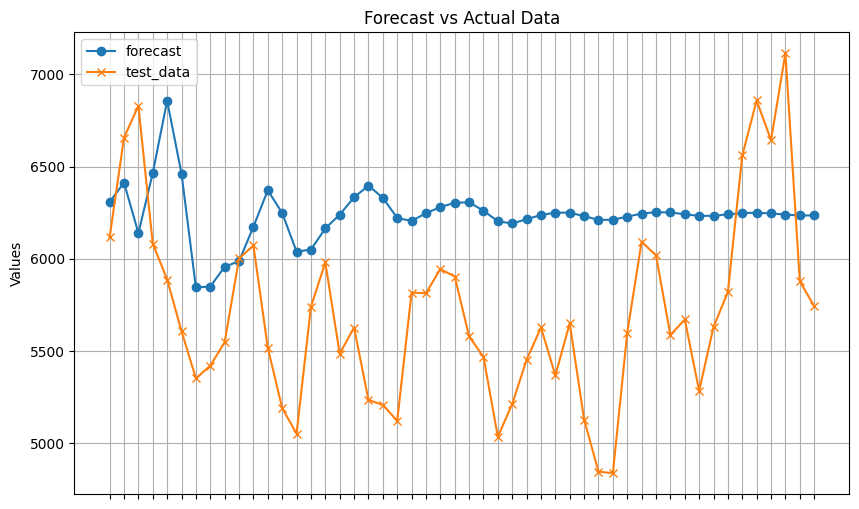

MAPE: 11.70%
p: 9  q: 1


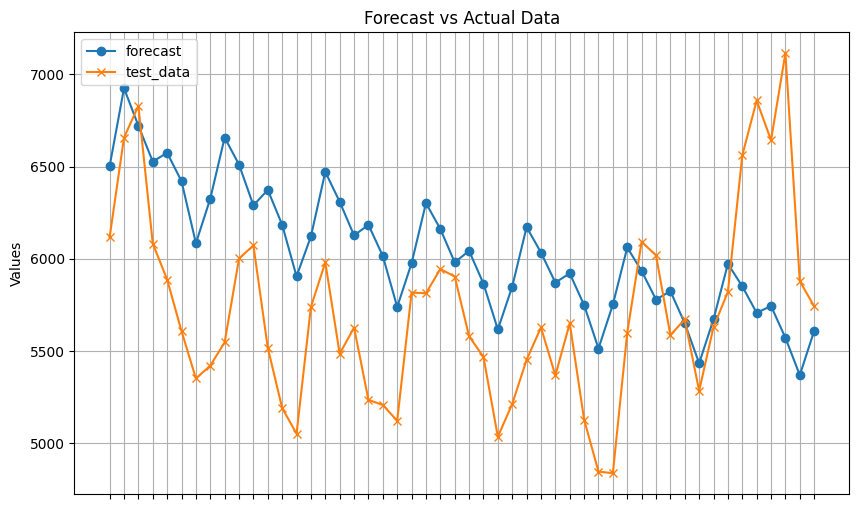

MAPE: 9.57%
p: 9  q: 6


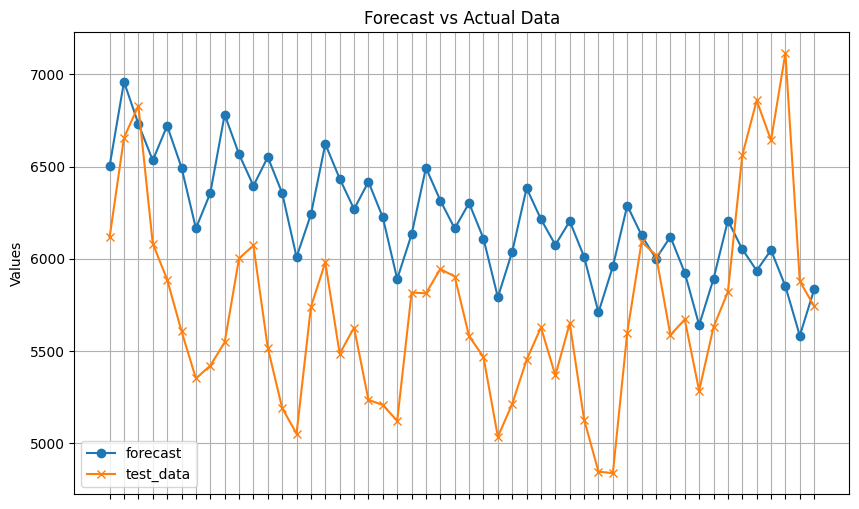

MAPE: 11.54%
p: 9  q: 8


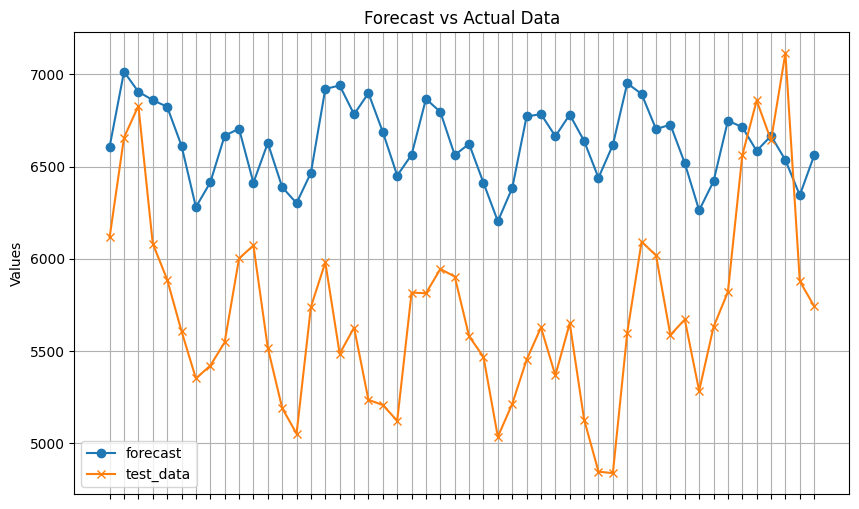

MAPE: 17.21%
p: 9  q: 13


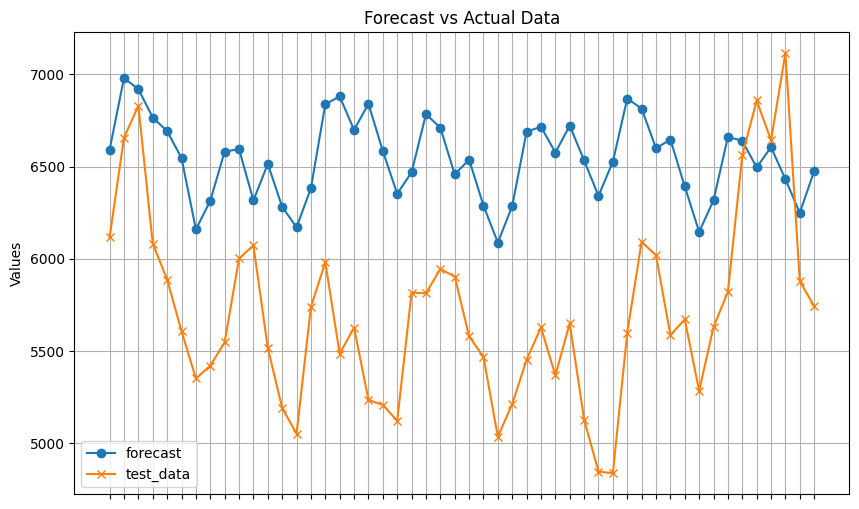

MAPE: 15.76%
p: 9  q: 15


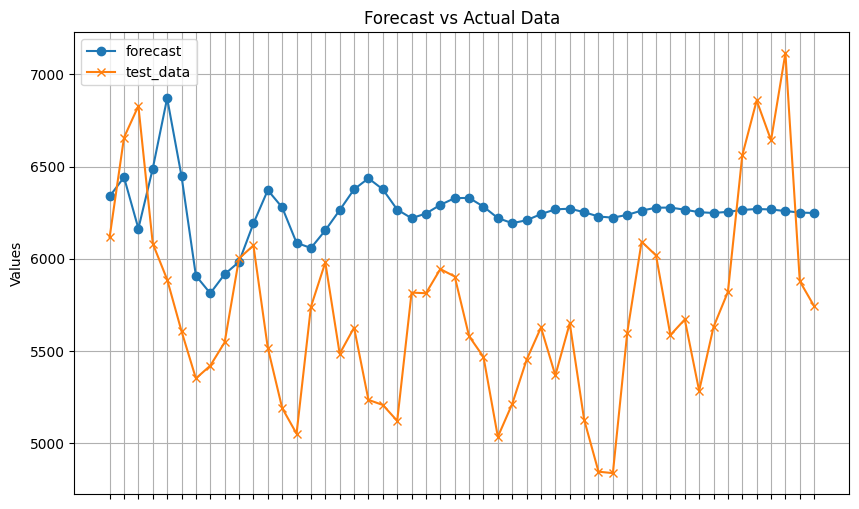

MAPE: 11.93%
p: 10  q: 1


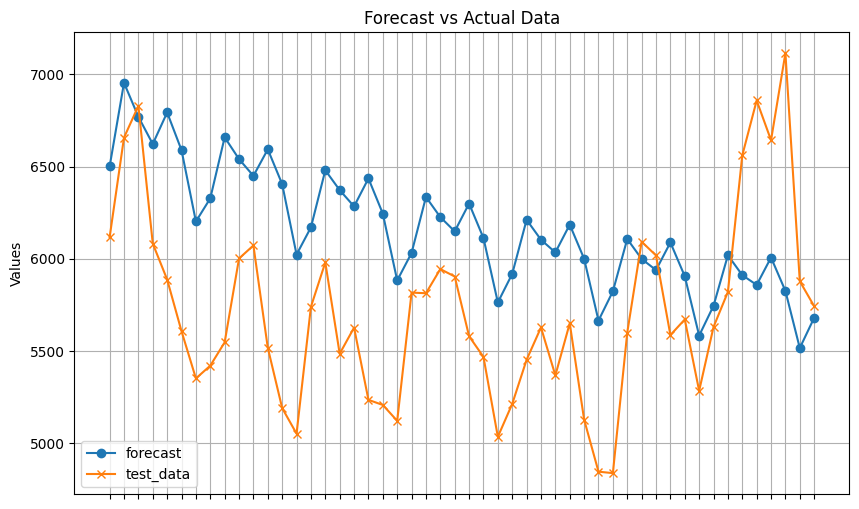

MAPE: 11.07%
p: 10  q: 6


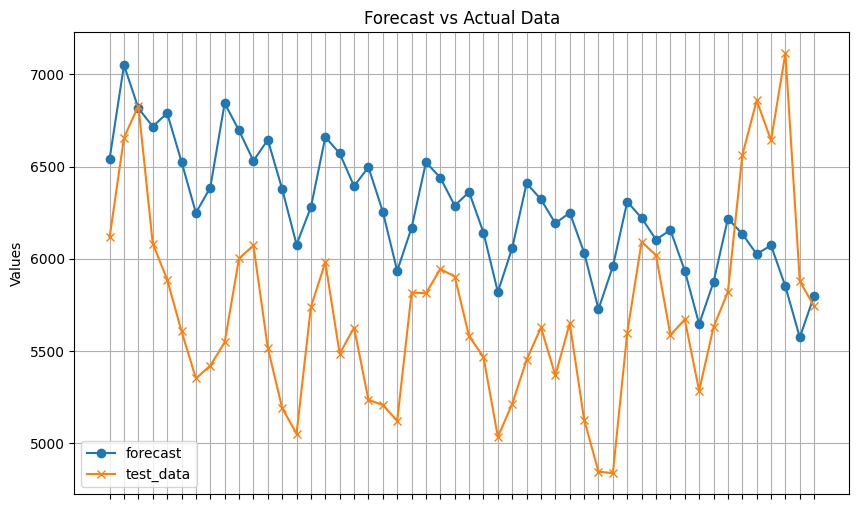

MAPE: 12.34%
p: 10  q: 8


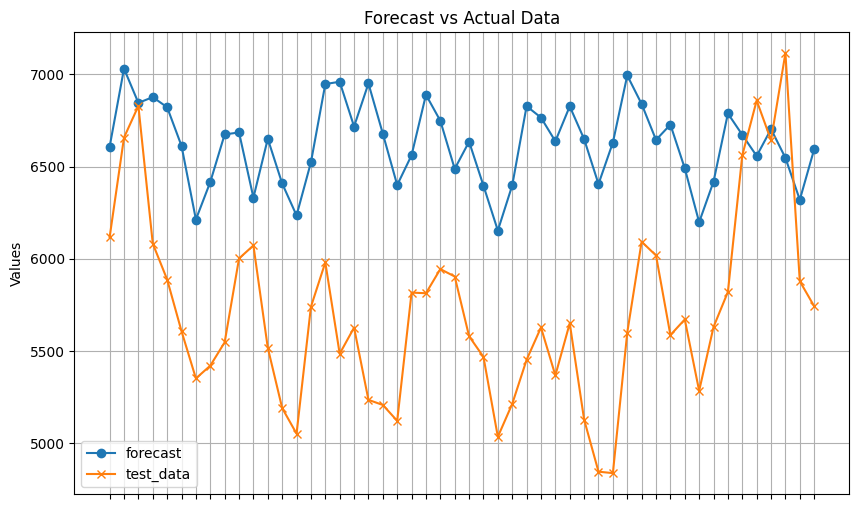

MAPE: 17.07%
p: 10  q: 13


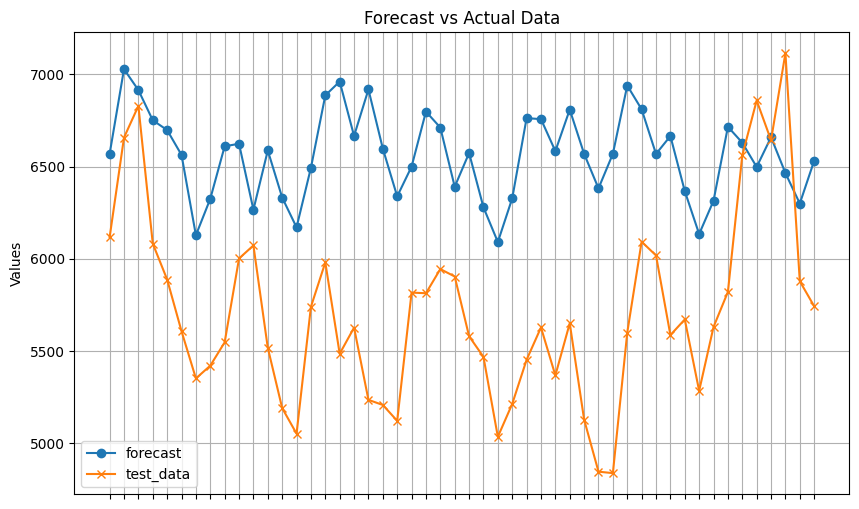

MAPE: 16.09%
p: 10  q: 15


In [139]:
for p in np.arange(1,11):
    for q in [1,6,8,13,15]:
        model = ARIMA(eng[:-50], order = (p,1,q))
        model_fit = model.fit()
        result = pd.DataFrame({'forecast':model_fit.forecast(steps = 50).values, 'test_data': eng[-50:]['en'].values}, index = eng[-50:]['en'].index)
        plt.figure(figsize=(10, 6))
        plt.plot(result.index, result['forecast'], label='forecast', marker='o')
        plt.plot(result.index, result['test_data'], label='test_data', marker='x')
        plt.title('Forecast vs Actual Data')
        for label in plt.gca().get_xticklabels():
            label.set_visible(False)
        plt.ylabel('Values')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        mape = 100*mean_absolute_percentage_error(result['test_data'], result['forecast'])
        print(f"MAPE: {mape:.2f}%")
        print("p:",p, " q:",q)

## Best parameters we got is p: 7, q: 6 with a mape of 8.26% and p: 1, q: 1 with a mape of 8.1%

In [140]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [141]:
eng['Exog'] = exog['Exog']

In [142]:
def sarimax_(p, q, P, D, Q, S, endog, exog):
    model = SARIMAX(endog = endog[:-50], exog = exog[:-50], order=(p, 1, q), seasonal_order=(P, D, Q, S))
    model_fit = model.fit(disp = False)
    result = pd.DataFrame({'forecast':model_fit.get_forecast(steps = 50, exog = exog[-50:]).predicted_mean, 'test_data': endog[-50:].values}, index = endog[-50:].index)
    mape = 100*mean_absolute_percentage_error(result['test_data'], result['forecast'])
    return (result, mape)
    

In [143]:
def forecast_plot(result, mape, p, q, P, D, Q, S):
    plt.figure(figsize=(10, 6))
    plt.plot(result.index, result['forecast'], label='forecast', marker='o')
    plt.plot(result.index, result['test_data'], label='test_data', marker='x')
    plt.title('Forecast vs Actual Data')
    for label in plt.gca().get_xticklabels():
        label.set_visible(False)
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f"MAPE: {mape:.2f}%")
    print("p:",p, " q:",q, " P:",P, " D:",D, " Q",Q, " S",S )

In [144]:
optimal_param = []
MAPE = []
for p in [1, 4]:
    for q in np.arange(1,4):
        for P in np.arange(1,3):
            for Q in np.arange(1,3):
                for S in [6, 8, 13, 15]:
                    for D in [0,1]:
                        result, mape = sarimax_(p, q, P, D, Q, S, eng['en'], eng['Exog'])
                        MAPE.append(mape)
                        optimal_param.append((p,q,P,D,Q,S))
optimum = optimal_param[np.argmin(MAPE)] 
p0, q0, P0, D0, Q0, S0 = optimum

result, mape = sarimax_(p0, q0, P0, D0, Q0, S0, eng['en'], eng['Exog'])
forecast_plot(result, mape, p0, q0, P0, D0, Q0, S0)

MissingDataError: exog contains inf or nans

In [145]:
df4 = df3.drop(columns = ['en', 'zh'])
df4

lang                 de           es          fr           ja       other  \
2015-07-01   799.647328  1172.206002  521.973465   633.729585  129.850520   
2015-07-02   788.763991  1120.260721  525.326916   727.754240  136.160375   
2015-07-03   757.008443  1030.279301  505.128695   657.242768  128.716826   
2015-07-04   694.663028   967.346374  539.936234   825.702545  109.856529   
2015-07-05   807.571352  1051.982346  530.107138   792.187396  121.784986   
...                 ...          ...         ...          ...         ...   
2016-12-27  1137.956061  1089.732597  852.198550   810.105040  184.772165   
2016-12-28  1081.189712  1128.884642  780.368744   811.275919  214.349310   
2016-12-29  1049.976794  1081.147901  764.657081   888.685015  178.955392   
2016-12-30  1001.049729   822.373628  721.165597   982.269292  183.873276   
2016-12-31   957.042938   793.234707  667.223882  1218.647606  159.885244   

lang                 ru  
2015-07-01   690.629757  
2015-07-02   702.591922  
2015-07-03   651.152326  
2015-07-04   612.445536  
2015-07-05   652.219098  
...                 ...  
2016-12-27  1019.769264  
2016-12-28   962.418012  
2016-12-29   926.553429  
2016-12-30   828.873274  
2016-12-31   922.818567  

[550 rows x 6 columns]

<Axes: >

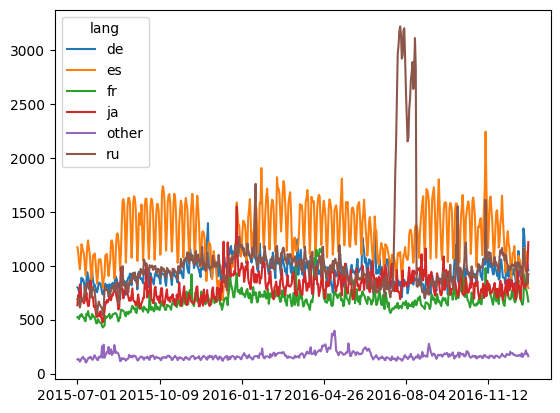

In [146]:
df4.plot()

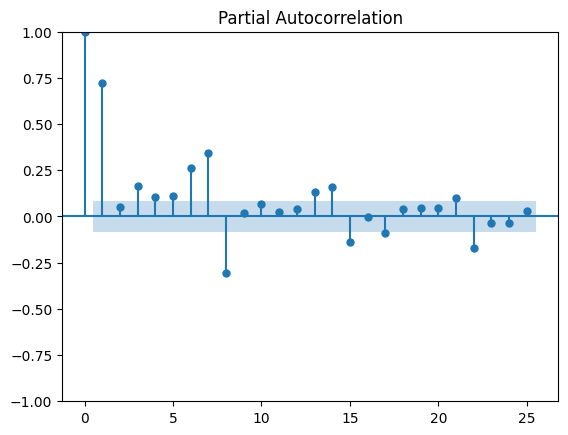

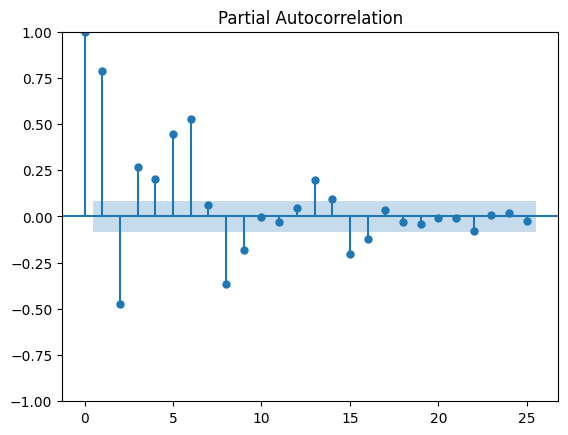

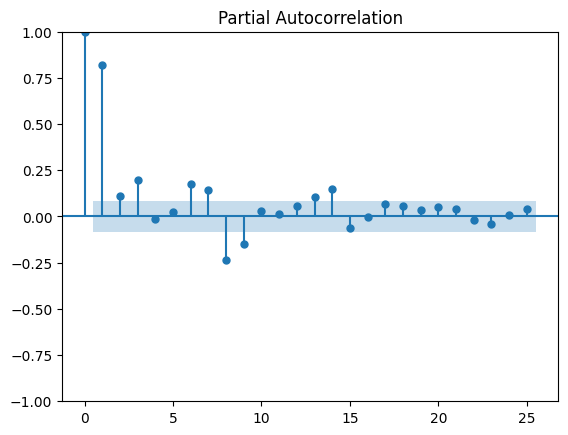

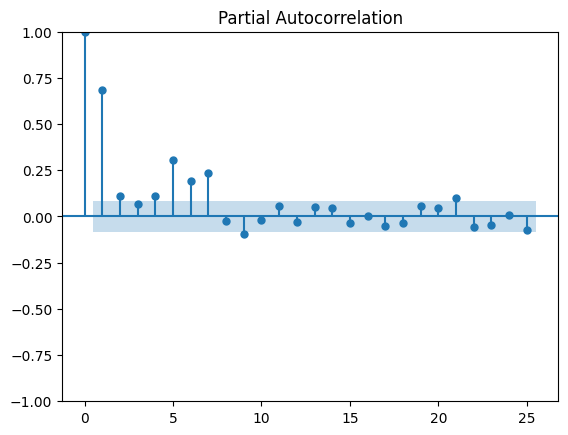

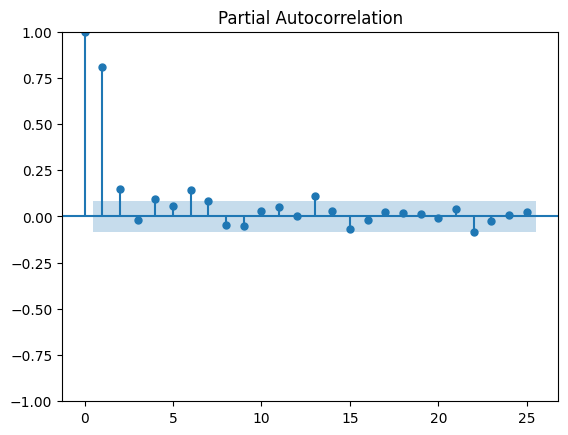

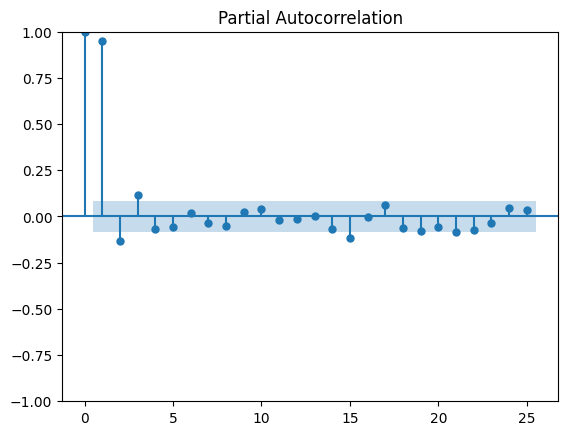

In [147]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for lang in df4.columns:
    plot_pacf(df4[lang], lags = 25)

In [148]:
df4.columns

Index(['de', 'es', 'fr', 'ja', 'other', 'ru'], dtype='object', name='lang')

In [149]:
def sarima_(p, q, P, D, Q, S, endog):
    model = SARIMAX(endog = endog[:-50], order=(p, 1, q), seasonal_order=(P, D, Q, S))
    model_fit = model.fit(disp = False)
    result = pd.DataFrame({'forecast':model_fit.get_forecast(steps = 50).predicted_mean, 'test_data': endog[-50:].values}, index = endog[-50:].index)
    mape = 100*mean_absolute_percentage_error(result['test_data'], result['forecast'])
    return (result, mape)
    

language:  de


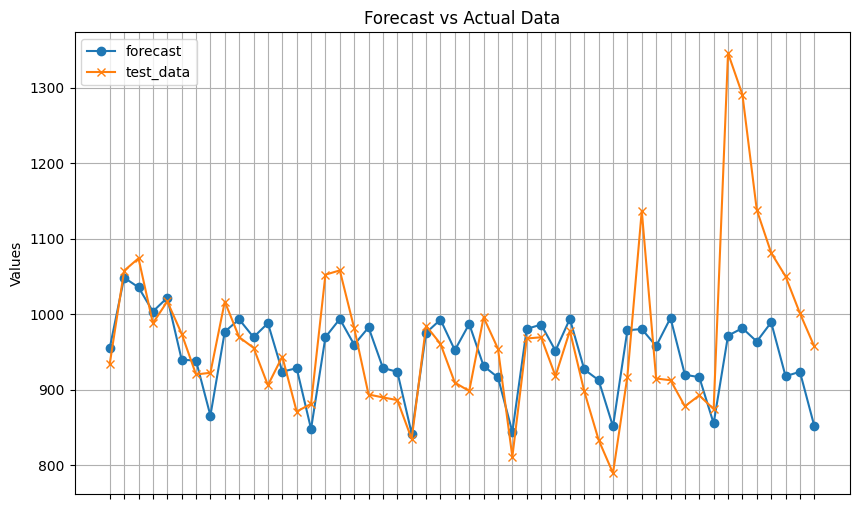

MAPE: 5.97%
p: 3  q: 3  P: 1  D: 0  Q 1  S 7
language:  es


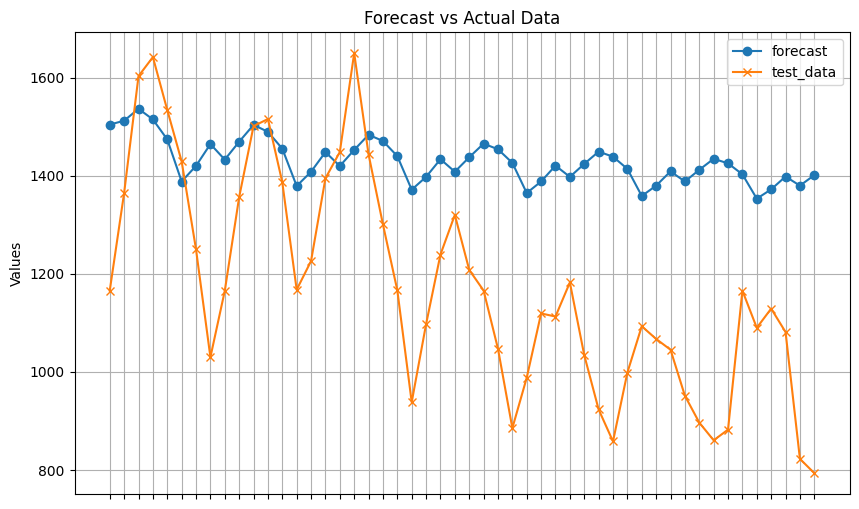

MAPE: 27.11%
p: 1  q: 2  P: 1  D: 0  Q 1  S 8
language:  fr


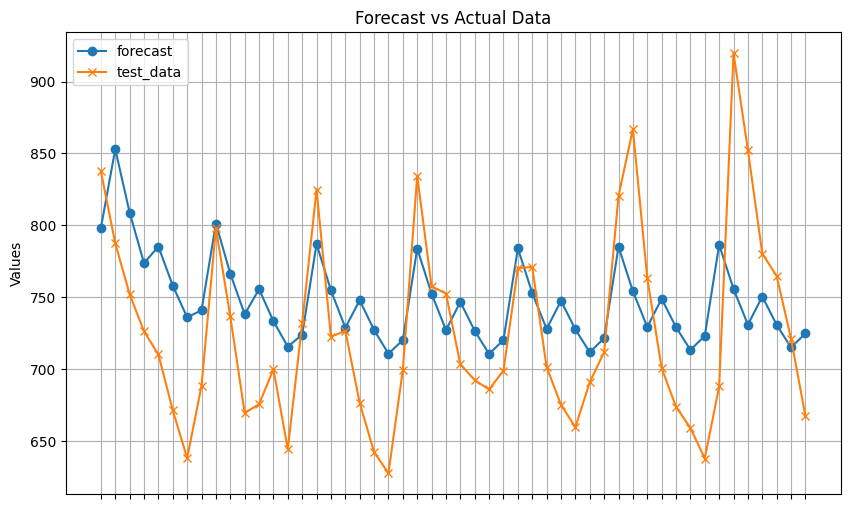

MAPE: 7.01%
p: 2  q: 1  P: 1  D: 0  Q 1  S 7
language:  ja


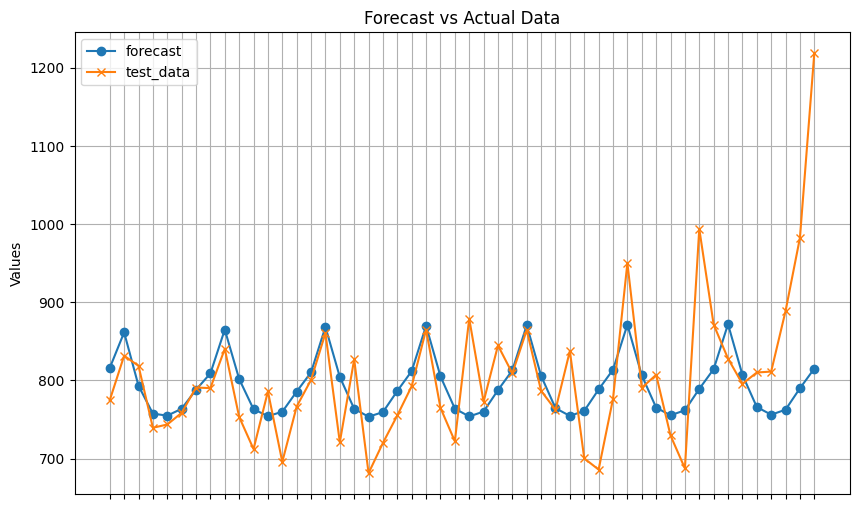

MAPE: 6.30%
p: 2  q: 3  P: 1  D: 0  Q 1  S 7
language:  other


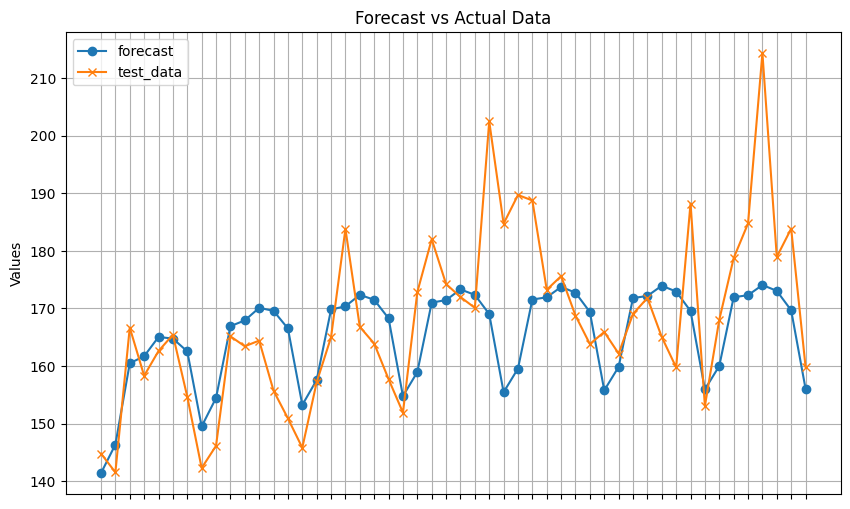

MAPE: 5.06%
p: 3  q: 3  P: 1  D: 0  Q 1  S 7
language:  ru


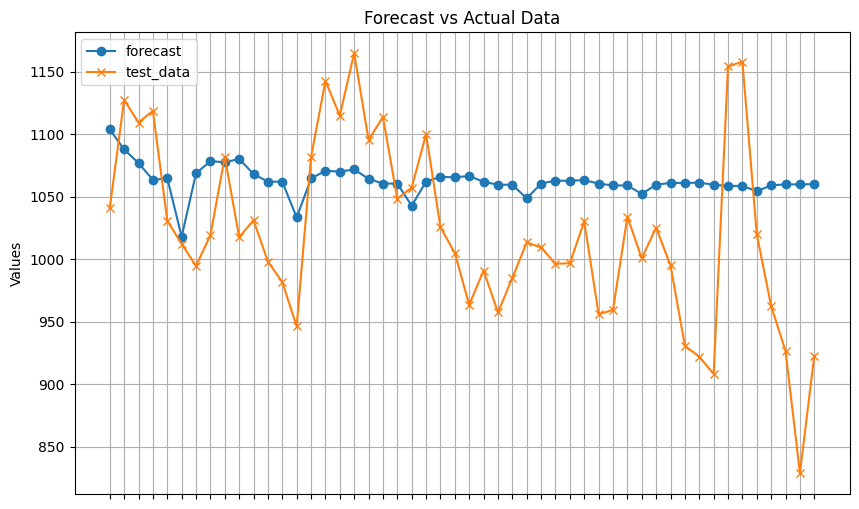

MAPE: 6.90%
p: 1  q: 1  P: 1  D: 0  Q 1  S 8


In [150]:
for lang in df4.columns:
    print("language: ", lang)
    optimal_param = []
    MAPE = []
    for p in np.arange(1,4):
        for q in np.arange(1,4):
            for P in np.arange(1,2):
                for Q in np.arange(1,2):
                    for S in [7,8,14]:
                        for D in [0,1]:
                            result, mape = sarima_(p, q, P, D, Q, S, df4[lang])
                            MAPE.append(mape)
                            optimal_param.append((p,q,P,D,Q,S))
    optimum = optimal_param[np.argmin(MAPE)] 
    p0, q0, P0, D0, Q0, S0 = optimum
    
    result, mape = sarima_(p0, q0, P0, D0, Q0, S0, df4[lang])
    forecast_plot(result, mape, p0, q0, P0, D0, Q0, S0)

In [151]:
pip install pystan==2.19.1.1

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [2 lines of output]
      <string>:61: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
      Cython>=0.22 and NumPy are required.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Note: you may need to restart the kernel to use updated packages.


In [152]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [153]:
eng.index

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [154]:
from prophet import Prophet

In [163]:
exog.index = eng.index
eng['Exog'] = exog['Exog']
eng

lang                 en  Exog
2015-07-01  4200.900811     0
2015-07-02  4188.774868     0
2015-07-03  3975.953755     0
2015-07-04  4147.187733     0
2015-07-05  4284.875694     0
...                 ...   ...
2016-12-27  6858.752143     1
2016-12-28  6643.130524     1
2016-12-29  7115.696049     1
2016-12-30  5878.098277     0
2016-12-31  5742.486097     0

[550 rows x 2 columns]

In [168]:
pr = pd.DataFrame({'ds': eng.index, 'y': eng['en'], 'exo': eng['Exog']})
pr

ds            y  exo
2015-07-01  2015-07-01  4200.900811    0
2015-07-02  2015-07-02  4188.774868    0
2015-07-03  2015-07-03  3975.953755    0
2015-07-04  2015-07-04  4147.187733    0
2015-07-05  2015-07-05  4284.875694    0
...                ...          ...  ...
2016-12-27  2016-12-27  6858.752143    1
2016-12-28  2016-12-28  6643.130524    1
2016-12-29  2016-12-29  7115.696049    1
2016-12-30  2016-12-30  5878.098277    0
2016-12-31  2016-12-31  5742.486097    0

[550 rows x 3 columns]

In [181]:
model = Prophet()
model.add_regressor('exo')
model.fit(pr[:-50])

21:00:32 - cmdstanpy - INFO - Chain [1] start processing
21:00:32 - cmdstanpy - INFO - Chain [1] done processing


In [171]:
exog = pd.read_csv('Exog_Campaign_eng')
exog

Exog
0       0
1       0
2       0
3       0
4       0
..    ...
545     1
546     1
547     1
548     0
549     0

[550 rows x 1 columns]

In [182]:
future = model.make_future_dataframe(periods = 50)
future['exo'] = exog['Exog']
future

ds  exo
0   2015-07-01    0
1   2015-07-02    0
2   2015-07-03    0
3   2015-07-04    0
4   2015-07-05    0
..         ...  ...
545 2016-12-27    1
546 2016-12-28    1
547 2016-12-29    1
548 2016-12-30    0
549 2016-12-31    0

[550 rows x 2 columns]

In [183]:
forecast = model.predict(future)
forecast

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2015-07-01  4057.749958  3391.638765  4795.400891  4057.749958   
1   2015-07-02  4061.783759  3219.381127  4612.199077  4061.783759   
2   2015-07-03  4065.817561  3181.263451  4529.851793  4065.817561   
3   2015-07-04  4069.851363  3233.094440  4570.140232  4069.851363   
4   2015-07-05  4073.885164  3568.297937  4951.982323  4073.885164   
..         ...          ...          ...          ...          ...   
545 2016-12-27  5638.215917  7716.941961  8994.104876  5620.636527   
546 2016-12-28  5641.425507  7571.647192  8892.918783  5623.252296   
547 2016-12-29  5644.635096  7448.233181  8809.605741  5625.862312   
548 2016-12-30  5647.844686  4704.631503  6085.841580  5628.589703   
549 2016-12-31  5651.054276  4845.167275  6176.218334  5631.111570   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    4057.749958      -29.537691            -29.537691            -29.537691   
1    4061.783759     -122.678441           -122.678441           -122.678441   
2    4065.817561     -233.129944           -233.129944           -233.129944   
3    4069.851363     -146.039815           -146.039815           -146.039815   
4    4073.885164      183.933255            183.933255            183.933255   
..           ...             ...                   ...                   ...   
545  5654.232735     2676.135299           2676.135299           2676.135299   
546  5657.961312     2580.286791           2580.286791           2580.286791   
547  5661.689890     2487.146040           2487.146040           2487.146040   
548  5665.604851     -233.129944           -233.129944           -233.129944   
549  5669.390479     -146.039815           -146.039815           -146.039815   

             exo  ...  extra_regressors_additive  \
0       0.000000  ...                   0.000000   
1       0.000000  ...                   0.000000   
2       0.000000  ...                   0.000000   
3       0.000000  ...                   0.000000   
4       0.000000  ...                   0.000000   
..           ...  ...                        ...   
545  2609.824482  ...                2609.824482   
546  2609.824482  ...                2609.824482   
547  2609.824482  ...                2609.824482   
548     0.000000  ...                   0.000000   
549     0.000000  ...                   0.000000   

     extra_regressors_additive_lower  extra_regressors_additive_upper  \
0                           0.000000                         0.000000   
1                           0.000000                         0.000000   
2                           0.000000                         0.000000   
3                           0.000000                         0.000000   
4                           0.000000                         0.000000   
..                               ...                              ...   
545                      2609.824482                      2609.824482   
546                      2609.824482                      2609.824482   
547                      2609.824482                      2609.824482   
548                         0.000000                         0.000000   
549                         0.000000                         0.000000   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0    -29.537691    -29.537691    -29.537691                   0.0   
1   -122.678441   -122.678441   -122.678441                   0.0   
2   -233.129944   -233.129944   -233.129944                   0.0   
3   -146.039815   -146.039815   -146.039815                   0.0   
4    183.933255    183.933255    183.933255                   0.0   
..          ...           ...           ...                   ...   
545   66.310817     66.310817     66.310817                   0.0   
546  -29.537691    -29.537691    -29.537691                   0.0   
547 -122.678441   -122.678441   -122.678441                   0.0   
548 -233.129944   

In [184]:
forecast['yhat']

0      4028.212267
1      3939.105318
2      3832.687617
3      3923.811547
4      4257.818420
          ...     
545    8314.351216
546    8221.712297
547    8131.781137
548    5414.714743
549    5505.014461
Name: yhat, Length: 550, dtype: float64

In [185]:
mape = 100*mean_absolute_percentage_error(pr['y'][-50:], model.predict(future)['yhat'][-50:])
mape

6.201175822246687

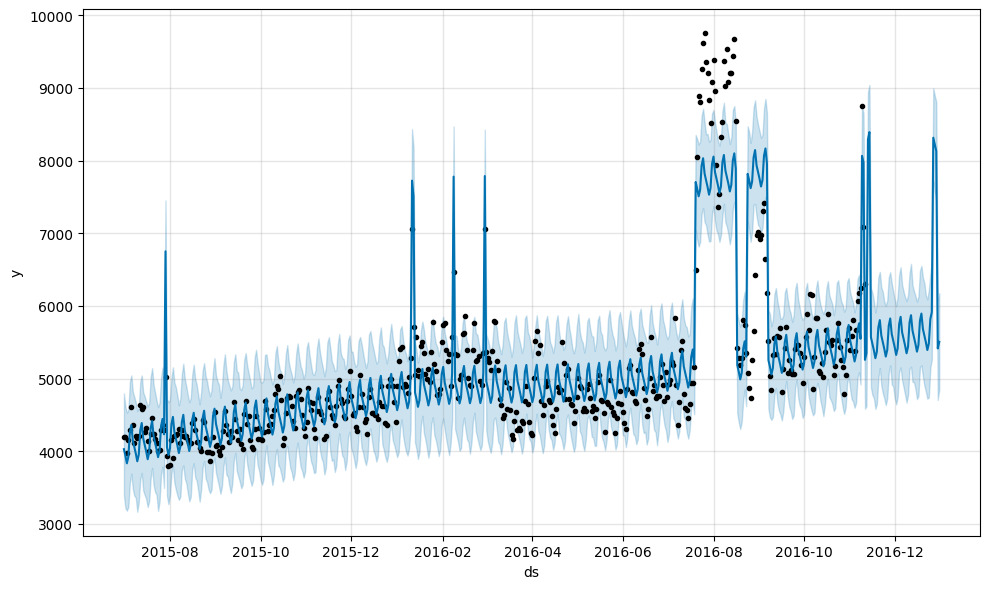

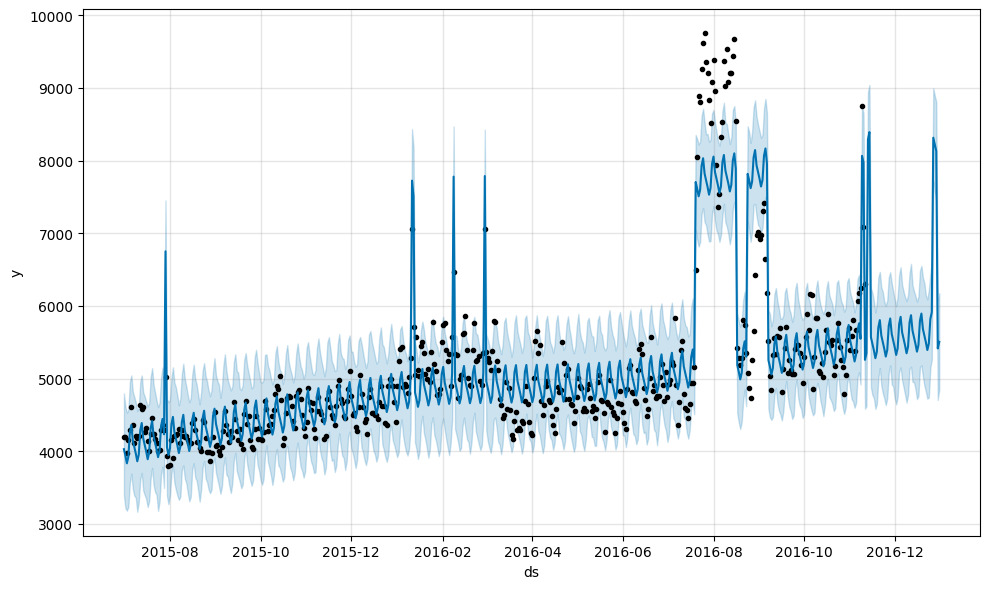

In [186]:
model.plot(forecast)

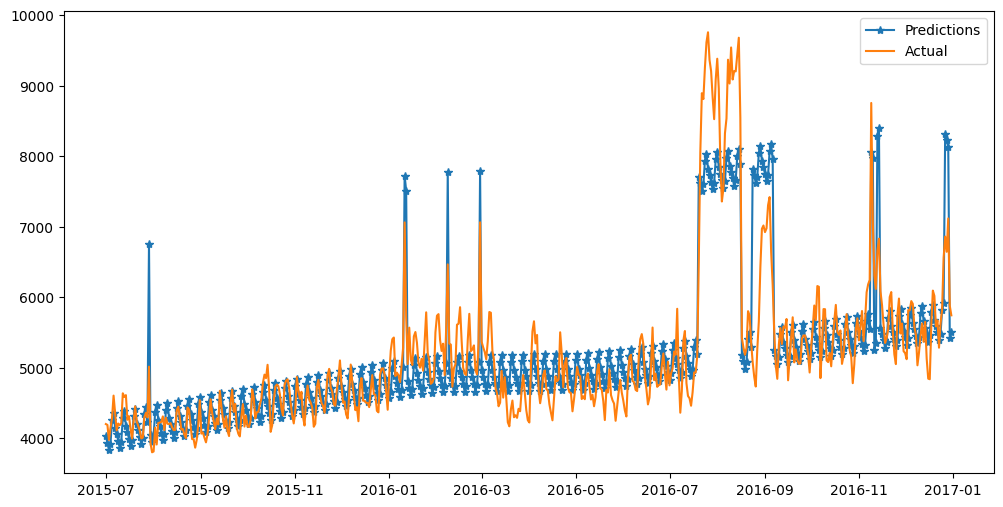

In [198]:
plt.figure(figsize = (12,6))
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(pd.to_datetime(pr['ds']), pr['y'], label = 'Actual')

plt.legend()

# Qustionnaire

## 2. Three Inferences from data vissualizations:
### 1. Most of the views to the webpages come from English language sites. Each language follows a different pattern in the timeseries charts
### 2. All agents had most views (>95%) compared to spider.
### 3. All access has most views compared to desktop or mobile web pages.

## 3. Decomposition of the series will give us Trend, seasonality and noise. We can use statsmodels library to directly separate the time series.

## 4. Just differencing at level 1 gave us a stationary time series. The reason being that the data is linearly increasing, if it was increasing exponentially or quadratically then we would need to increase the level of differencing. We have proved the stationarity of the data using the dickery-fuller test.

## 5. We have implemented all three models - ARIMA, SARIMA and SARIMAX. We saw that ARIMA gave us good mape value due to a simplistic model. Whereas SARIMAX gave us the best result with english data as it contained exogenous data. The difference between the three is that ARIMA doesn't consider the seasonality factor of the time series. SARIMA considers seasonality and SARIMAX contains both seasonality as well as exogenous variables like holiday.

In [201]:
df3.mean(axis = 0)

lang
de        944.606066
en       5145.041788
es       1295.522886
fr        678.671975
ja        802.097377
other     165.845057
ru       1036.113919
zh          0.098182
dtype: float64

## 6. The average number of views is highest in english language, second highest in espaniol and lowest in zh.

In [ ]:
fgjg kg khbkhj 